In [2]:
# What version of Python do you have?
import sys

import keras
import pandas as pd
import sklearn as sk
import tensorflow as tf
import platform

print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Python Platform: macOS-13.4-arm64-arm-64bit
Tensor Flow Version: 2.13.0-rc1
Keras Version: 2.13.1rc0

Python 3.10.11 | packaged by conda-forge | (main, May 10 2023, 19:01:19) [Clang 14.0.6 ]
Pandas 2.0.2
Scikit-Learn 1.2.2
GPU is available


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Step 1: Exploratory Data Analysis

#### Loading the training data and setting up `roi` feature

In [4]:
train_df = pd.read_csv('train.csv', parse_dates=True)
train_df['time'] = pd.to_datetime(train_df['timestamp'], format="mixed", dayfirst=True)
train_df.head()

timestamp                              asset_id    roi  \
0         2023-03-25T13:26:05  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
1  2023-03-25T13:26:05.020000  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
2  2023-03-25T13:26:05.040000  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
3  2023-03-25T13:26:05.060000  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
4  2023-03-25T13:26:05.080000  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   

   indicator_1a  indicator_1b  indicator_1c  indicator_1d  indicator_1e  \
0          -190          -255           -13          2593         -7271   
1          -119          -308           -15          2571         -7105   
2          -167          -299           -33          2635         -7155   
3          -202          -290           -50          2718         -7233   
4           -86          -252           -44          2823         -7242   

   indicator_1f  return_on_asset  company_age  company_size  revenue  \
0         -2873               31           18            65      172   
1         -2625               31           18            65      172   
2         -2627               31           18            65      172   
3         -2801               31           18            65      172   
4         -2823               31           18            65      172   

   indicator_2a  indicator_2b  indicator_2c  indicator_2d  indicator_2e  \
0           NaN           NaN           NaN           NaN           NaN   
1           NaN           NaN           NaN           NaN           NaN   
2           NaN           NaN           NaN           NaN           NaN   
3           NaN           NaN           NaN           NaN           NaN   
4           NaN           NaN           NaN           NaN           NaN   

   indicator_2f                    time  
0           NaN 2023-03-25 13:26:05.000  
1           NaN 2023-03-25 13:26:05.020  
2           NaN 2023-03-25 13:26:05.040  
3           NaN 2023-03-25 13:26:05.060  
4           NaN 2023-03-25 13:26:05.080

In [5]:
train_df['roi_label'] = np.where(train_df['roi']==0,0,1)
train_df.head()

timestamp                              asset_id    roi  \
0         2023-03-25T13:26:05  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
1  2023-03-25T13:26:05.020000  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
2  2023-03-25T13:26:05.040000  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
3  2023-03-25T13:26:05.060000  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
4  2023-03-25T13:26:05.080000  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   

   indicator_1a  indicator_1b  indicator_1c  indicator_1d  indicator_1e  \
0          -190          -255           -13          2593         -7271   
1          -119          -308           -15          2571         -7105   
2          -167          -299           -33          2635         -7155   
3          -202          -290           -50          2718         -7233   
4           -86          -252           -44          2823         -7242   

   indicator_1f  return_on_asset  ...  company_size  revenue  indicator_2a  \
0         -2873               31  ...            65      172           NaN   
1         -2625               31  ...            65      172           NaN   
2         -2627               31  ...            65      172           NaN   
3         -2801               31  ...            65      172           NaN   
4         -2823               31  ...            65      172           NaN   

   indicator_2b  indicator_2c  indicator_2d  indicator_2e  indicator_2f  \
0           NaN           NaN           NaN           NaN           NaN   
1           NaN           NaN           NaN           NaN           NaN   
2           NaN           NaN           NaN           NaN           NaN   
3           NaN           NaN           NaN           NaN           NaN   
4           NaN           NaN           NaN           NaN           NaN   

                     time roi_label  
0 2023-03-25 13:26:05.000         0  
1 2023-03-25 13:26:05.020         0  
2 2023-03-25 13:26:05.040         0  
3 2023-03-25 13:26:05.060         0  
4 2023-03-25 13:26:05.080         0  

[5 rows x 21 columns]

In [6]:
train_df.return_on_asset.unique()

array([31, 33, 22, 21, 17, 38, 34, 43, 47, 30, 23, 15, 19, 24, 29, 45, 37,
       27, 46, 25, 10, 20, 16, 41, 28, 36, 40, 44, 39])

In [7]:
train_df.columns

Index(['timestamp', 'asset_id', 'roi', 'indicator_1a', 'indicator_1b',
       'indicator_1c', 'indicator_1d', 'indicator_1e', 'indicator_1f',
       'return_on_asset', 'company_age', 'company_size', 'revenue',
       'indicator_2a', 'indicator_2b', 'indicator_2c', 'indicator_2d',
       'indicator_2e', 'indicator_2f', 'time', 'roi_label'],
      dtype='object')

In [8]:
len(train_df.asset_id.unique())

41

#### We can see that there are 41 unique Assets in the training data.

In [9]:
assetsList = train_df.asset_id.unique()

In [10]:
train_df[train_df.asset_id == assetsList[0]]

timestamp                              asset_id    roi  \
0            2023-03-25T13:26:05  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
1     2023-03-25T13:26:05.020000  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
2     2023-03-25T13:26:05.040000  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
3     2023-03-25T13:26:05.060000  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
4     2023-03-25T13:26:05.080000  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
...                          ...                                   ...    ...   
1245  2023-03-25T13:26:29.900000  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
1246  2023-03-25T13:26:29.920000  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
1247  2023-03-25T13:26:29.940000  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
1248  2023-03-25T13:26:29.960000  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
1249  2023-03-25T13:26:29.980000  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   

      indicator_1a  indicator_1b  indicator_1c  indicator_1d  indicator_1e  \
0             -190          -255           -13          2593         -7271   
1             -119          -308           -15          2571         -7105   
2             -167          -299           -33          2635         -7155   
3             -202          -290           -50          2718         -7233   
4              -86          -252           -44          2823         -7242   
...            ...           ...           ...           ...           ...   
1245           168          2023           857           638         -7416   
1246           234          2034           763          1020         -7308   
1247           203          2026           766           740         -7246   
1248           200          2094           727           659         -7337   
1249           284          2172           644           516         -7432   

      indicator_1f  return_on_asset  ...  company_size  revenue  indicator_2a  \
0            -2873               31  ...            65      172           NaN   
1            -2625               31  ...            65      172           NaN   
2            -2627               31  ...            65      172           NaN   
3            -2801               31  ...            65      172           NaN   
4            -2823               31  ...            65      172           NaN   
...            ...              ...  ...           ...      ...           ...   
1245         -3625               31  ...            65      172           NaN   
1246         -3388               31  ...            65      172           NaN   
1247         -3412               31  ...            65      172           NaN   
1248         -3587               31  ...            65      172           NaN   
1249         -3748               31  ...            65      172           NaN   

      indicator_2b  indicator_2c  indicator_2d  indicator_2e  indicator_2f  \
0              NaN           NaN           NaN           NaN           NaN   
1              NaN           NaN           NaN           NaN           NaN   
2              NaN           NaN           NaN           NaN           NaN   
3              NaN           NaN           NaN           NaN           NaN   
4              NaN           NaN           NaN           NaN           NaN   
...            ...           ...           ...           ...           ...   
1245           NaN           NaN           NaN           NaN           NaN   
1246           NaN           NaN           NaN           NaN           NaN   
1247           NaN           NaN           NaN           NaN           NaN   
1248           NaN           NaN           NaN           NaN           NaN   
1249           NaN           NaN           NaN           NaN           NaN   

                        time roi_label  
0    2023-03-25 13:26:05.000         0  
1    2023-03-25 13:26:05.020         0  
2    2023-03-25 13:26:05.040         0  
3    2023-03-25 13:26:05.060         0 

#### Now let us check over what time period is the time-series data recorded for each asset.

In [147]:
asset_dfList = {}
date_ranges = {}
for asset in assetsList:
    asset_df = train_df[train_df.asset_id == asset]
    date_range = pd.to_datetime(asset_df.timestamp.max()) - pd.to_datetime(asset_df.timestamp.min())
    start = asset_df.timestamp.min()
    end = asset_df.timestamp.max()
    date_ranges[asset] = (date_range, start, end)
    asset_dfList[asset] = asset_df

In [148]:
date_ranges

{'adb4f023-2f14-44eb-a4b8-9128f99f2286': (Timedelta('0 days 00:00:24.980000'),
  '2023-03-25T13:26:05',
  '2023-03-25T13:26:29.980000'),
 '0beba536-2af1-4dcb-b2d4-f35105b56299': (Timedelta('0 days 00:00:20.980000'),
  '2023-03-25T16:06:37',
  '2023-03-25T16:06:57.980000'),
 'e927c440-3128-4087-8bc5-4ca80662ef63': (Timedelta('0 days 00:00:13.980000'),
  '2023-03-25T16:04:38',
  '2023-03-25T16:04:51.980000'),
 '3bd59c8c-64d4-4c91-bd2b-3626057efa24': (Timedelta('0 days 00:00:12.980000'),
  '2023-03-25T15:56:19',
  '2023-03-25T15:56:31.980000'),
 'b9a9903e-076e-4dbd-8ba3-d0603f8a774c': (Timedelta('0 days 00:00:21.980000'),
  '2023-02-27T19:45:01',
  '2023-02-27T19:45:22.980000'),
 '37bb37b8-e732-441b-80fe-14ed15fb9260': (Timedelta('0 days 00:00:15.980000'),
  '2023-03-24T18:32:19',
  '2023-03-24T18:32:34.980000'),
 '8a3d7824-1707-42a4-9ce5-5a52b1b12a00': (Timedelta('0 days 00:00:16.980000'),
  '2023-03-24T18:37:55',
  '2023-03-24T18:38:11.980000'),
 '761c8fed-213b-4ceb-a051-efe41e76247e': 

#### Now lets check if there are any missing values in each Asset's Data.

In [13]:
train_df.isna().sum()

timestamp              0
asset_id               0
roi                    0
indicator_1a           0
indicator_1b           0
indicator_1c           0
indicator_1d           0
indicator_1e           0
indicator_1f           0
return_on_asset        0
company_age            0
company_size           0
revenue                0
indicator_2a       16200
indicator_2b       16200
indicator_2c       16200
indicator_2d       16200
indicator_2e       16200
indicator_2f       16200
time                   0
roi_label              0
dtype: int64

#### We can see that none of the columns have missing data except for the magic indicators 2a, 2b, 2c, 2d, 2e, 2f for 16200/35600 rows.

In [14]:
for assetDF in asset_dfList.keys():
    print("AssetID: ", assetDF, "\n", asset_dfList[assetDF].isna().sum(), "-----------\n\n")

AssetID:  adb4f023-2f14-44eb-a4b8-9128f99f2286 
 timestamp             0
asset_id              0
roi                   0
indicator_1a          0
indicator_1b          0
indicator_1c          0
indicator_1d          0
indicator_1e          0
indicator_1f          0
return_on_asset       0
company_age           0
company_size          0
revenue               0
indicator_2a       1250
indicator_2b       1250
indicator_2c       1250
indicator_2d       1250
indicator_2e       1250
indicator_2f       1250
time                  0
roi_label             0
dtype: int64 -----------


AssetID:  0beba536-2af1-4dcb-b2d4-f35105b56299 
 timestamp             0
asset_id              0
roi                   0
indicator_1a          0
indicator_1b          0
indicator_1c          0
indicator_1d          0
indicator_1e          0
indicator_1f          0
return_on_asset       0
company_age           0
company_size          0
revenue               0
indicator_2a       1050
indicator_2b       1050
indicator_2

#### Moreover we see that these magic indicators data is only missing for a few assets in the asset list.

#### More specifically we can see that these assets have their entire indicator_2 feature set missing, so in-order to aid the model to understand this systematic discrepancy in data, we can either create seperate models or add an indicator variable for the model to identify that these assets have the indicator_2 feature set missing.

In [15]:
for assetDF in asset_dfList.keys():
    asset_dfList[assetDF]['magicIndicators2'] = 0
    if asset_dfList[assetDF].isna().sum()['indicator_2a'] == 0:
        asset_dfList[assetDF]['magicIndicators2'] = 1

/var/folders/2g/1b4s4cdd6vqc24l2b2mm1ttw0000gn/T/ipykernel_24014/3945813020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_dfList[assetDF]['magicIndicators2'] = 0
/var/folders/2g/1b4s4cdd6vqc24l2b2mm1ttw0000gn/T/ipykernel_24014/3945813020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_dfList[assetDF]['magicIndicators2'] = 0
/var/folders/2g/1b4s4cdd6vqc24l2b2mm1ttw0000gn/T/ipykernel_24014/3945813020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

#### Now let us visualize the distribution of each feature within an asset.

In [16]:
asset_df = list(asset_dfList.values())[0]
asset_df['timestamp'] = pd.to_datetime(asset_df['timestamp'], format='mixed')
asset_df.set_index('timestamp', inplace=True)
asset_df

/var/folders/2g/1b4s4cdd6vqc24l2b2mm1ttw0000gn/T/ipykernel_24014/2236019962.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_df['timestamp'] = pd.to_datetime(asset_df['timestamp'], format='mixed')


asset_id    roi  \
timestamp                                                              
2023-03-25 13:26:05.000  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
2023-03-25 13:26:05.020  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
2023-03-25 13:26:05.040  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
2023-03-25 13:26:05.060  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
2023-03-25 13:26:05.080  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
...                                                       ...    ...   
2023-03-25 13:26:29.900  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
2023-03-25 13:26:29.920  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
2023-03-25 13:26:29.940  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
2023-03-25 13:26:29.960  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
2023-03-25 13:26:29.980  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   

                         indicator_1a  indicator_1b  indicator_1c  \
timestamp                                                           
2023-03-25 13:26:05.000          -190          -255           -13   
2023-03-25 13:26:05.020          -119          -308           -15   
2023-03-25 13:26:05.040          -167          -299           -33   
2023-03-25 13:26:05.060          -202          -290           -50   
2023-03-25 13:26:05.080           -86          -252           -44   
...                               ...           ...           ...   
2023-03-25 13:26:29.900           168          2023           857   
2023-03-25 13:26:29.920           234          2034           763   
2023-03-25 13:26:29.940           203          2026           766   
2023-03-25 13:26:29.960           200          2094           727   
2023-03-25 13:26:29.980           284          2172           644   

                         indicator_1d  indicator_1e  indicator_1f  \
timestamp                                                           
2023-03-25 13:26:05.000          2593         -7271         -2873   
2023-03-25 13:26:05.020          2571         -7105         -2625   
2023-03-25 13:26:05.040          2635         -7155         -2627   
2023-03-25 13:26:05.060          2718         -7233         -2801   
2023-03-25 13:26:05.080          2823         -7242         -2823   
...                               ...           ...           ...   
2023-03-25 13:26:29.900           638         -7416         -3625   
2023-03-25 13:26:29.920          1020         -7308         -3388   
2023-03-25 13:26:29.940           740         -7246         -3412   
2023-03-25 13:26:29.960           659         -7337         -3587   
2023-03-25 13:26:29.980           516         -7432         -3748   

                         return_on_asset  company_age  ...  revenue  \
timestamp                                              ...            
2023-03-25 13:26:05.000               31           18  ...      172   
2023-03-25 13:26:05.020               31           18  ...      172   
2023-03-25 13:26:05.040               31           18  ...      172   
2023-03-25 13:26:05.060               31           18  ...      172   
2023-03-25 13:26:05.080               31           18  ...      172   
...                                  ...          ...  ...      ...   
2023-03-25 13:26:29.900               31           18  ...      172   
2023-03-25 13:26:29.920               31           18  ...      172   
2023-03-25 13:26:29.940               31           18  ...      172   
2023-03-25 13:26:29.960               31           18  ...      172   
2023-03-25 13:26:29.980               31           18  ...      172   

                         indicator_2a  indicator_2b  indicator_2c  \
timestamp                                                           
2023-03-25 13:26:05.000           NaN           NaN           NaN   
2023-03-25 13:26:05.020           NaN           NaN           NaN   
2023-03-25 13:26:05.040           NaN           NaN           NaN   
2023-03-25 13:26:05.060           NaN           NaN

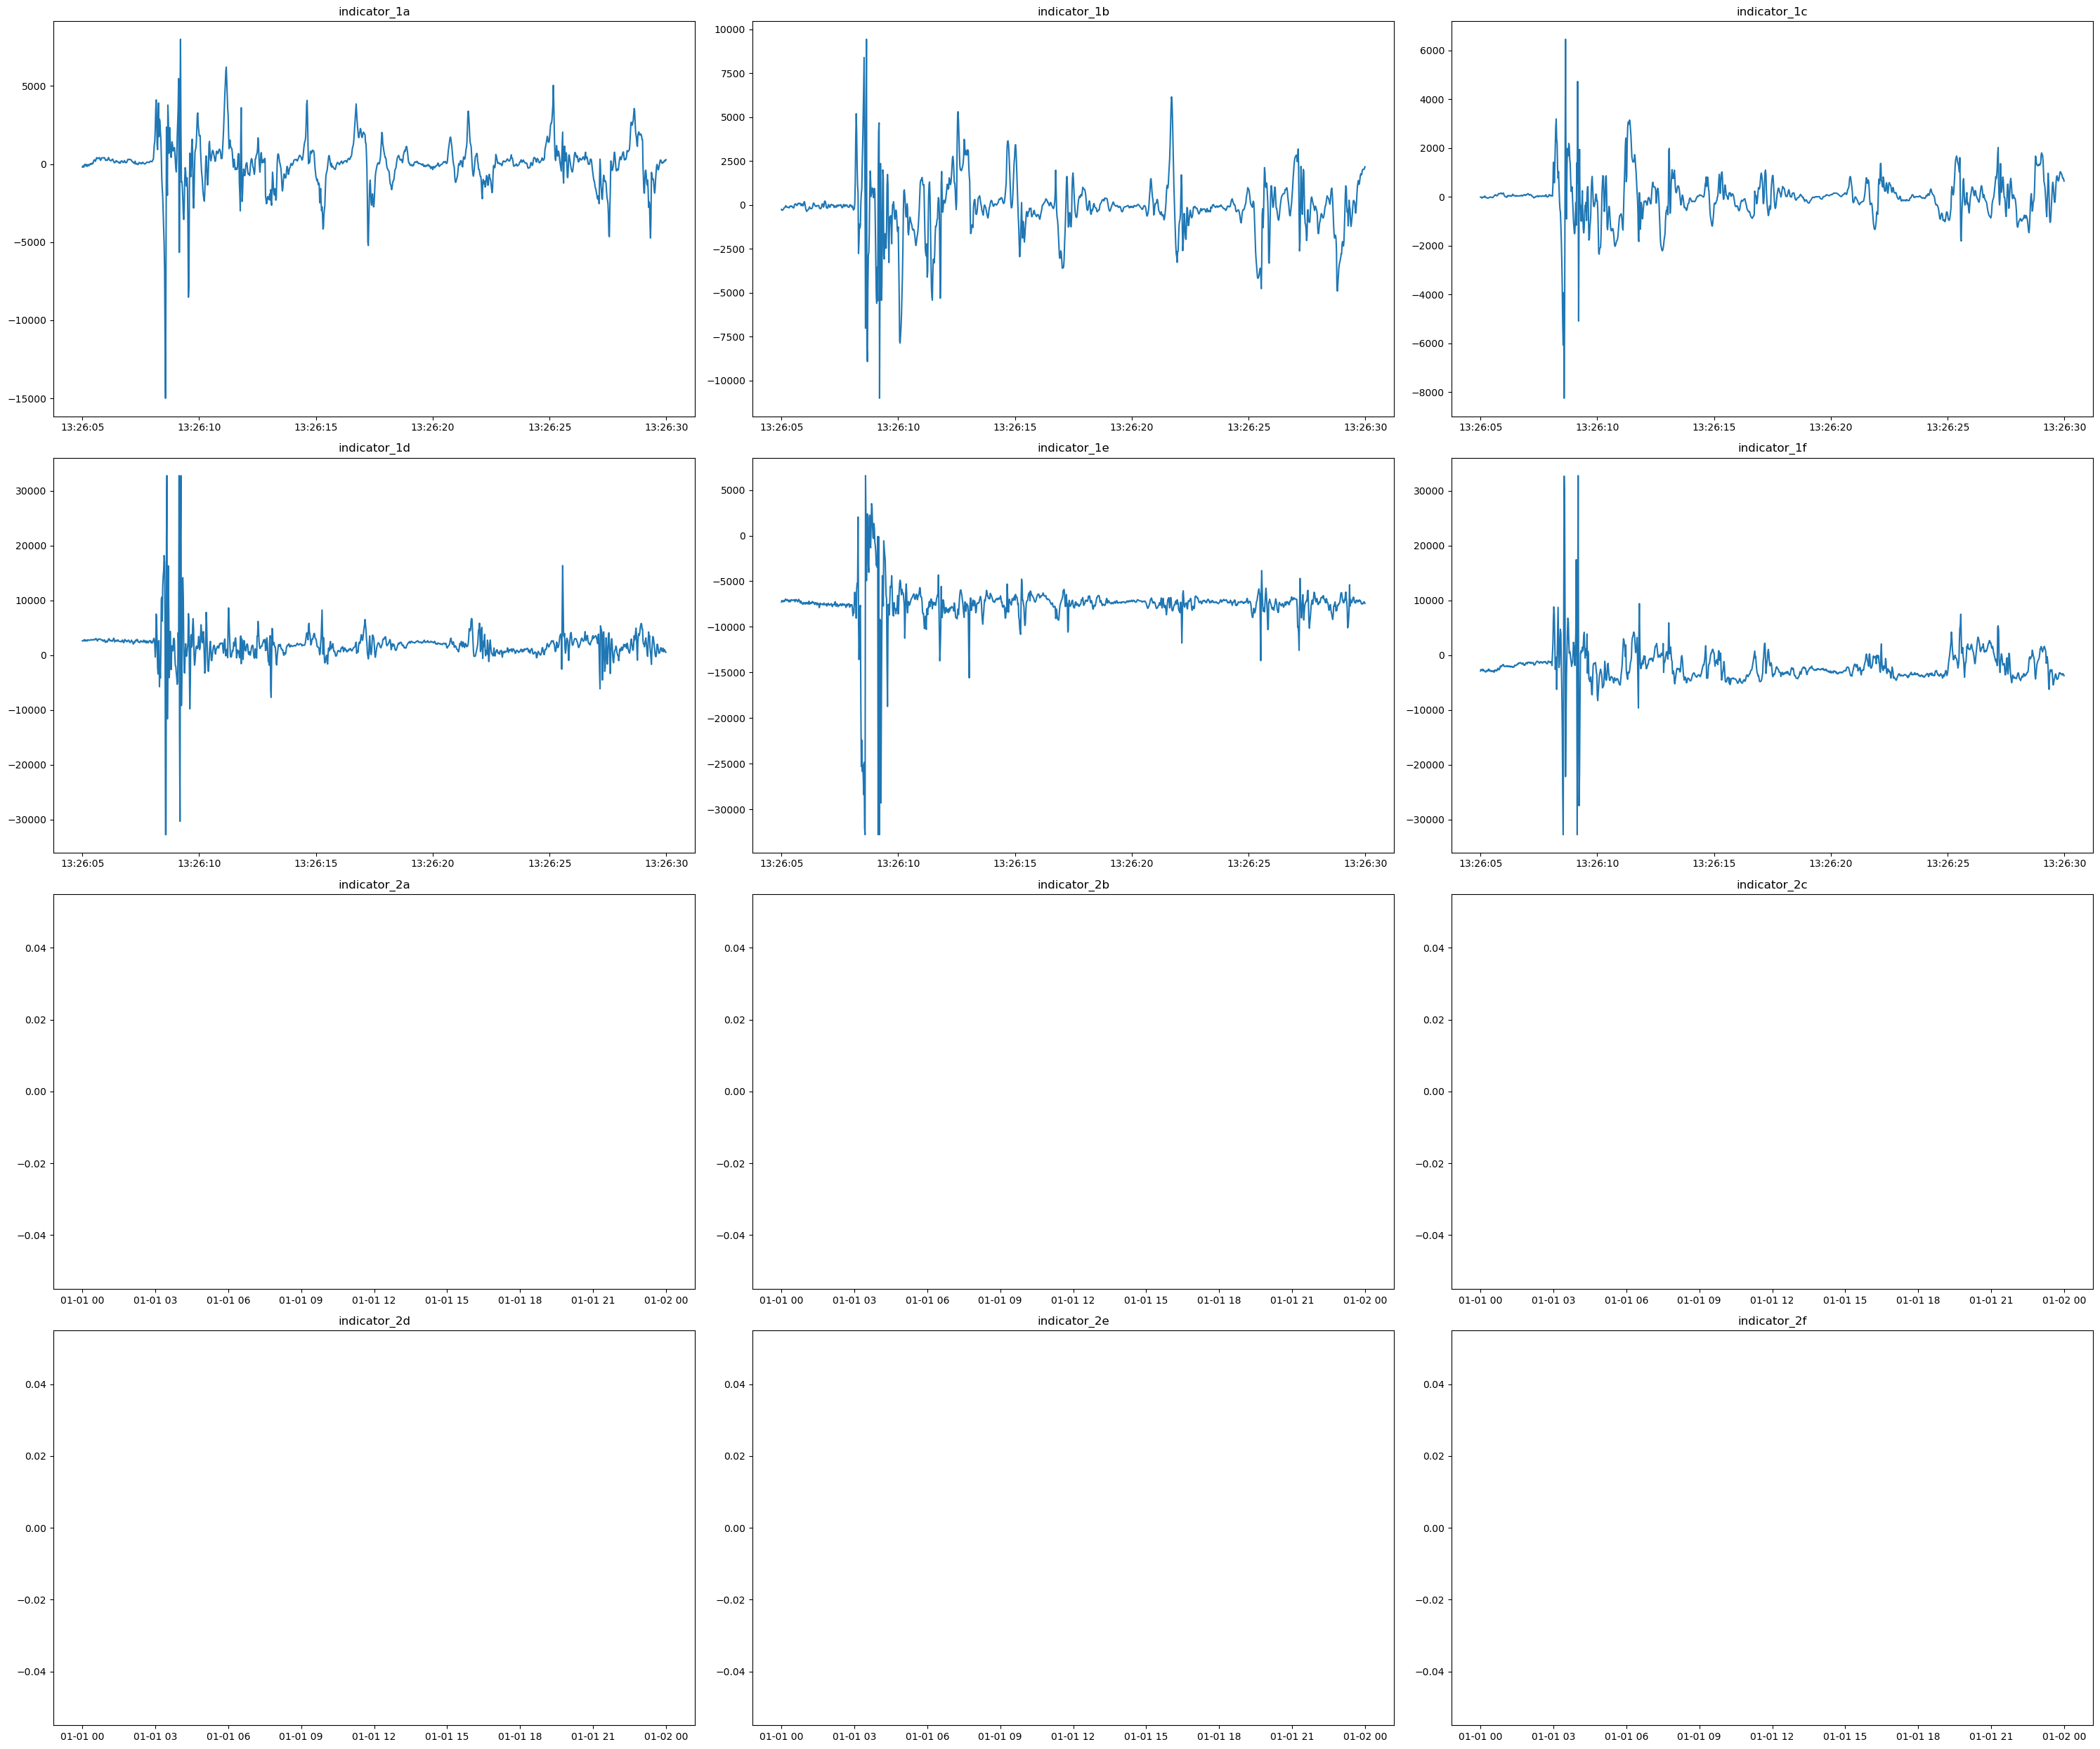

In [16]:
static_data_cols = ['asset_id', 'return_on_asset', 'company_age', 'company_size', 'revenue', 'time', 'roi_label', 'roi', 'magicIndicators2']
asset_df_plotter_copy = asset_df.drop(static_data_cols, axis=1)
fig, axes = plt.subplots(nrows = 4, ncols=3, figsize=(30, 25))
for i, col in enumerate(asset_df_plotter_copy.columns):
    axes.flatten()[i].plot(asset_df[col])
    axes.flatten()[i].set_title(col)

plt.tight_layout()
plt.show()

/var/folders/2g/1b4s4cdd6vqc24l2b2mm1ttw0000gn/T/ipykernel_68729/2899858834.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_df['timestamp'] = pd.to_datetime(asset_df['timestamp'], format='mixed')


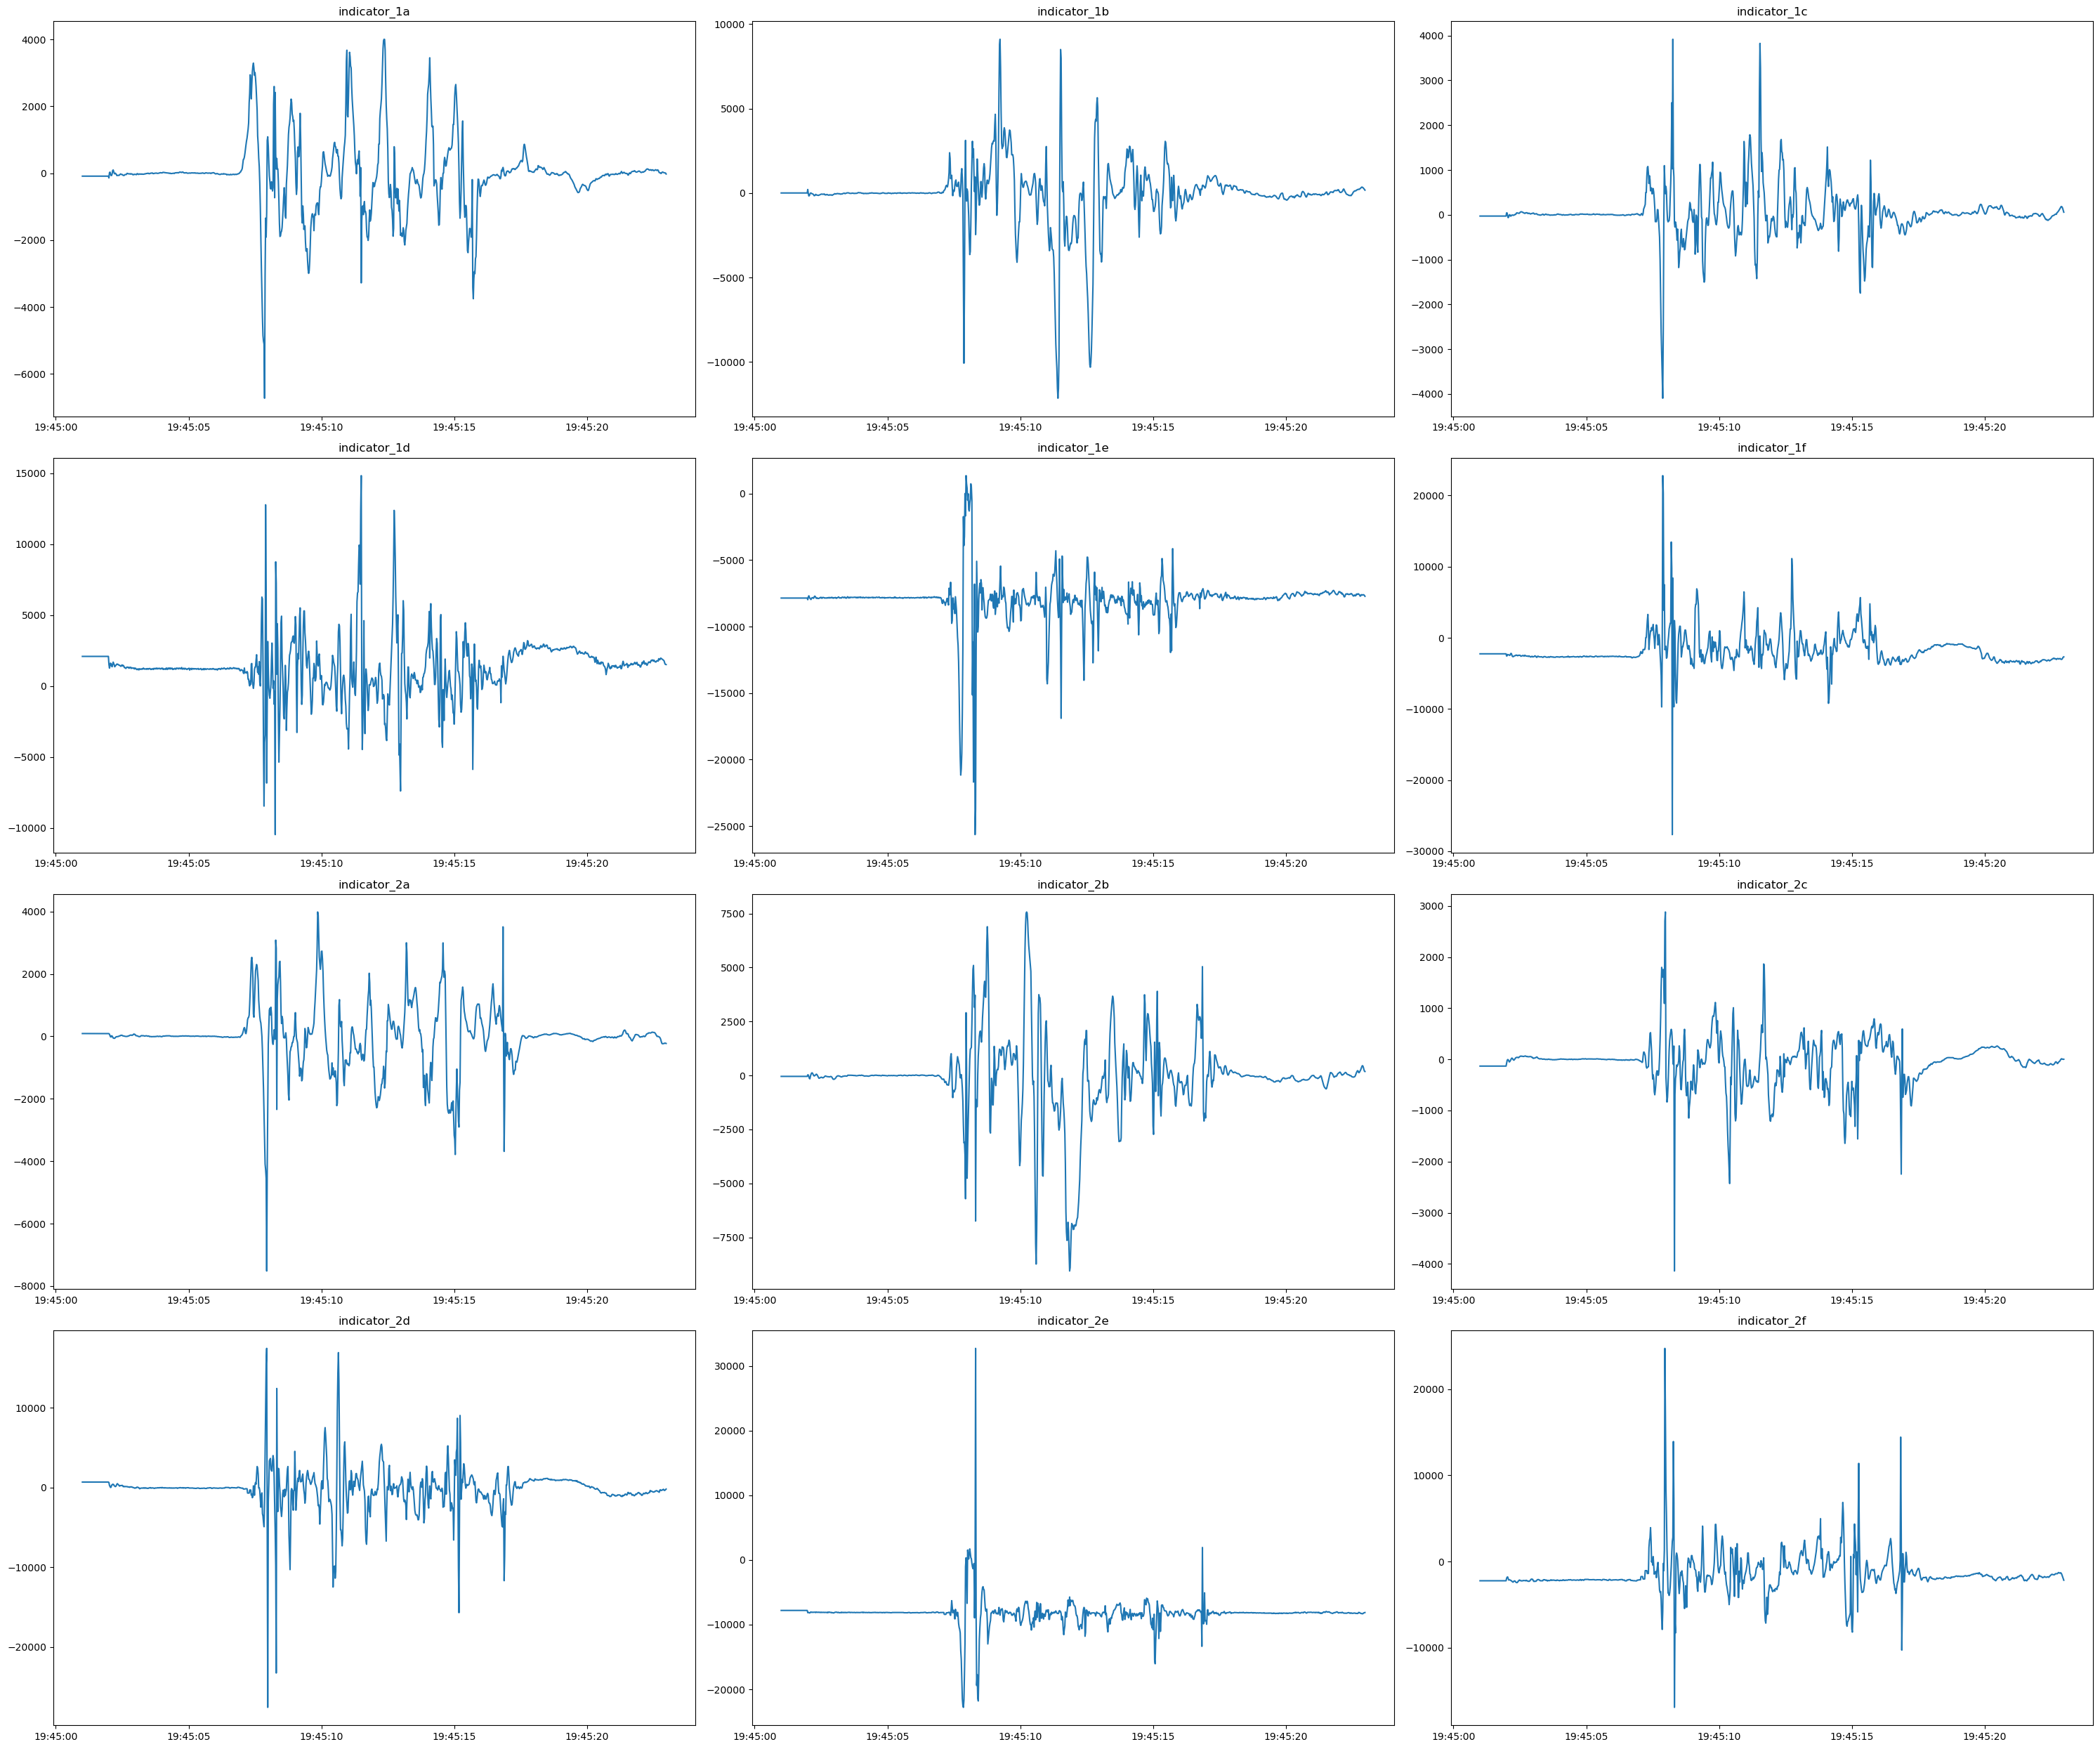

In [17]:
asset_df = list(asset_dfList.values())[4]
asset_df['timestamp'] = pd.to_datetime(asset_df['timestamp'], format='mixed')
asset_df.set_index('timestamp', inplace=True)

static_data_cols = ['asset_id', 'return_on_asset', 'company_age', 'company_size', 'revenue', 'time', 'roi_label', 'roi', 'magicIndicators2']
asset_df_plotter_copy = asset_df.drop(static_data_cols, axis=1)
fig, axes = plt.subplots(nrows = 4, ncols=3, figsize=(30, 25))
for i, col in enumerate(asset_df_plotter_copy.columns):
    axes.flatten()[i].plot(asset_df[col])
    axes.flatten()[i].set_title(col)

plt.tight_layout()
plt.show()

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



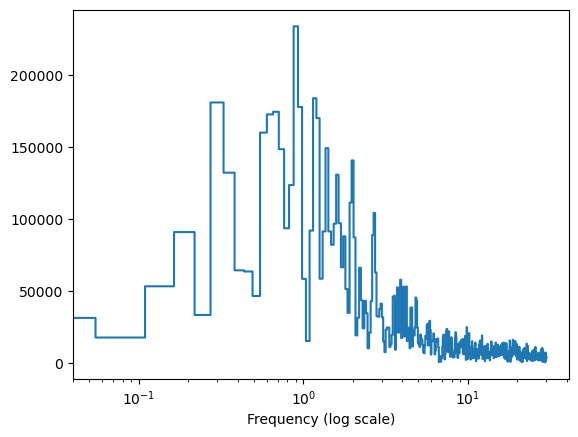

In [18]:
fft = tf.signal.rfft(asset_df["indicator_1a"])
f_per_dataset = np.arange(len(fft))
n_samples_sec = len(asset_df["indicator_1a"])
seconds_per_minute = 60 
minutes_per_dataset = n_samples_sec/ seconds_per_minute
f_per_minute = f_per_dataset / minutes_per_dataset
plt.step(f_per_minute, np.abs(fft))
plt.xscale("log")
# plt.xticks([1/5, 1/3, 1, 12, 53, 365.25], labels=["0.2 ","0.3 ", '1/Year', "1/month", "1/week", '1/day'])
_ = plt.xlabel('Frequency (log scale)')

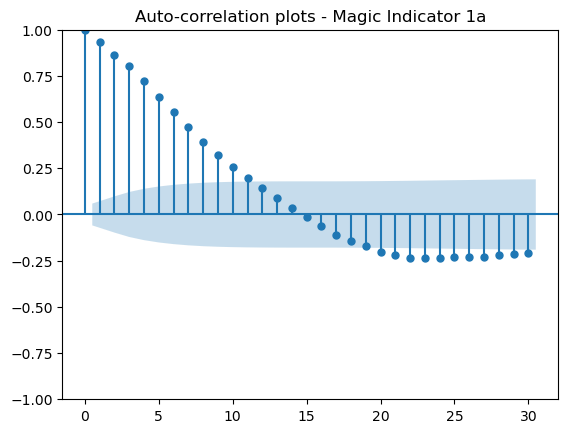

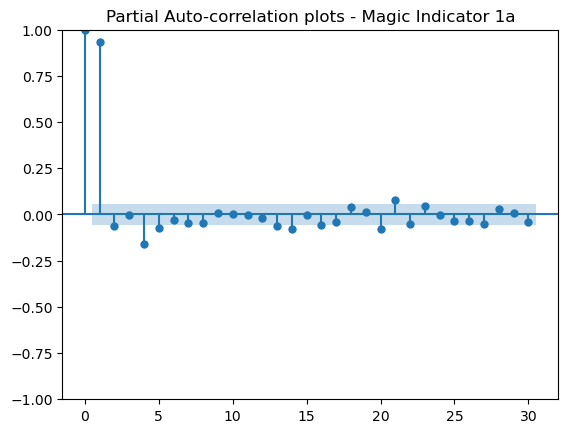

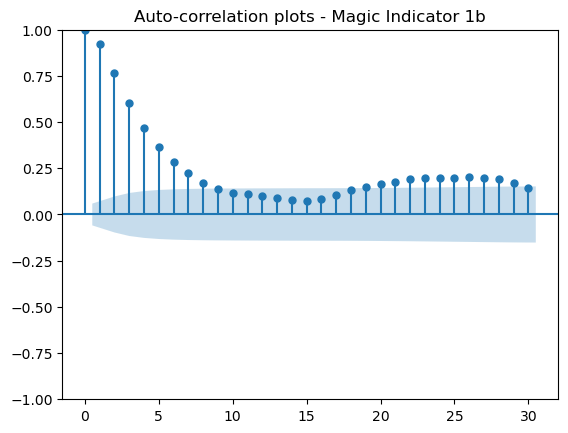

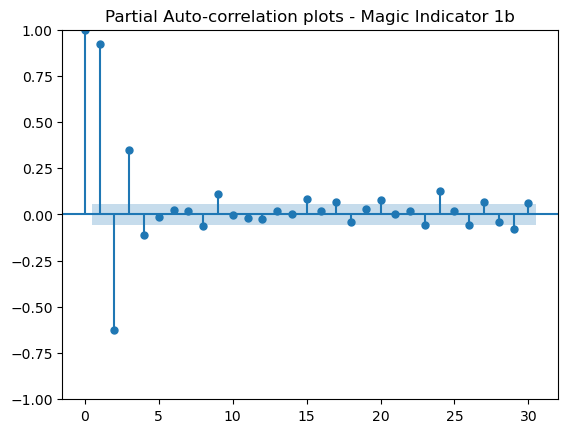

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot

_ = plot_acf(asset_df["indicator_1a"], lags=30, title="Auto-correlation plots - Magic Indicator 1a")
_ = plot_pacf(asset_df["indicator_1a"], lags=30, title="Partial Auto-correlation plots - Magic Indicator 1a")


_ = plot_acf(asset_df["indicator_1b"], lags=30, title="Auto-correlation plots - Magic Indicator 1b")
_ = plot_pacf(asset_df["indicator_1b"], lags=30, title="Partial Auto-correlation plots - Magic Indicator 1b")

In [17]:
df = train_df.copy()
df['timestamp'] = pd.to_datetime(df['timestamp'], format='mixed')
df.set_index('timestamp', inplace=True)
df['magicIndicators2'] = 0
missing_count = df.groupby('asset_id').transform(lambda x: x.isna().sum())['indicator_2a']
df['magicIndicators2'] = (missing_count == 0).astype(int)
df

asset_id    roi  \
timestamp                                                              
2023-03-25 13:26:05.000  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
2023-03-25 13:26:05.020  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
2023-03-25 13:26:05.040  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
2023-03-25 13:26:05.060  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
2023-03-25 13:26:05.080  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
...                                                       ...    ...   
2023-03-25 13:30:34.900  8d4a0924-5c4e-4b69-b14f-615d867f06c6  False   
2023-03-25 13:30:34.920  8d4a0924-5c4e-4b69-b14f-615d867f06c6  False   
2023-03-25 13:30:34.940  8d4a0924-5c4e-4b69-b14f-615d867f06c6  False   
2023-03-25 13:30:34.960  8d4a0924-5c4e-4b69-b14f-615d867f06c6  False   
2023-03-25 13:30:34.980  8d4a0924-5c4e-4b69-b14f-615d867f06c6  False   

                         indicator_1a  indicator_1b  indicator_1c  \
timestamp                                                           
2023-03-25 13:26:05.000          -190          -255           -13   
2023-03-25 13:26:05.020          -119          -308           -15   
2023-03-25 13:26:05.040          -167          -299           -33   
2023-03-25 13:26:05.060          -202          -290           -50   
2023-03-25 13:26:05.080           -86          -252           -44   
...                               ...           ...           ...   
2023-03-25 13:30:34.900           253          7748          -219   
2023-03-25 13:30:34.920           253          7748          -219   
2023-03-25 13:30:34.940           253          7748          -219   
2023-03-25 13:30:34.960           253          7748          -219   
2023-03-25 13:30:34.980           253          7748          -219   

                         indicator_1d  indicator_1e  indicator_1f  \
timestamp                                                           
2023-03-25 13:26:05.000          2593         -7271         -2873   
2023-03-25 13:26:05.020          2571         -7105         -2625   
2023-03-25 13:26:05.040          2635         -7155         -2627   
2023-03-25 13:26:05.060          2718         -7233         -2801   
2023-03-25 13:26:05.080          2823         -7242         -2823   
...                               ...           ...           ...   
2023-03-25 13:30:34.900          2736         -7945          -609   
2023-03-25 13:30:34.920          2736         -7945          -609   
2023-03-25 13:30:34.940          2736         -7945          -609   
2023-03-25 13:30:34.960          2736         -7945          -609   
2023-03-25 13:30:34.980          2736         -7945          -609   

                         return_on_asset  company_age  ...  revenue  \
timestamp                                              ...            
2023-03-25 13:26:05.000               31           18  ...      172   
2023-03-25 13:26:05.020               31           18  ...      172   
2023-03-25 13:26:05.040               31           18  ...      172   
2023-03-25 13:26:05.060               31           18  ...      172   
2023-03-25 13:26:05.080               31           18  ...      172   
...                                  ...          ...  ...      ...   
2023-03-25 13:30:34.900               39           18  ...      172   
2023-03-25 13:30:34.920               39           18  ...      172   
2023-03-25 13:30:34.940               39           18  ...      172   
2023-03-25 13:30:34.960               39           18  ...      172   
2023-03-25 13:30:34.980               39           18  ...      172   

                         indicator_2a  indicator_2b  indicator_2c  \
timestamp                                                           
2023-03-25 13:26:05.000           NaN           NaN           NaN   
2023-03-25 13:26:05.020           NaN           NaN           NaN   
2023-03-25 13:26:05.040           NaN           NaN           NaN   
2023-03-25 13:26:05.060           NaN           NaN

In [18]:
df['magicIndicators2'].sum()

19400

In [19]:
from sklearn.preprocessing import StandardScaler

magic_indicators_1 = ['indicator_1a', 'indicator_1b', 'indicator_1c', 'indicator_1d', 'indicator_1e', 
                    'indicator_1f']

magic_indicators_2 = ['indicator_1a', 'indicator_1b', 'indicator_1c', 'indicator_1d', 'indicator_1e', 
                    'indicator_1f', 'indicator_2a', 'indicator_2b', 'indicator_2c', 'indicator_2d', 
                    'indicator_2e', 'indicator_2f']

df_scaled = pd.DataFrame()

for asset in assetsList:
    df_asset = df[df['asset_id'] == asset].copy()
    scaler = StandardScaler()
    
    # Fit the scaler to the Magic Indicators of this asset and transform them
    if df_asset['magicIndicators2'].sum() ==0: #these dont have magic indicators set 2
        df_asset[magic_indicators_1] = scaler.fit_transform(df_asset[magic_indicators_1])
    else:
        df_asset[magic_indicators_2] = scaler.fit_transform(df_asset[magic_indicators_2])
    
    df_scaled = pd.concat([df_scaled, df_asset]) # type: ignore


In [20]:
df_scaled

asset_id    roi  \
timestamp                                                              
2023-03-25 13:26:05.000  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
2023-03-25 13:26:05.020  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
2023-03-25 13:26:05.040  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
2023-03-25 13:26:05.060  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
2023-03-25 13:26:05.080  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
...                                                       ...    ...   
2023-03-25 13:30:34.900  8d4a0924-5c4e-4b69-b14f-615d867f06c6  False   
2023-03-25 13:30:34.920  8d4a0924-5c4e-4b69-b14f-615d867f06c6  False   
2023-03-25 13:30:34.940  8d4a0924-5c4e-4b69-b14f-615d867f06c6  False   
2023-03-25 13:30:34.960  8d4a0924-5c4e-4b69-b14f-615d867f06c6  False   
2023-03-25 13:30:34.980  8d4a0924-5c4e-4b69-b14f-615d867f06c6  False   

                         indicator_1a  indicator_1b  indicator_1c  \
timestamp                                                           
2023-03-25 13:26:05.000     -0.168211     -0.051958      0.015732   
2023-03-25 13:26:05.020     -0.120464     -0.084125      0.013419   
2023-03-25 13:26:05.040     -0.152744     -0.078662     -0.007402   
2023-03-25 13:26:05.060     -0.176281     -0.073200     -0.027066   
2023-03-25 13:26:05.080     -0.098272     -0.050137     -0.020126   
...                               ...           ...           ...   
2023-03-25 13:30:34.900      0.027279      2.443397     -0.232110   
2023-03-25 13:30:34.920      0.027279      2.443397     -0.232110   
2023-03-25 13:30:34.940      0.027279      2.443397     -0.232110   
2023-03-25 13:30:34.960      0.027279      2.443397     -0.232110   
2023-03-25 13:30:34.980      0.027279      2.443397     -0.232110   

                         indicator_1d  indicator_1e  indicator_1f  \
timestamp                                                           
2023-03-25 13:26:05.000      0.233250      0.083485     -0.245436   
2023-03-25 13:26:05.020      0.226432      0.144396     -0.171261   
2023-03-25 13:26:05.040      0.246267      0.126049     -0.171859   
2023-03-25 13:26:05.060      0.271990      0.097428     -0.223901   
2023-03-25 13:26:05.080      0.304532      0.094126     -0.230482   
...                               ...           ...           ...   
2023-03-25 13:30:34.900      0.209033     -0.110754      0.303979   
2023-03-25 13:30:34.920      0.209033     -0.110754      0.303979   
2023-03-25 13:30:34.940      0.209033     -0.110754      0.303979   
2023-03-25 13:30:34.960      0.209033     -0.110754      0.303979   
2023-03-25 13:30:34.980      0.209033     -0.110754      0.303979   

                         return_on_asset  company_age  ...  revenue  \
timestamp                                              ...            
2023-03-25 13:26:05.000               31           18  ...      172   
2023-03-25 13:26:05.020               31           18  ...      172   
2023-03-25 13:26:05.040               31           18  ...      172   
2023-03-25 13:26:05.060               31           18  ...      172   
2023-03-25 13:26:05.080               31           18  ...      172   
...                                  ...          ...  ...      ...   
2023-03-25 13:30:34.900               39           18  ...      172   
2023-03-25 13:30:34.920               39           18  ...      172   
2023-03-25 13:30:34.940               39           18  ...      172   
2023-03-25 13:30:34.960               39           18  ...      172   
2023-03-25 13:30:34.980               39           18  ...      172   

                         indicator_2a  indicator_2b  indicator_2c  \
timestamp                                                           
2023-03-25 13:26:05.000           NaN           NaN           NaN   
2023-03-25 13:26:05.020           NaN           NaN           NaN   
2023-03-25 13:26:05.040           NaN           NaN           NaN   
2023-03-25 13:26:05.060           NaN           NaN

In [24]:
"""
# List of your Magic Indicator column names
magic_indicators = ['indicator_1a', 'indicator_1b', 'indicator_1c', 'indicator_1d', 'indicator_1e', 
                    'indicator_1f', 'indicator_2a', 'indicator_2b', 'indicator_2c', 
                    'indicator_2d', 'indicator_2e', 'indicator_2f']

# Create new columns for the rate of change and summary statistics for each Magic Indicator
for indicator in magic_indicators:
    # Calculate the rate of change for each asset
    df_scaled[indicator + '_roc'] = df_scaled.groupby('asset_id')[indicator].transform(lambda x: x.iat[-1] - x.iat[0])
    
    # Calculate summary statistics for each asset
    df_scaled[indicator + '_mean'] = df_scaled.groupby('asset_id')[indicator].transform('mean')
    df_scaled[indicator + '_std'] = df_scaled.groupby('asset_id')[indicator].transform('std')
    df_scaled[indicator + '_max'] = df_scaled.groupby('asset_id')[indicator].transform('max')
    df_scaled[indicator + '_min'] = df_scaled.groupby('asset_id')[indicator].transform('min')
"""

"\n# List of your Magic Indicator column names\nmagic_indicators = ['indicator_1a', 'indicator_1b', 'indicator_1c', 'indicator_1d', 'indicator_1e', \n                    'indicator_1f', 'indicator_2a', 'indicator_2b', 'indicator_2c', \n                    'indicator_2d', 'indicator_2e', 'indicator_2f']\n\n# Create new columns for the rate of change and summary statistics for each Magic Indicator\nfor indicator in magic_indicators:\n    # Calculate the rate of change for each asset\n    df_scaled[indicator + '_roc'] = df_scaled.groupby('asset_id')[indicator].transform(lambda x: x.iat[-1] - x.iat[0])\n    \n    # Calculate summary statistics for each asset\n    df_scaled[indicator + '_mean'] = df_scaled.groupby('asset_id')[indicator].transform('mean')\n    df_scaled[indicator + '_std'] = df_scaled.groupby('asset_id')[indicator].transform('std')\n    df_scaled[indicator + '_max'] = df_scaled.groupby('asset_id')[indicator].transform('max')\n    df_scaled[indicator + '_min'] = df_scaled.gro

In [25]:
df_scaled

asset_id    roi  \
timestamp                                                              
2023-03-25 13:26:05.000  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
2023-03-25 13:26:05.020  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
2023-03-25 13:26:05.040  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
2023-03-25 13:26:05.060  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
2023-03-25 13:26:05.080  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
...                                                       ...    ...   
2023-03-25 13:30:34.900  8d4a0924-5c4e-4b69-b14f-615d867f06c6  False   
2023-03-25 13:30:34.920  8d4a0924-5c4e-4b69-b14f-615d867f06c6  False   
2023-03-25 13:30:34.940  8d4a0924-5c4e-4b69-b14f-615d867f06c6  False   
2023-03-25 13:30:34.960  8d4a0924-5c4e-4b69-b14f-615d867f06c6  False   
2023-03-25 13:30:34.980  8d4a0924-5c4e-4b69-b14f-615d867f06c6  False   

                         indicator_1a  indicator_1b  indicator_1c  \
timestamp                                                           
2023-03-25 13:26:05.000     -0.168211     -0.051958      0.015732   
2023-03-25 13:26:05.020     -0.120464     -0.084125      0.013419   
2023-03-25 13:26:05.040     -0.152744     -0.078662     -0.007402   
2023-03-25 13:26:05.060     -0.176281     -0.073200     -0.027066   
2023-03-25 13:26:05.080     -0.098272     -0.050137     -0.020126   
...                               ...           ...           ...   
2023-03-25 13:30:34.900      0.027279      2.443397     -0.232110   
2023-03-25 13:30:34.920      0.027279      2.443397     -0.232110   
2023-03-25 13:30:34.940      0.027279      2.443397     -0.232110   
2023-03-25 13:30:34.960      0.027279      2.443397     -0.232110   
2023-03-25 13:30:34.980      0.027279      2.443397     -0.232110   

                         indicator_1d  indicator_1e  indicator_1f  \
timestamp                                                           
2023-03-25 13:26:05.000      0.233250      0.083485     -0.245436   
2023-03-25 13:26:05.020      0.226432      0.144396     -0.171261   
2023-03-25 13:26:05.040      0.246267      0.126049     -0.171859   
2023-03-25 13:26:05.060      0.271990      0.097428     -0.223901   
2023-03-25 13:26:05.080      0.304532      0.094126     -0.230482   
...                               ...           ...           ...   
2023-03-25 13:30:34.900      0.209033     -0.110754      0.303979   
2023-03-25 13:30:34.920      0.209033     -0.110754      0.303979   
2023-03-25 13:30:34.940      0.209033     -0.110754      0.303979   
2023-03-25 13:30:34.960      0.209033     -0.110754      0.303979   
2023-03-25 13:30:34.980      0.209033     -0.110754      0.303979   

                         return_on_asset  company_age  ...  revenue  \
timestamp                                              ...            
2023-03-25 13:26:05.000               31           18  ...      172   
2023-03-25 13:26:05.020               31           18  ...      172   
2023-03-25 13:26:05.040               31           18  ...      172   
2023-03-25 13:26:05.060               31           18  ...      172   
2023-03-25 13:26:05.080               31           18  ...      172   
...                                  ...          ...  ...      ...   
2023-03-25 13:30:34.900               39           18  ...      172   
2023-03-25 13:30:34.920               39           18  ...      172   
2023-03-25 13:30:34.940               39           18  ...      172   
2023-03-25 13:30:34.960               39           18  ...      172   
2023-03-25 13:30:34.980               39           18  ...      172   

                         indicator_2a  indicator_2b  indicator_2c  \
timestamp                                                           
2023-03-25 13:26:05.000           NaN           NaN           NaN   
2023-03-25 13:26:05.020           NaN           NaN           NaN   
2023-03-25 13:26:05.040           NaN           NaN           NaN   
2023-03-25 13:26:05.060           NaN           NaN

In [21]:
df_scaled_0 = df_scaled[df_scaled['magicIndicators2']==0].copy()
df_scaled_0.drop(columns=['indicator_2a', 'indicator_2b', 'indicator_2c', 'indicator_2d', 'indicator_2e', 'indicator_2f'], axis=1, inplace=True)
df_scaled_0

asset_id    roi  \
timestamp                                                              
2023-03-25 13:26:05.000  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
2023-03-25 13:26:05.020  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
2023-03-25 13:26:05.040  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
2023-03-25 13:26:05.060  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
2023-03-25 13:26:05.080  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
...                                                       ...    ...   
2023-03-25 13:30:34.900  8d4a0924-5c4e-4b69-b14f-615d867f06c6  False   
2023-03-25 13:30:34.920  8d4a0924-5c4e-4b69-b14f-615d867f06c6  False   
2023-03-25 13:30:34.940  8d4a0924-5c4e-4b69-b14f-615d867f06c6  False   
2023-03-25 13:30:34.960  8d4a0924-5c4e-4b69-b14f-615d867f06c6  False   
2023-03-25 13:30:34.980  8d4a0924-5c4e-4b69-b14f-615d867f06c6  False   

                         indicator_1a  indicator_1b  indicator_1c  \
timestamp                                                           
2023-03-25 13:26:05.000     -0.168211     -0.051958      0.015732   
2023-03-25 13:26:05.020     -0.120464     -0.084125      0.013419   
2023-03-25 13:26:05.040     -0.152744     -0.078662     -0.007402   
2023-03-25 13:26:05.060     -0.176281     -0.073200     -0.027066   
2023-03-25 13:26:05.080     -0.098272     -0.050137     -0.020126   
...                               ...           ...           ...   
2023-03-25 13:30:34.900      0.027279      2.443397     -0.232110   
2023-03-25 13:30:34.920      0.027279      2.443397     -0.232110   
2023-03-25 13:30:34.940      0.027279      2.443397     -0.232110   
2023-03-25 13:30:34.960      0.027279      2.443397     -0.232110   
2023-03-25 13:30:34.980      0.027279      2.443397     -0.232110   

                         indicator_1d  indicator_1e  indicator_1f  \
timestamp                                                           
2023-03-25 13:26:05.000      0.233250      0.083485     -0.245436   
2023-03-25 13:26:05.020      0.226432      0.144396     -0.171261   
2023-03-25 13:26:05.040      0.246267      0.126049     -0.171859   
2023-03-25 13:26:05.060      0.271990      0.097428     -0.223901   
2023-03-25 13:26:05.080      0.304532      0.094126     -0.230482   
...                               ...           ...           ...   
2023-03-25 13:30:34.900      0.209033     -0.110754      0.303979   
2023-03-25 13:30:34.920      0.209033     -0.110754      0.303979   
2023-03-25 13:30:34.940      0.209033     -0.110754      0.303979   
2023-03-25 13:30:34.960      0.209033     -0.110754      0.303979   
2023-03-25 13:30:34.980      0.209033     -0.110754      0.303979   

                         return_on_asset  company_age  company_size  revenue  \
timestamp                                                                      
2023-03-25 13:26:05.000               31           18            65      172   
2023-03-25 13:26:05.020               31           18            65      172   
2023-03-25 13:26:05.040               31           18            65      172   
2023-03-25 13:26:05.060               31           18            65      172   
2023-03-25 13:26:05.080               31           18            65      172   
...                                  ...          ...           ...      ...   
2023-03-25 13:30:34.900               39           18            65      172   
2023-03-25 13:30:34.920               39           18            65      172   
2023-03-25 13:30:34.940               39           18            65      172   
2023-03-25 13:30:34.960               39           18            65      172   
2023-03-25 13:30:34.980               39           18            65      172   

                                           time  roi_label  magicIndicators2  
timestamp                                                                     
2023-03-25 13:26:05.000 2023-03-25 13:26:05.000          0                 0  
2023-03-25 13:26:05.020 2023-03-25 13:26:0

In [22]:
df_scaled_1 = df_scaled[df_scaled['magicIndicators2']==1].copy()
df_scaled_1

asset_id    roi  \
timestamp                                                              
2023-02-27 19:45:01.000  b9a9903e-076e-4dbd-8ba3-d0603f8a774c  False   
2023-02-27 19:45:01.020  b9a9903e-076e-4dbd-8ba3-d0603f8a774c  False   
2023-02-27 19:45:01.040  b9a9903e-076e-4dbd-8ba3-d0603f8a774c  False   
2023-02-27 19:45:01.060  b9a9903e-076e-4dbd-8ba3-d0603f8a774c  False   
2023-02-27 19:45:01.080  b9a9903e-076e-4dbd-8ba3-d0603f8a774c  False   
...                                                       ...    ...   
2023-02-24 19:41:12.900  711c2bd5-0c5c-422d-97ec-da7ce93136a3  False   
2023-02-24 19:41:12.920  711c2bd5-0c5c-422d-97ec-da7ce93136a3  False   
2023-02-24 19:41:12.940  711c2bd5-0c5c-422d-97ec-da7ce93136a3  False   
2023-02-24 19:41:12.960  711c2bd5-0c5c-422d-97ec-da7ce93136a3  False   
2023-02-24 19:41:12.980  711c2bd5-0c5c-422d-97ec-da7ce93136a3  False   

                         indicator_1a  indicator_1b  indicator_1c  \
timestamp                                                           
2023-02-27 19:45:01.000     -0.063335      0.034917     -0.119001   
2023-02-27 19:45:01.020     -0.063335      0.034917     -0.119001   
2023-02-27 19:45:01.040     -0.063335      0.034917     -0.119001   
2023-02-27 19:45:01.060     -0.063335      0.034917     -0.119001   
2023-02-27 19:45:01.080     -0.063335      0.034917     -0.119001   
...                               ...           ...           ...   
2023-02-24 19:41:12.900     -0.655750      0.120265     -0.138412   
2023-02-24 19:41:12.920     -0.598294     -0.282634     -0.187608   
2023-02-24 19:41:12.940     -0.526824     -0.541033     -0.199087   
2023-02-24 19:41:12.960     -0.457456     -0.626883     -0.128573   
2023-02-24 19:41:12.980     -0.374075     -0.528283     -0.003943   

                         indicator_1d  indicator_1e  indicator_1f  \
timestamp                                                           
2023-02-27 19:45:01.000      0.379746      0.053611     -0.171548   
2023-02-27 19:45:01.020      0.379746      0.053611     -0.171548   
2023-02-27 19:45:01.040      0.379746      0.053611     -0.171548   
2023-02-27 19:45:01.060      0.379746      0.053611     -0.171548   
2023-02-27 19:45:01.080      0.379746      0.053611     -0.171548   
...                               ...           ...           ...   
2023-02-24 19:41:12.900     -1.078738     -0.002552      0.022743   
2023-02-24 19:41:12.920     -1.114406     -0.012607      0.073511   
2023-02-24 19:41:12.940     -0.953899     -0.076059      0.164266   
2023-02-24 19:41:12.960     -0.679141     -0.086114      0.297443   
2023-02-24 19:41:12.980     -0.620622     -0.111079      0.479301   

                         return_on_asset  company_age  ...  revenue  \
timestamp                                              ...            
2023-02-27 19:45:01.000               17           15  ...      180   
2023-02-27 19:45:01.020               17           15  ...      180   
2023-02-27 19:45:01.040               17           15  ...      180   
2023-02-27 19:45:01.060               17           15  ...      180   
2023-02-27 19:45:01.080               17           15  ...      180   
...                                  ...          ...  ...      ...   
2023-02-24 19:41:12.900               44           20  ...      182   
2023-02-24 19:41:12.920               44           20  ...      182   
2023-02-24 19:41:12.940               44           20  ...      182   
2023-02-24 19:41:12.960               44           20  ...      182   
2023-02-24 19:41:12.980               44           20  ...      182   

                         indicator_2a  indicator_2b  indicator_2c  \
timestamp                                                           
2023-02-27 19:45:01.000      0.113484      0.027169     -0.201270   
2023-02-27 19:45:01.020      0.113484      0.027169     -0.201270   
2023-02-27 19:45:01.040      0.113484      0.027169     -0.201270   
2023-02-27 19:45:01.060      0.113484      0.027169

In [23]:
df_scaled['company_size'].value_counts()

company_size
57    6600
61    5200
65    5100
60    4400
72    3850
56    3100
69    2850
62    2500
50    2000
Name: count, dtype: int64

In [24]:
df_scaled['company_age'].value_counts()

company_age
15    14100
14     7600
18     5100
16     4950
20     3850
Name: count, dtype: int64

In [25]:
df_scaled['revenue'].value_counts()

revenue
172    7200
183    5200
180    4400
182    3850
170    3100
177    2850
176    2500
117    2300
171    2200
167    2000
Name: count, dtype: int64

In [26]:
df_scaled['asset_id'].value_counts()

asset_id
4bc01d4c-12fc-423c-8850-020224337255    1550
156f1f38-b84a-4660-b8be-9958338a7b73    1350
adb4f023-2f14-44eb-a4b8-9128f99f2286    1250
bd9b34ca-473c-404e-b636-c3f22e17882e    1250
6479dfa5-6c1f-4e7e-a230-6f4382a98a0a    1100
b9a9903e-076e-4dbd-8ba3-d0603f8a774c    1100
329166d4-47e7-4771-bd0a-cc67b2b37adf    1050
0beba536-2af1-4dcb-b2d4-f35105b56299    1050
ad52e9b4-2221-43fb-95e1-5ab7f0353ae4    1000
47b936e9-48dc-4ee5-8964-1f7c7619ccc7    1000
cfd9125a-312d-4a43-bb26-1c11bb421835     950
6b8c050d-ead9-4a5e-b5fd-98dc66d7feb2     950
4a91e89c-9a29-42f3-9575-d240513e7ae0     950
ce741191-daa0-4c50-9398-6588d6b76306     950
09865597-5a47-4206-b244-3ac616d5f964     950
711c2bd5-0c5c-422d-97ec-da7ce93136a3     850
8a3d7824-1707-42a4-9ce5-5a52b1b12a00     850
22809a85-cf40-4767-b7ab-d277048ffb81     850
761c8fed-213b-4ceb-a051-efe41e76247e     850
8ab21f96-b17e-4784-ad88-04d08101c14b     800
db71a1d4-84ca-4829-8379-553d0d748655     800
6222ff38-0eac-4765-b720-f208aa6084fb     800
6

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Define the features and target
# Use only indicator_1x for all assets, indicator_2x for assets that have them, and the four static features

features_0 = ['company_age', 'company_size', 'revenue', 'indicator_1a', 'indicator_1b', 'indicator_1c', 'indicator_1d', 'indicator_1e', 
                    'indicator_1f']

features_1 = ['company_age', 'company_size', 'revenue', 'indicator_1a', 'indicator_1b', 'indicator_1c', 'indicator_1d', 'indicator_1e', 
                    'indicator_1f', 'indicator_2a', 'indicator_2b', 'indicator_2c', 'indicator_2d', 
                    'indicator_2e', 'indicator_2f']

# Add indicator_2x features to the feature list if magicIndicators2 is 1 for an asset
# df_scaled.loc[df_scaled['magicIndicators2'] == 1, features_0] = df_scaled.loc[df_scaled['magicIndicators2'] == 1, features_0 + features_1]

X_0 = df_scaled_0[features_0]
y_0 = df_scaled_0['roi']

X_1 = df_scaled_1[features_1]
y_1 = df_scaled_1['roi']

# Split the data into training and validation sets
X_0_train, X_0_valid, y_0_train, y_0_valid = train_test_split(X_0, y_0, test_size=0.2, random_state=42)

X_1_train, X_1_valid, y_1_train, y_1_valid = train_test_split(X_1, y_1, test_size=0.2, random_state=42)


In [33]:
from sklearn.metrics import accuracy_score
# Train the model
# del(clf_0)
clf_0 = RandomForestClassifier(n_estimators=50, random_state=42, bootstrap= True, max_depth= 30, min_samples_leaf= 1, min_samples_split= 2)
clf_0.fit(X_0_train, y_0_train)

# Make predictions on the validation set
y_0_pred = clf_0.predict(X_0_valid)

print(classification_report(y_0_valid, y_0_pred))
print("Accuracy = ", accuracy_score(y_0_pred, y_0_valid))


              precision    recall  f1-score   support

       False       0.96      1.00      0.98      2928
        True       0.95      0.64      0.76       312

    accuracy                           0.96      3240
   macro avg       0.96      0.82      0.87      3240
weighted avg       0.96      0.96      0.96      3240

Accuracy =  0.962037037037037


In [34]:
X_0_train, X_0_valid, y_0_train, y_0_valid = train_test_split(X_0, y_0, test_size=0.4, random_state=20)
y_0_pred = clf_0.predict(X_0_valid)

print(classification_report(y_0_valid, y_0_pred))
print("Accuracy = ", accuracy_score(y_0_pred, y_0_valid))

              precision    recall  f1-score   support

       False       0.99      1.00      1.00      5848
        True       1.00      0.94      0.97       632

    accuracy                           0.99      6480
   macro avg       0.99      0.97      0.98      6480
weighted avg       0.99      0.99      0.99      6480

Accuracy =  0.9935185185185185


In [247]:
from sklearn.linear_model import LogisticRegression
# Create linear regression object
regr_0 = LogisticRegression(penalty='l2', solver="liblinear", max_iter=200)

# Train the model using the training sets
regr_0.fit(X_0_train, y_0_train)

# Make predictions using the testing set
y_0_pred_regr = regr_0.predict(X_0_valid)

# The coefficients
print("Coefficients: \n", regr_0.coef_)
# # The mean squared error
# print("Mean squared error: %.2f" % mean_squared_error(y_0_valid, y_0_pred_regr))
# # The coefficient of determination: 1 is perfect prediction
# print("Coefficient of determination: %.2f" % r2_score(y_0_valid, y_0_pred_regr))

accuracy_score(y_0_valid, y_0_pred_regr)
df_scaled.columns
features_static = ['company_age', 'company_size', 'revenue']

X_0_static = df_scaled_0[features_static]
y_0_static = df_scaled_0['roi']

X_1_static = df_scaled_1[features_static]
y_1_static = df_scaled_1['roi']

# Split the data into training and validation sets
X_0_static_train, X_0_static_valid, y_0_static_train, y_0_static_valid = train_test_split(X_0_static, y_0_static, test_size=0.2, random_state=42)

X_1_static_train, X_1_static_valid, y_1_static_train, y_1_static_valid = train_test_split(X_1_static, y_1_static, test_size=0.2, random_state=42)
regr_0_static = LogisticRegression(penalty='l2', solver="liblinear", max_iter=200)


# Train the model using the training sets
regr_0_static.fit(X_0_static_train, y_0_static_train)

# Make predictions using the testing set
y_0_static_pred_regr = regr_0_static.predict(X_0_static_valid)

# The coefficients
print("Coefficients: \n", regr_0_static.coef_)
# The mean squared error
# print("Mean squared error: %.2f" % mean_squared_error(y_0_static_valid, y_0_static_pred_regr))
# # The coefficient of determination: 1 is perfect prediction
# print("Coefficient of determination: %.2f" % r2_score(y_0_static_valid, y_0_static_pred_regr))
accuracy_score(y_0_valid, y_0_static_pred_regr)
# Get the intercepts from both models
intercept_model1 = regr_0.intercept_
intercept_model2 = regr_0_static.intercept_

# Create a unified model by concatenating the coefficients and intercepts
regr_combined_coef = np.concatenate((regr_0.coef_, regr_0_static.coef_), axis=1)
regr_combined_intercept = intercept_model1 + intercept_model2

# Create a unified model instance
unified_model = LogisticRegression(penalty='l2', solver="liblinear", max_iter=200)
unified_model.coef_ = regr_combined_coef
unified_model.intercept_ = regr_combined_intercept

features_regr = ['indicator_1a', 'indicator_1b', 'indicator_1c', 'indicator_1d', 'indicator_1e', 
                    'indicator_1f', 'company_age', 'company_size', 'revenue']

# Now you can use the unified model to make predictions with 9 features
X_combined = df_scaled[features_regr]  # Your data with 9 features


predictions = unified_model.predict
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(df_scaled['roi'], predictions))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(df_scaled['roi'], predictions))
y_true = df_scaled['roi']
y_pred = predictions
# Scatterplot with Regression Line
plt.scatter(y_true, y_pred, alpha=0.5)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red')  # Regression line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatterplot with Regression Line')
plt.show()


Coefficients: 
 [[ 0.00962602 -0.23492258 -0.06530759 -0.14410941 -0.13634393  0.03701153]]


0.9040123456790123

In [35]:
# Train the model
# del(clf)
clf_1 = RandomForestClassifier(n_estimators=150, random_state=42, bootstrap= False, max_depth= None, min_samples_leaf= 1, min_samples_split= 2)
clf_1.fit(X_1_train, y_1_train)

# Make predictions on the validation set
y_1_pred = clf_1.predict(X_1_valid)

print(classification_report(y_1_valid, y_1_pred))
print("Accuracy = ", accuracy_score(y_1_pred, y_1_valid))


              precision    recall  f1-score   support

       False       0.98      1.00      0.99      3564
        True       0.98      0.82      0.89       316

    accuracy                           0.98      3880
   macro avg       0.98      0.91      0.94      3880
weighted avg       0.98      0.98      0.98      3880

Accuracy =  0.9837628865979381


In [87]:
"""
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Define the features and target
# Use only indicator_1x for all assets, indicator_2x for assets that have them, and the four static features
features = ['company_age', 'company_size', 'revenue', 
            'indicator_1a_roc', 'indicator_1b_roc', 'indicator_1c_roc', 'indicator_1d_roc', 'indicator_1e_roc', 'indicator_1f_roc',
            'indicator_1a_mean', 'indicator_1b_mean', 'indicator_1c_mean', 'indicator_1d_mean', 'indicator_1e_mean', 'indicator_1f_mean',
            'indicator_1a_std', 'indicator_1b_std', 'indicator_1c_std', 'indicator_1d_std', 'indicator_1e_std', 'indicator_1f_std',
            'indicator_1a_max', 'indicator_1b_max', 'indicator_1c_max', 'indicator_1d_max', 'indicator_1e_max', 'indicator_1f_max',
            'indicator_1a_min', 'indicator_1b_min', 'indicator_1c_min', 'indicator_1d_min', 'indicator_1e_min', 'indicator_1f_min'
           ]
magic_indicators2 = ['indicator_2a_roc', 'indicator_2b_roc', 'indicator_2c_roc', 'indicator_2d_roc', 'indicator_2e_roc', 'indicator_2f_roc',
                     'indicator_2a_mean', 'indicator_2b_mean', 'indicator_2c_mean', 'indicator_2d_mean', 'indicator_2e_mean', 'indicator_2f_mean',
                     'indicator_2a_std', 'indicator_2b_std', 'indicator_2c_std', 'indicator_2d_std', 'indicator_2e_std', 'indicator_2f_std',
                     'indicator_2a_max', 'indicator_2b_max', 'indicator_2c_max', 'indicator_2d_max', 'indicator_2e_max', 'indicator_2f_max',
                     'indicator_2a_min', 'indicator_2b_min', 'indicator_2c_min', 'indicator_2d_min', 'indicator_2e_min', 'indicator_2f_min'
                    ]

# Add indicator_2x features to the feature list if magicIndicators2 is 1 for an asset
df_scaled.loc[df_scaled['magicIndicators2'] == 1, features] = df_scaled.loc[df_scaled['magicIndicators2'] == 1, features + magic_indicators2]

X = df_scaled[features]
y = df_scaled['roi']

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
del(clf)
clf = RandomForestClassifier(n_estimators=100, random_state=42, bootstrap= True, max_depth= None, min_samples_leaf= 1, min_samples_split= 2)
clf.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = clf.predict(X_valid)

print(classification_report(y_valid, y_pred))
"""


              precision    recall  f1-score   support

       False       0.91      1.00      0.95      6505
        True       0.00      0.00      0.00       615

    accuracy                           0.91      7120
   macro avg       0.46      0.50      0.48      7120
weighted avg       0.83      0.91      0.87      7120



/Users/sainikhil/Documents/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sainikhil/Documents/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sainikhil/Documents/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

In [88]:
"""
from sklearn.metrics import accuracy_score
accuracy_score(y_valid, y_pred)
"""

0.913623595505618

In [141]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [40,45,50,55,60],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Create a base model
rf_0 = RandomForestClassifier(random_state=42)

# Instantiate the grid search model
grid_search_0 = GridSearchCV(estimator = rf_0, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search_0.fit(X_0_train, y_0_train)

# Print the best parameters
print("\n\n Best Parameters for RandomForest Model on Data 0: ", grid_search_0.best_params_)


Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   1.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=45; total time=   1.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   1.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=45; total time=   1.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=45; total time=   1.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time= 

In [142]:
y_0_pred_gscv = grid_search_0.predict(X_0_valid)
accuracy_score(y_0_valid, y_0_pred_gscv)

0.9611111111111111

In [192]:
del(clf_0)
clf_0 = RandomForestClassifier(n_estimators=50, random_state=42, bootstrap= False, max_depth= 30, min_samples_leaf= 1, min_samples_split= 2)
clf_0.fit(X_0_train, y_0_train)
# Make predictions on the validation set
y_0_pred = clf_0.predict(X_0_valid)

print(classification_report(y_0_valid, y_0_pred))
print("Accuracy = ", accuracy_score(y_0_pred, y_0_valid))

              precision    recall  f1-score   support

       False       0.96      0.99      0.98      2928
        True       0.93      0.66      0.77       312

    accuracy                           0.96      3240
   macro avg       0.95      0.83      0.88      3240
weighted avg       0.96      0.96      0.96      3240

Accuracy =  0.9623456790123457


In [144]:
clf_0.feature_importances_

array([0.01820058, 0.02447511, 0.01827912, 0.10309412, 0.07127049,
       0.08259106, 0.12996489, 0.41400803, 0.13811659])

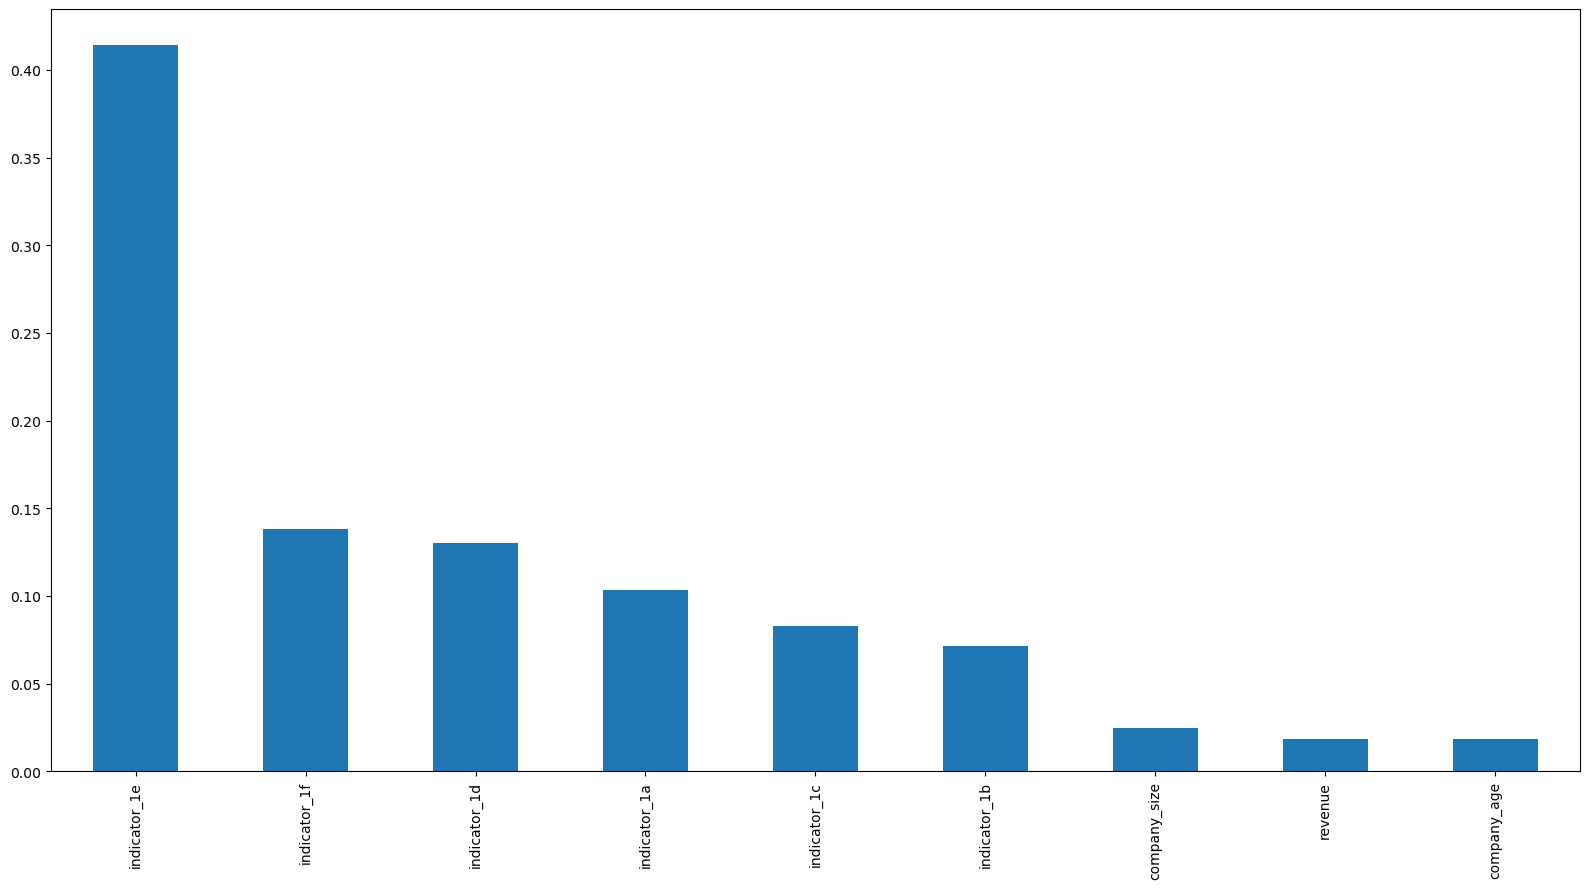

In [145]:
importances = clf_0.feature_importances_

# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, X_0.columns)

# Sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)

# Make the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=90, fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


In [156]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100,150,200,250,300],
    'max_depth': [None, 10,30,40,60],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Create a base model
rf_1 = RandomForestClassifier(random_state=42)

# Instantiate the grid search model
grid_search_1 = GridSearchCV(estimator = rf_1, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search_1.fit(X_1_train, y_1_train)

# Print the best parameters
print("\n\n Best Parameters for RandomForest Model on Data 1: ", grid_search_0.best_params_)


Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   4.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   4.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   4.7s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   5.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; tota

In [157]:
y_1_pred_gscv = grid_search_1.predict(X_1_valid)
accuracy_score(y_1_valid, y_1_pred_gscv)

0.984020618556701

In [162]:
del(clf_1)
clf_1 = RandomForestClassifier(n_estimators=200, random_state=42, bootstrap= False, max_depth= 30, min_samples_leaf= 1, min_samples_split= 2)
clf_1.fit(X_1_train, y_1_train)
# Make predictions on the validation set
y_1_pred = clf_1.predict(X_1_valid)

print(classification_report(y_1_valid, y_1_pred))
print("Accuracy = ", accuracy_score(y_1_pred, y_1_valid))

              precision    recall  f1-score   support

       False       0.98      1.00      0.99      3564
        True       0.98      0.82      0.89       316

    accuracy                           0.98      3880
   macro avg       0.98      0.91      0.94      3880
weighted avg       0.98      0.98      0.98      3880

Accuracy =  0.984020618556701


In [163]:
clf_1.feature_importances_

array([0.00908326, 0.01267748, 0.01256061, 0.06236852, 0.02636732,
       0.03559626, 0.04968135, 0.19292503, 0.08825832, 0.06498042,
       0.02741302, 0.03105084, 0.04546956, 0.26542463, 0.07614339])

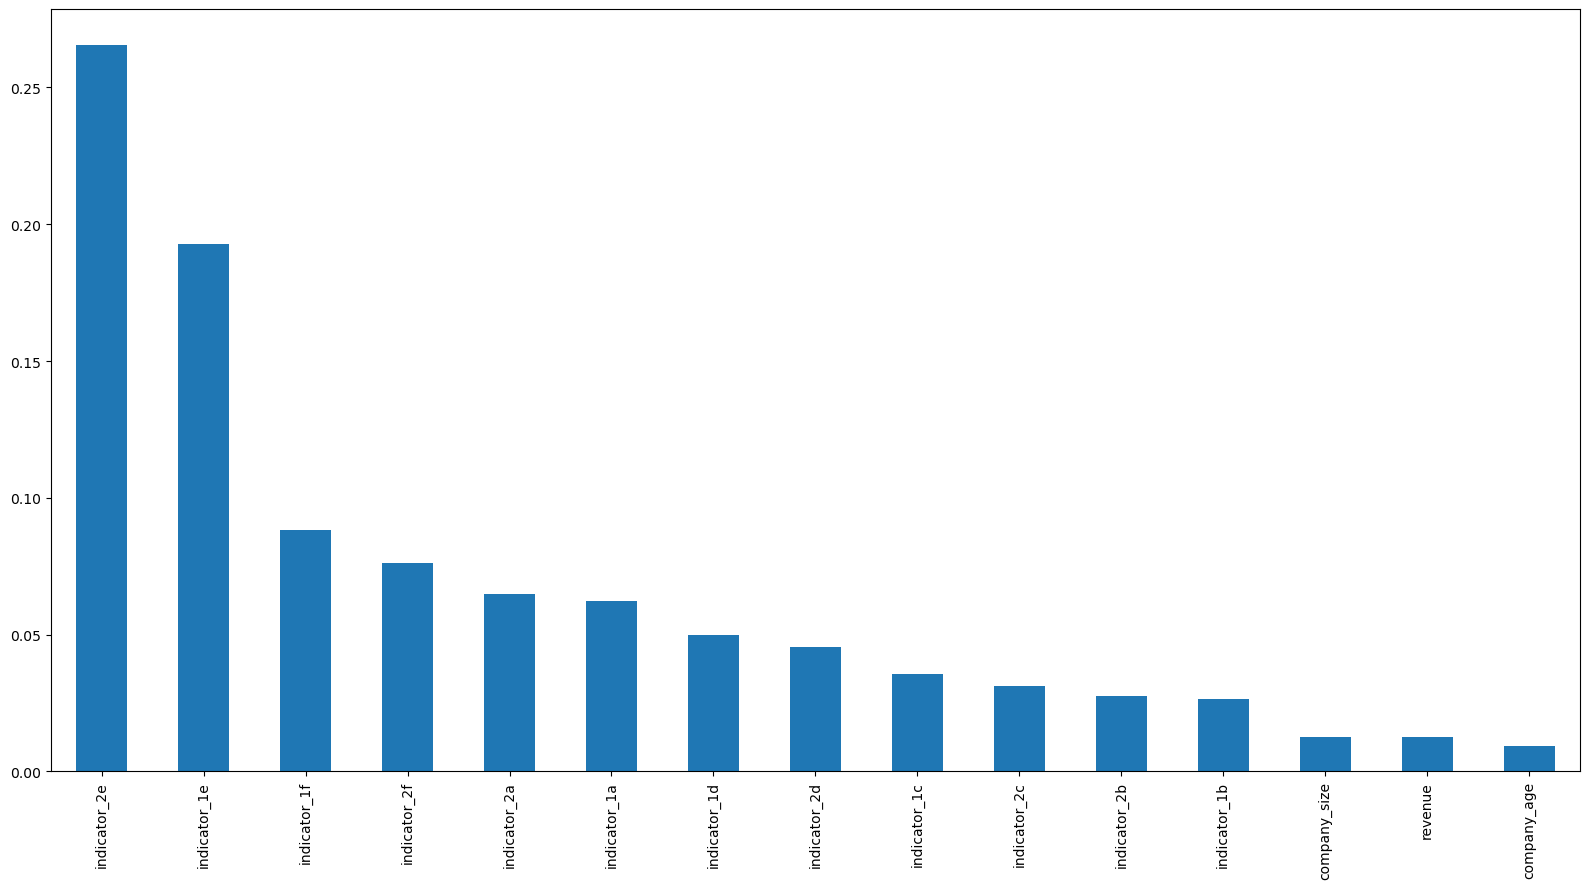

In [164]:
importances = clf_1.feature_importances_

# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, X_1.columns)

# Sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)

# Make the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=90, fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


In [38]:
import xgboost as xgb

xgb_clf_0 = xgb.XGBClassifier(objective = 'binary:logistic', random_state = 42)

xgb_clf_0.fit(X_0_train, y_0_train)

y_0_pred_xgb = xgb_clf_0.predict(X_0_valid)

accuracy_score(y_0_valid, y_0_pred_xgb)

0.9575617283950617

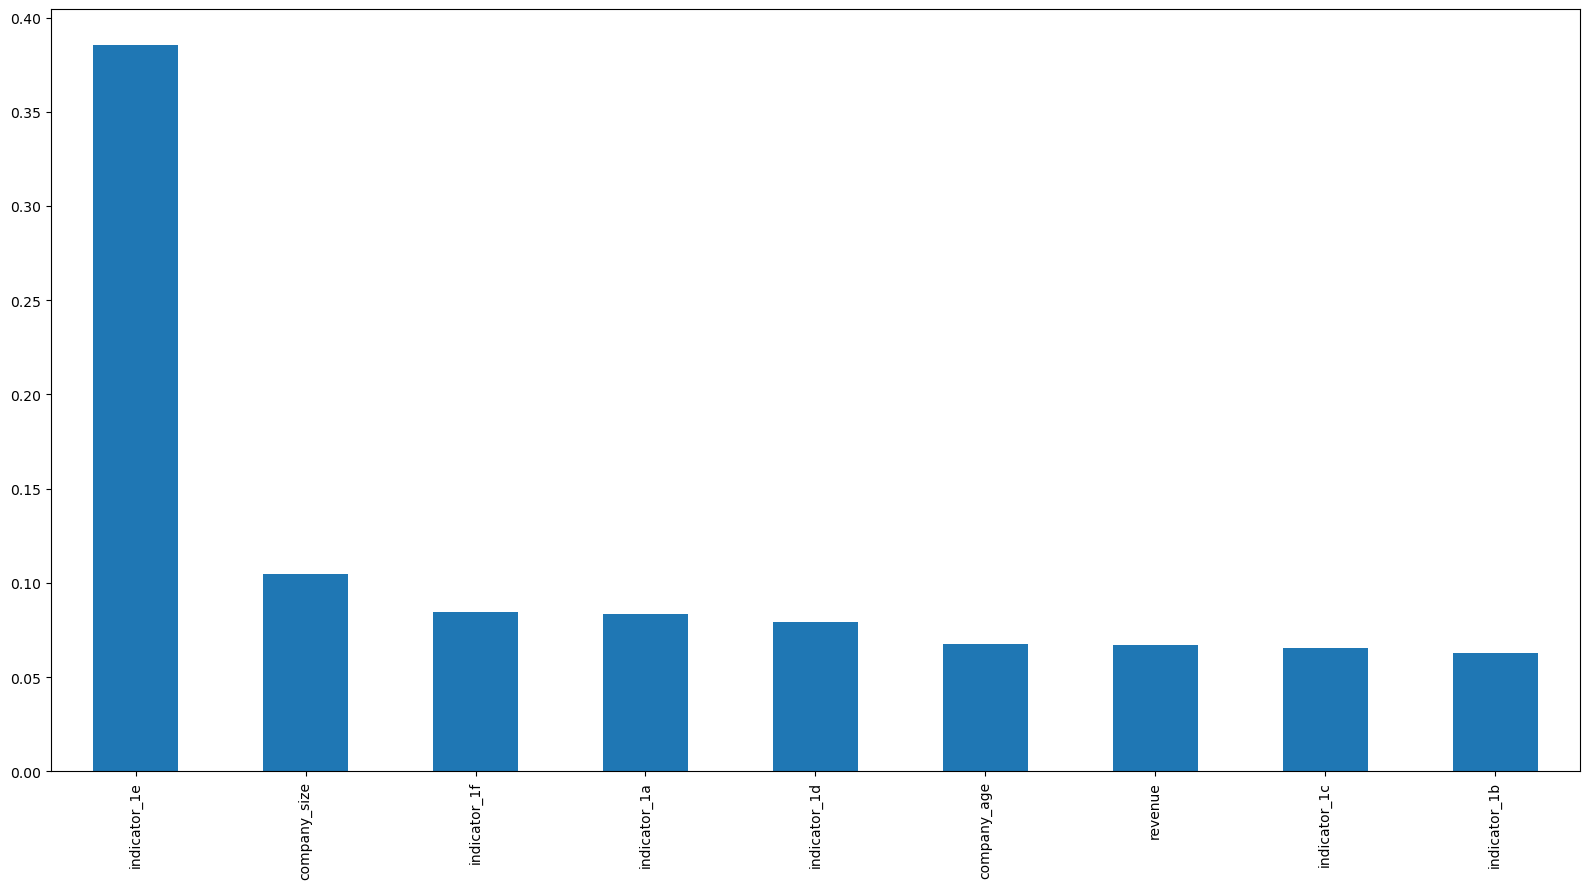

In [39]:
# Get feature importances
importances = xgb_clf_0.feature_importances_

# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, X_0.columns)

# Sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)

# Make the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=90, fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Bayesian Optimization route for hyperparameter tuning
from hyperopt import hp, tpe, Trials, fmin
import xgboost as xgb
from sklearn.model_selection import cross_val_score

# Define the search space for hyperparameters
space = {
    'learning_rate': hp.loguniform('learning_rate', -5, 0),
    'n_estimators': hp.choice('n_estimators', range(10, 500)),
    'max_depth': hp.choice('max_depth', range(5,50)),
    'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'gamma': hp.uniform('gamma', 0, 0.5),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'reg_alpha': hp.uniform('reg_alpha', 0, 1),
    'reg_lambda': hp.uniform('reg_lambda', 0, 1),
}

# Define the objective function
def objective(params):
    params = {
        'learning_rate': params['learning_rate'],
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'min_child_weight': params['min_child_weight'],
        'subsample': params['subsample'],
        'gamma': params['gamma'],
        'colsample_bytree': params['colsample_bytree'],
        'reg_alpha': params['reg_alpha'],
        'reg_lambda': params['reg_lambda']
    }
    
    clf = xgb.XGBClassifier(**params)
    score = cross_val_score(clf, X_1_train, y_1_train, scoring='accuracy', cv=3).mean()
    return -score

# Run the algorithm
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=Trials())

print(best)


In [34]:
import xgboost as xgb
xgb_clf_1 = xgb.XGBClassifier(objective = 'binary:logistic', random_state = 42)

xgb_clf_1.fit(X_1_train, y_1_train)

y_1_pred_xgb = xgb_clf_1.predict(X_1_valid)

accuracy_score(y_1_valid, y_1_pred_xgb)

0.98659793814433

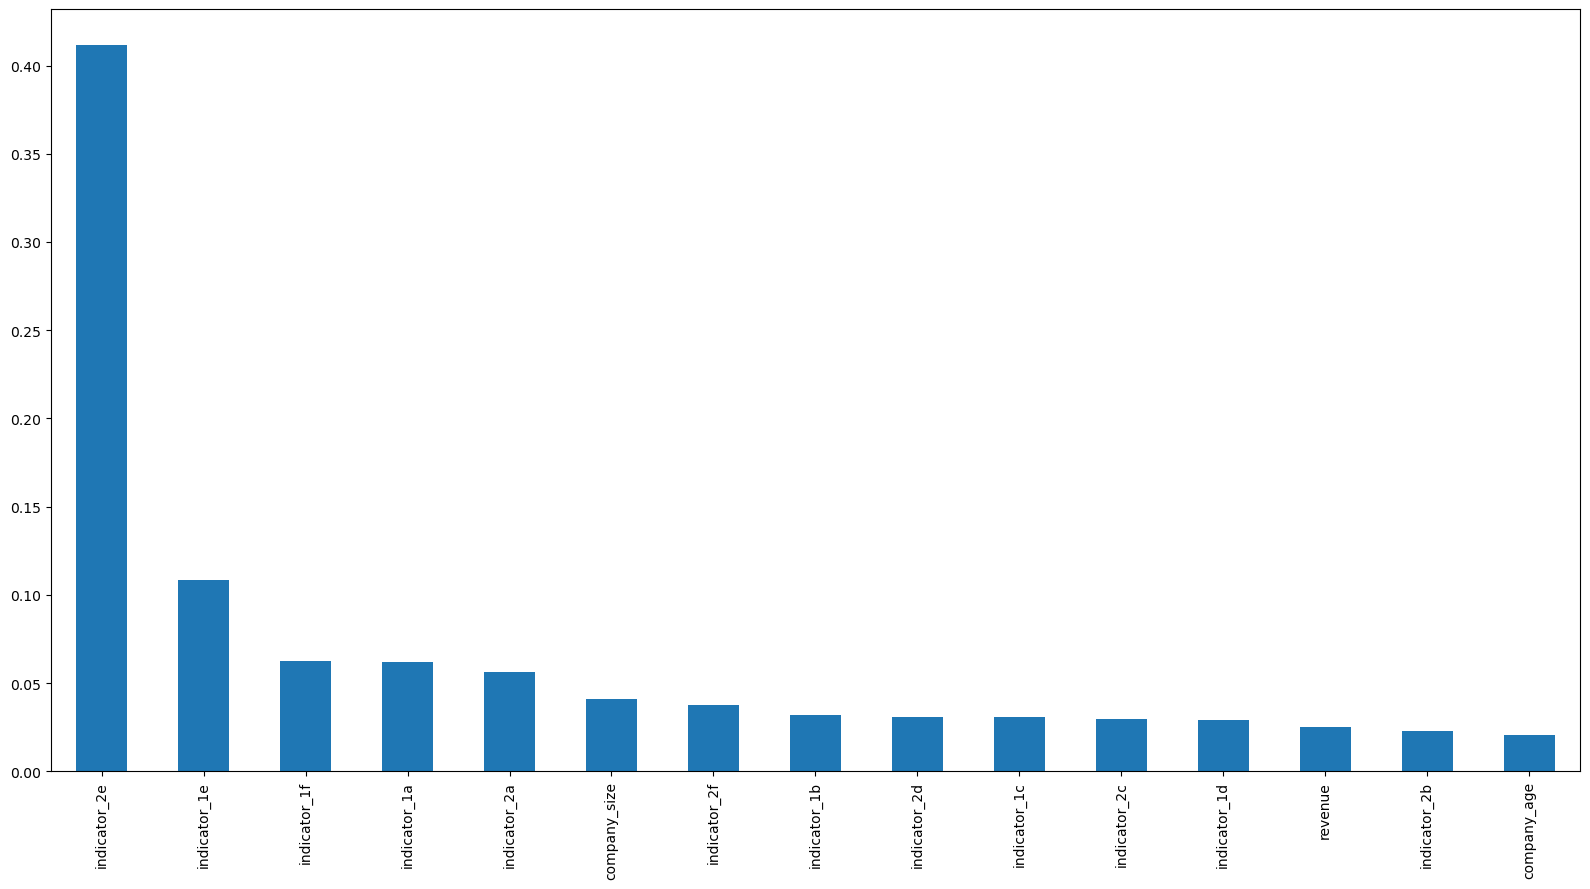

In [35]:
# Get feature importances
importances = xgb_clf_1.feature_importances_

# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, X_1.columns)

# Sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)

# Make the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=90, fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


In [195]:
# Bayesian Optimization route for hyperparameter tuning
# Define the search space for hyperparameters
space_1 = {
    'learning_rate': hp.loguniform('learning_rate', -5, 0),
    'n_estimators': hp.choice('n_estimators', range(100, 1000)),
    'max_depth': hp.choice('max_depth', range(30,90)),
    'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'gamma': hp.uniform('gamma', 0, 0.5),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'reg_alpha': hp.uniform('reg_alpha', 0, 1),
    'reg_lambda': hp.uniform('reg_lambda', 0, 1),
}

# Define the objective function
def objective_1(params):
    params = {
        'learning_rate': params['learning_rate'],
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'min_child_weight': params['min_child_weight'],
        'subsample': params['subsample'],
        'gamma': params['gamma'],
        'colsample_bytree': params['colsample_bytree'],
        'reg_alpha': params['reg_alpha'],
        'reg_lambda': params['reg_lambda']
    }
    
    clf = xgb.XGBClassifier(**params)
    score = cross_val_score(clf, X_1_train, y_1_train, scoring='accuracy', cv=5).mean()
    return -score

# Run the algorithm
best = fmin(fn=objective_1,
            space=space_1,
            algo=tpe.suggest,
            max_evals=100,
            trials=Trials())

print(best)


100%|██████████| 100/100 [41:13<00:00, 24.74s/trial, best loss: -0.9837628865979381]  
{'colsample_bytree': 0.6089016834907512, 'gamma': 0.015431641376504157, 'learning_rate': 0.10335233658951283, 'max_depth': 0, 'min_child_weight': 1.0, 'n_estimators': 360, 'reg_alpha': 0.9855714607440169, 'reg_lambda': 0.9784918452904364, 'subsample': 0.7257285720773465}


In [171]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers.legacy import Adam

# Initialize a Sequential model
model_0 = Sequential()

# Add an input layer and the first hidden layer
model_0.add(Dense(units=32, activation='relu', input_shape=(X_0_train.shape[1],)))

# Add a Dropout layer to prevent overfitting
model_0.add(Dropout(0.2))

# Add a second hidden layer
model_0.add(Dense(units=16, activation='relu'))

# Add another Dropout layer
model_0.add(Dropout(0.2))

# Add third hidden layer
model_0.add(Dense(units=16, activation='relu'))

# Add another Dropout layer
model_0.add(Dropout(0.2))

# Add fourth hidden layer
model_0.add(Dense(units=16, activation='relu'))

# Add another Dropout layer
model_0.add(Dropout(0.2))

# Add an output layer
model_0.add(Dense(units=1, activation='sigmoid'))


model_0.compile(optimizer=Adam(), loss='', metrics=['accuracy'])

history = model_0.fit(X_0_train, y_0_train, validation_data=(X_0_valid, y_0_valid), epochs = 10, batch_size = 100)

y_0_pred_dnn = model_0.predict(X_0_valid)
y_0_pred_dnn = (y_0_pred_dnn>0.5)

Epoch 1/10
130/130 [==============================] - 3s 15ms/step - loss: 1.3205 - accuracy: 0.7803 - val_loss: 0.3544 - val_accuracy: 0.9037
Epoch 2/10
130/130 [==============================] - 2s 12ms/step - loss: 0.4650 - accuracy: 0.8663 - val_loss: 0.4082 - val_accuracy: 0.9037
Epoch 3/10
130/130 [==============================] - 2s 12ms/step - loss: 0.3821 - accuracy: 0.8985 - val_loss: 0.4179 - val_accuracy: 0.9037
Epoch 4/10
130/130 [==============================] - 2s 12ms/step - loss: 0.3632 - accuracy: 0.9015 - val_loss: 0.3916 - val_accuracy: 0.9037
Epoch 5/10
130/130 [==============================] - 2s 12ms/step - loss: 0.3530 - accuracy: 0.9028 - val_loss: 0.4341 - val_accuracy: 0.9037
Epoch 6/10
130/130 [==============================] - 2s 12ms/step - loss: 0.3409 - accuracy: 0.9032 - val_loss: 0.4281 - val_accuracy: 0.9037
Epoch 7/10
130/130 [==============================] - 2s 12ms/step - loss: 0.3404 - accuracy: 0.9032 - val_loss: 0.3832 - val_accuracy: 0.9037

In [172]:
loss, accuracy = model_0.evaluate(X_0_valid, y_0_valid)
print('Validation Accuracy: %.2f' % (accuracy*100))

102/102 [==============================] - 1s 6ms/step - loss: 0.3623 - accuracy: 0.9037
Validation Accuracy: 90.37


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Initialize a Sequential model
model_1 = Sequential()

# Add an input layer and the first hidden layer
model_1.add(Dense(units=32, activation='relu', input_shape=(X_1_train.shape[1],)))

# Add a Dropout layer to prevent overfitting
model_1.add(Dropout(0.2))

# Add a second hidden layer
model_1.add(Dense(units=16, activation='relu'))

# Add another Dropout layer
model_1.add(Dropout(0.2))

# Add an output layer
model_1.add(Dense(units=1, activation='sigmoid'))


model_1.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_1_train, y_1_train, validation_data=(X_1_valid, y_1_valid), epochs = 100, batch_size = 32)

y_1_pred_dnn = model_1.predict(X_1_valid)
y_1_pred_dnn = (y_1_pred_dnn>0.5)

Epoch 1/100


2023-06-04 22:17:58.030482: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


890/890 [==============================] - 33s 35ms/step - loss: 0.5346 - accuracy: 0.8922 - val_loss: 0.3420 - val_accuracy: 0.9136
Epoch 2/100
890/890 [==============================] - 7s 8ms/step - loss: 0.3091 - accuracy: 0.9114 - val_loss: 0.3013 - val_accuracy: 0.9136
Epoch 3/100
890/890 [==============================] - 7s 8ms/step - loss: 0.3013 - accuracy: 0.9116 - val_loss: 0.3134 - val_accuracy: 0.9136
Epoch 4/100
890/890 [==============================] - 7s 8ms/step - loss: 0.2966 - accuracy: 0.9117 - val_loss: 0.3200 - val_accuracy: 0.9164
Epoch 5/100
890/890 [==============================] - 7s 8ms/step - loss: 0.2582 - accuracy: 0.9198 - val_loss: 0.2224 - val_accuracy: 0.9347
Epoch 6/100
890/890 [==============================] - 7s 8ms/step - loss: 0.2108 - accuracy: 0.9343 - val_loss: 0.1811 - val_accuracy: 0.9456
Epoch 7/100
890/890 [==============================] - 7s 8ms/step - loss: 0.1926 - accuracy: 0.9401 - val_loss: 0.1772 - val_accuracy: 0.9476
Epoch 8/1

In [ ]:
loss, accuracy = model_1.evaluate(X_1_valid, y_1_valid)
print('Validation Accuracy: %.2f' % (accuracy*100))

223/223 [==============================] - 1s 5ms/step - loss: 0.1283 - accuracy: 0.9531
Validation Accuracy: 95.31


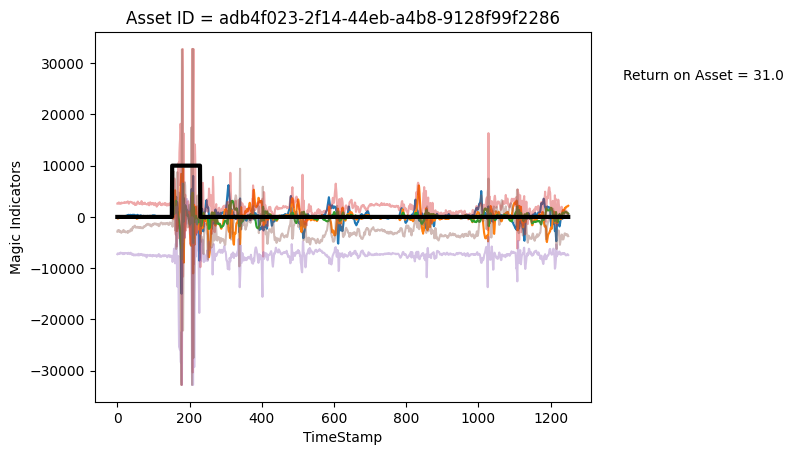

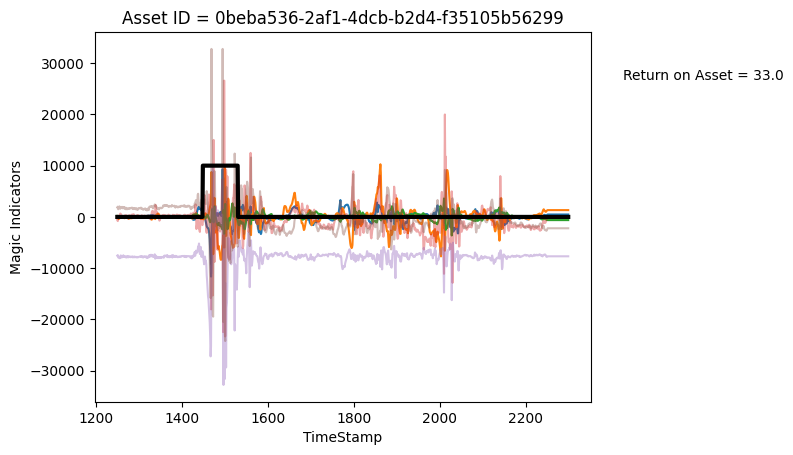

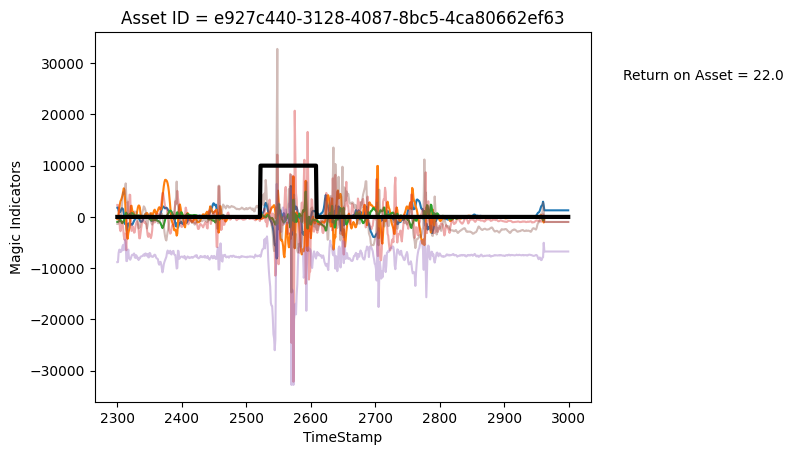

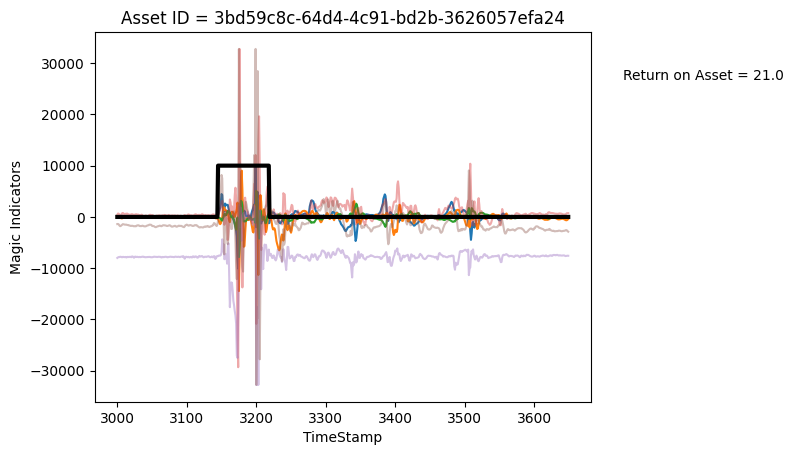

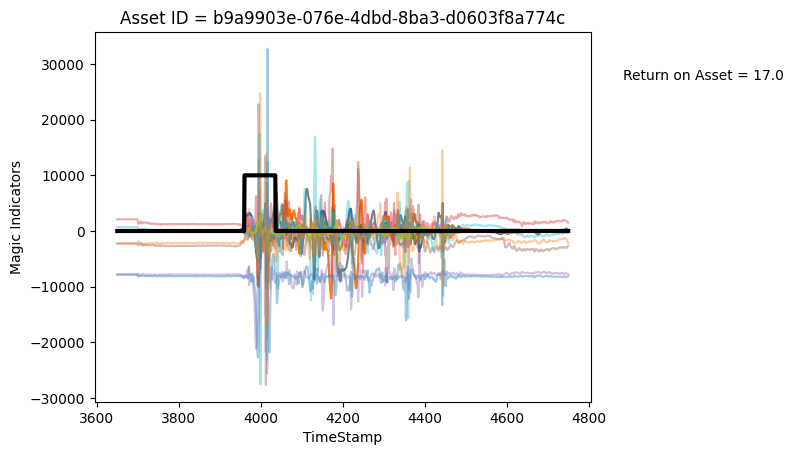

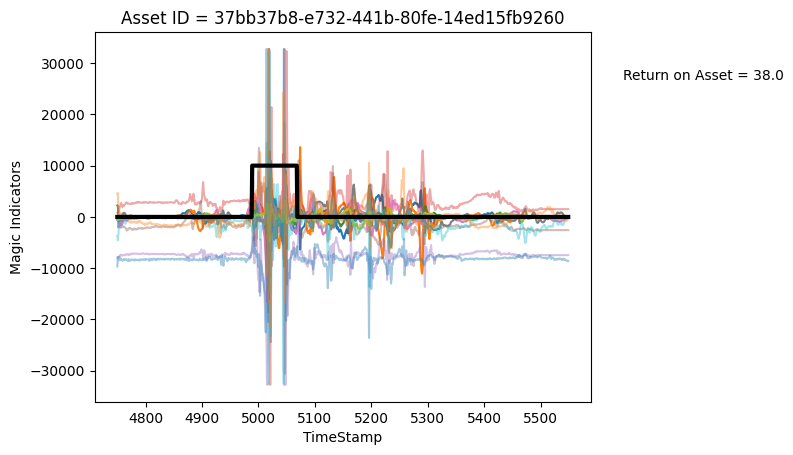

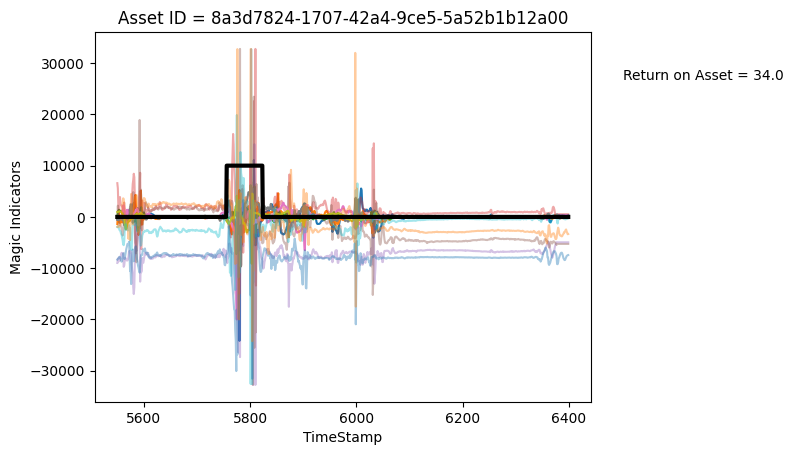

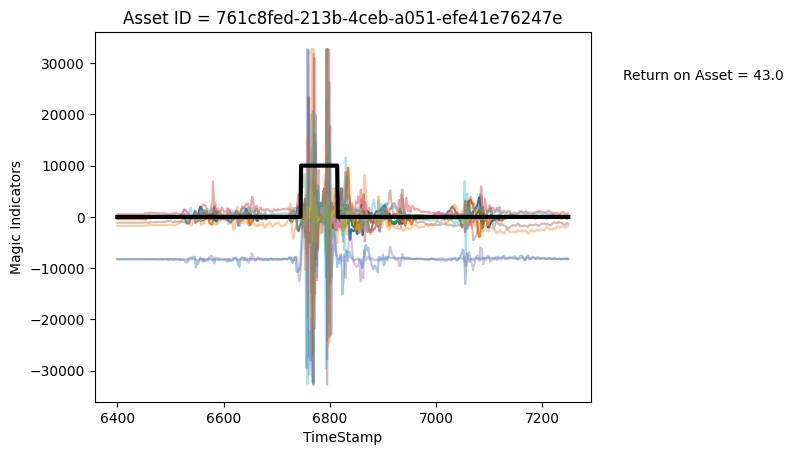

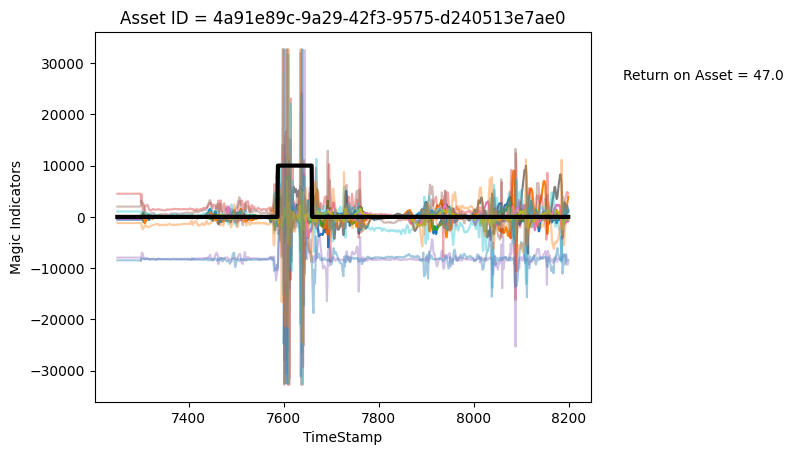

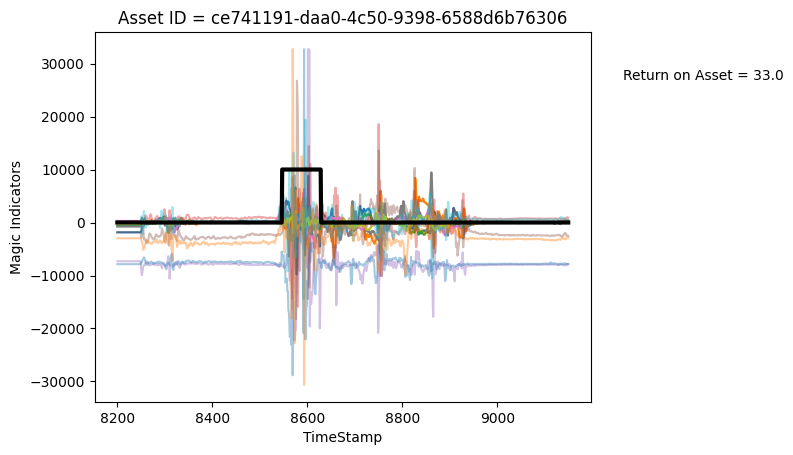

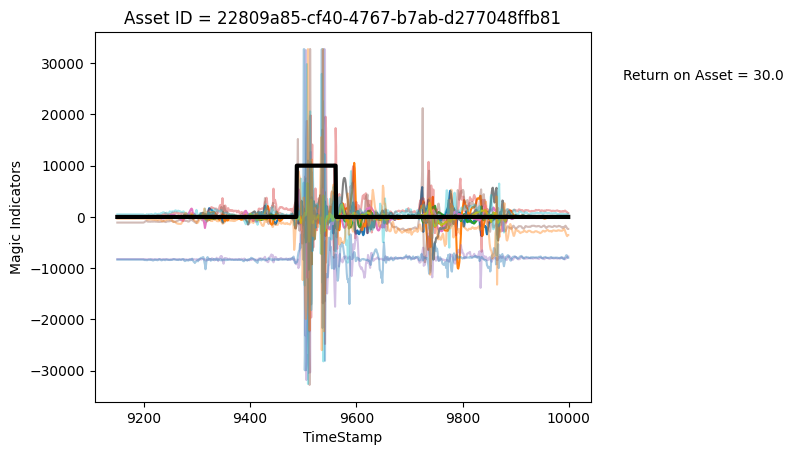

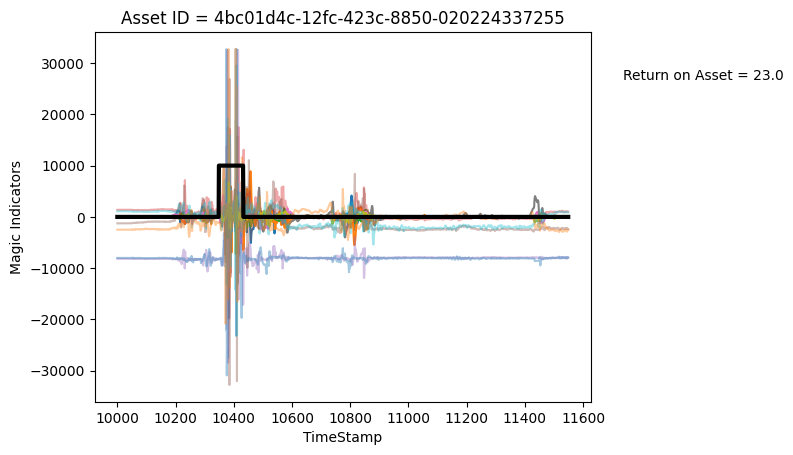

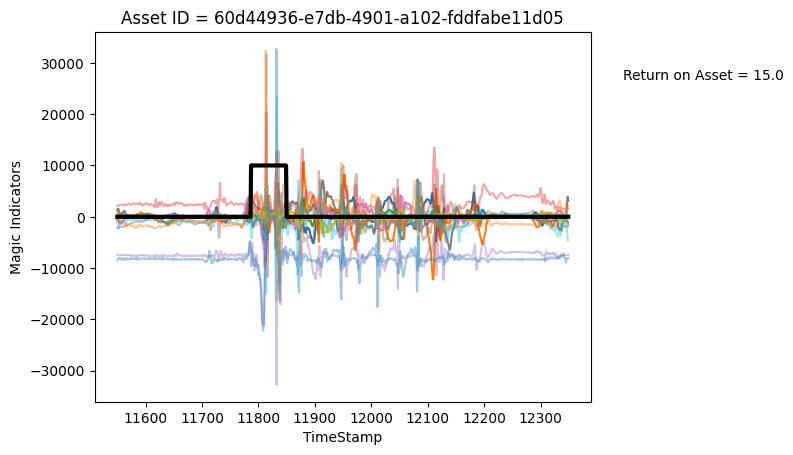

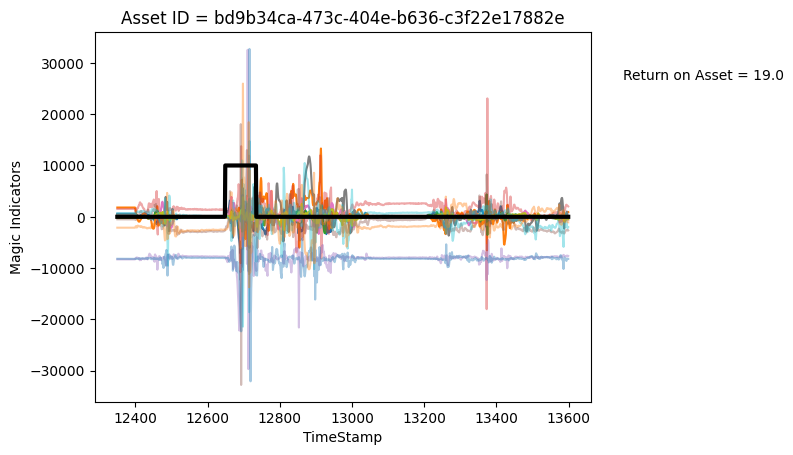

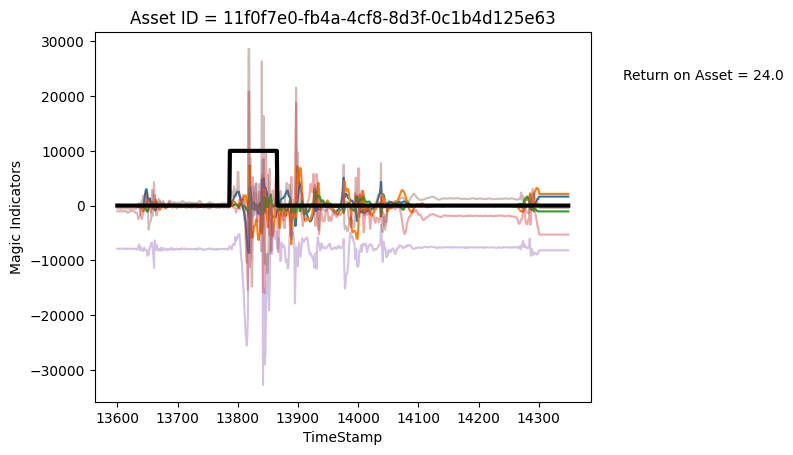

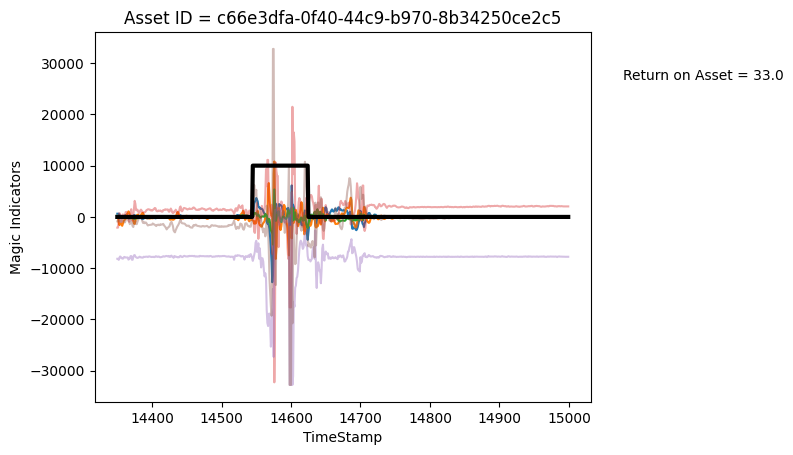

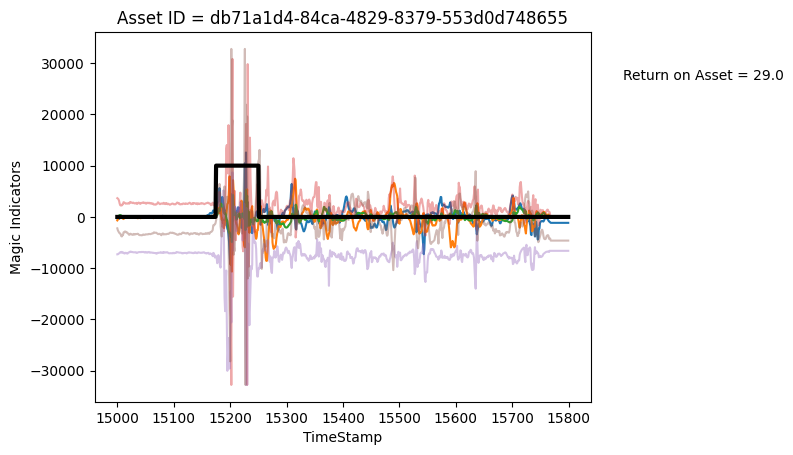

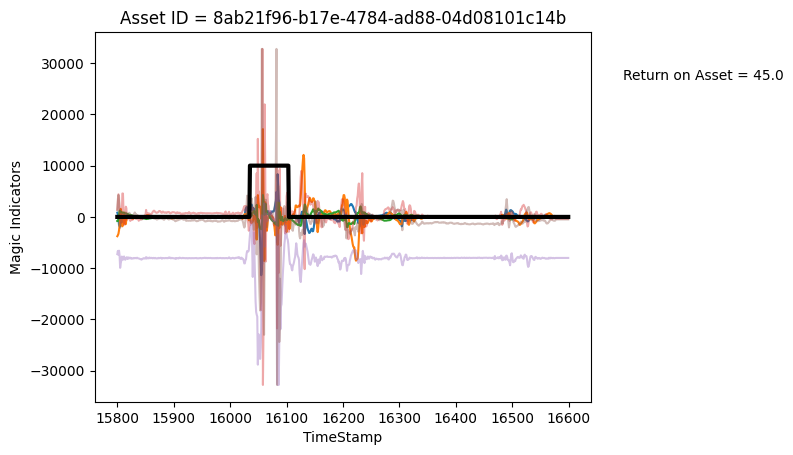

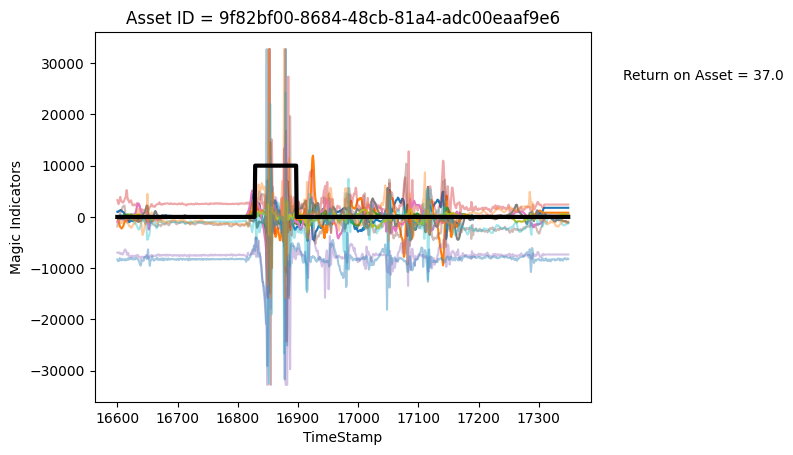

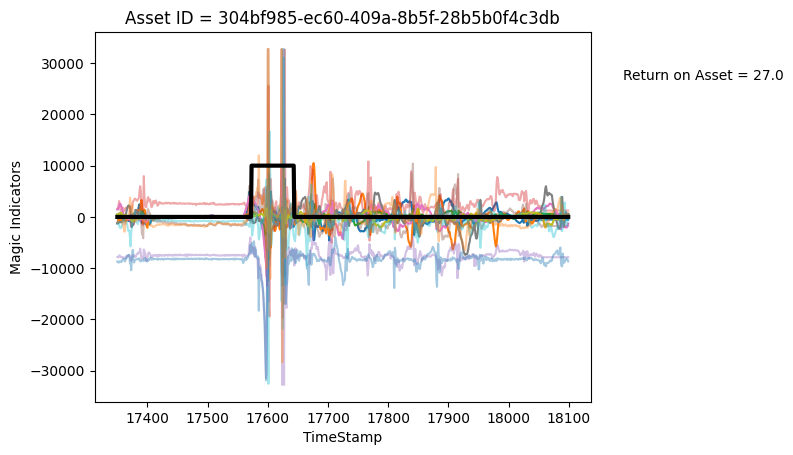

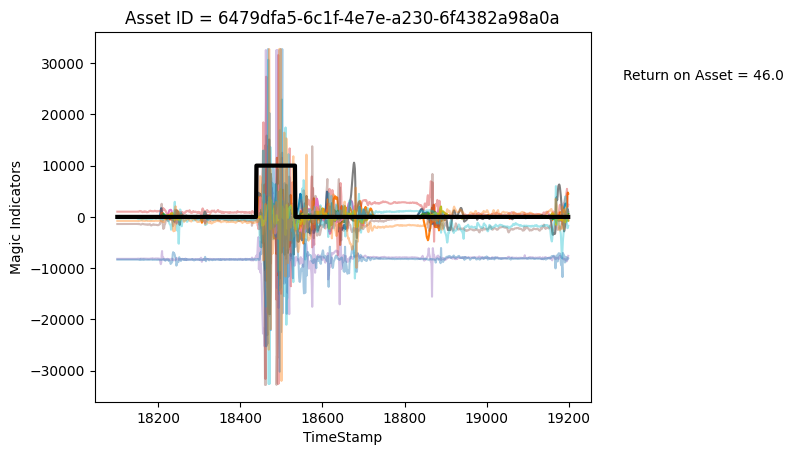

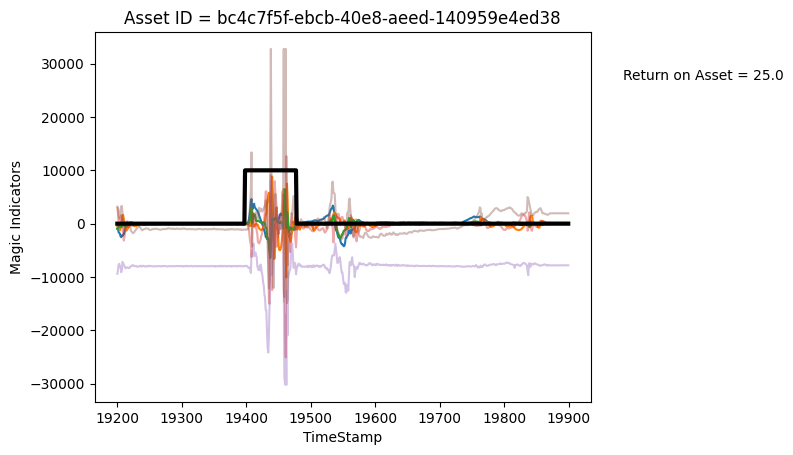

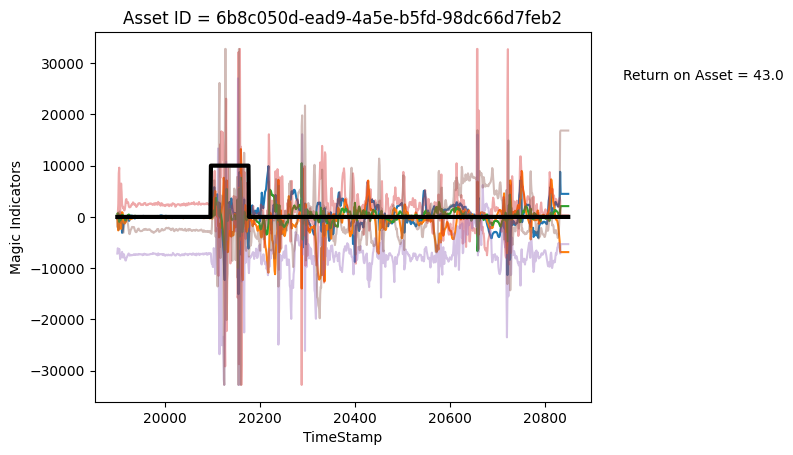

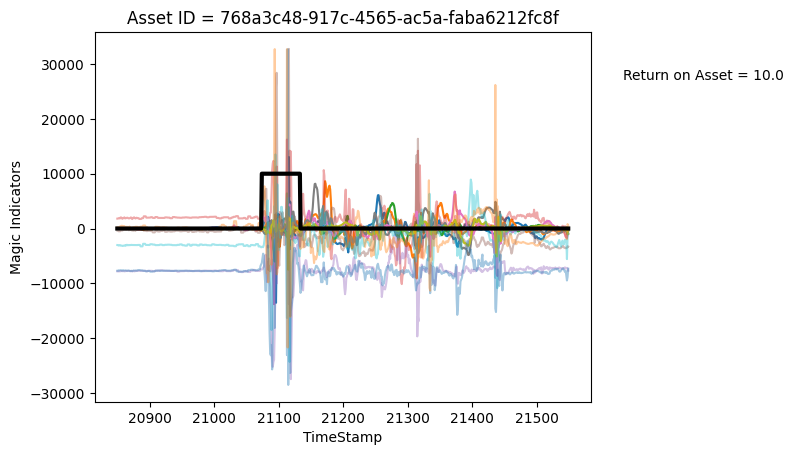

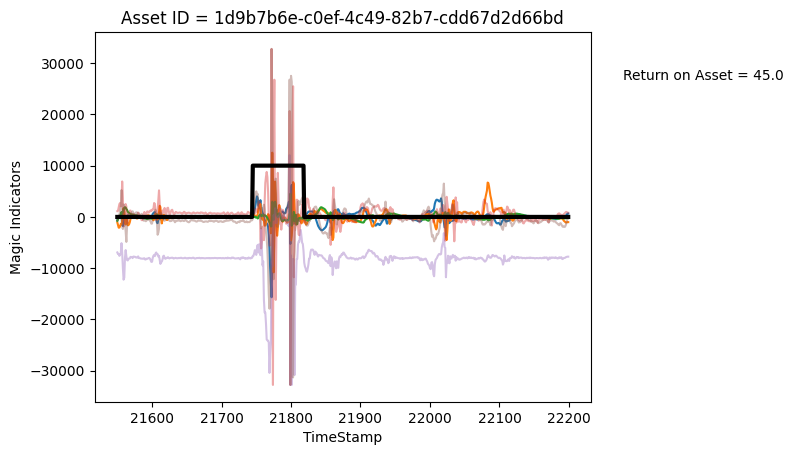

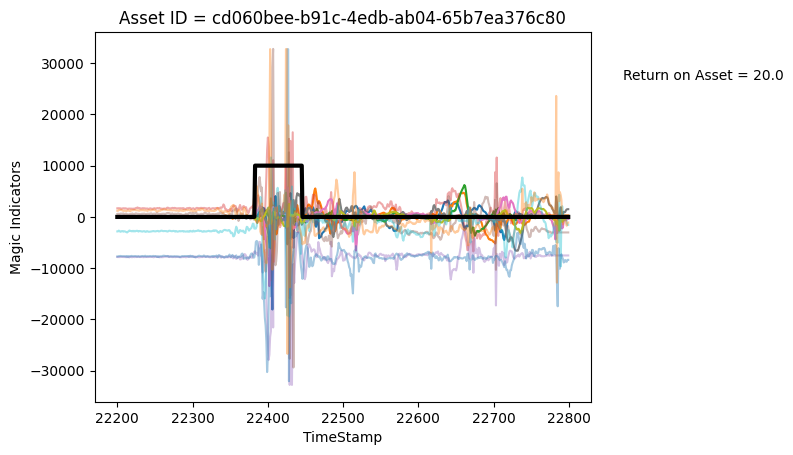

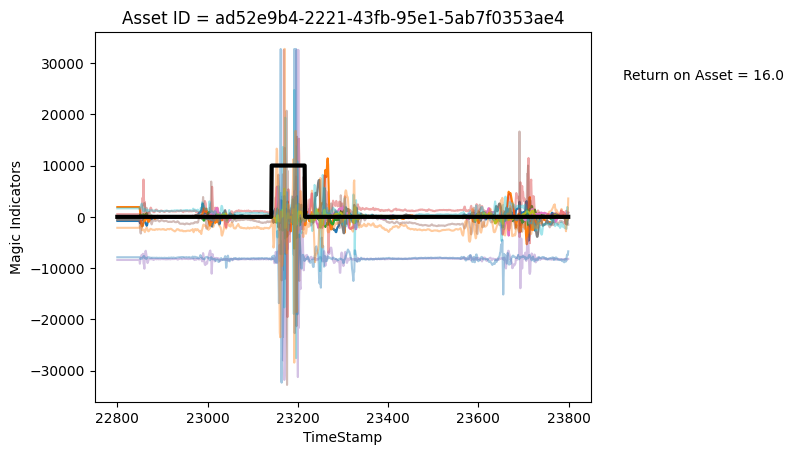

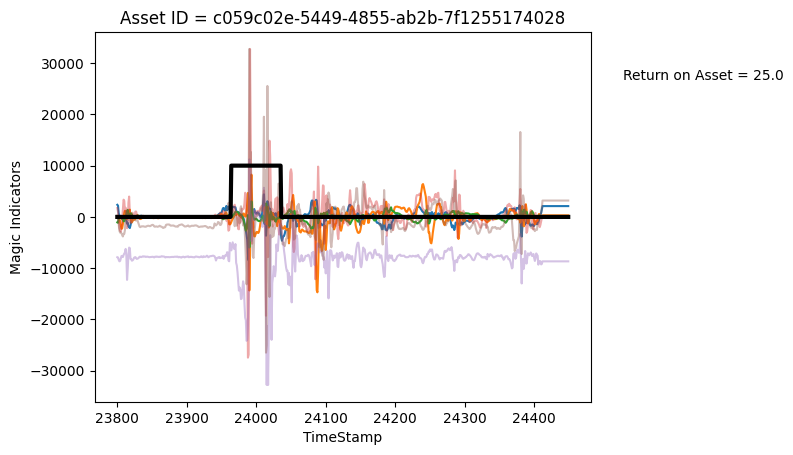

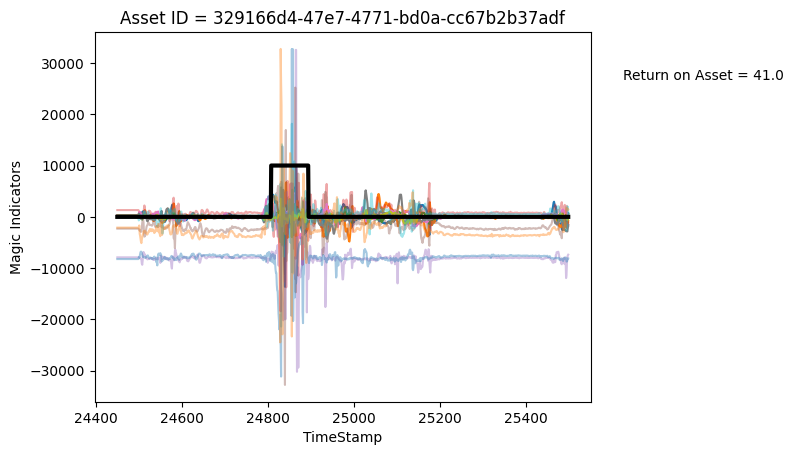

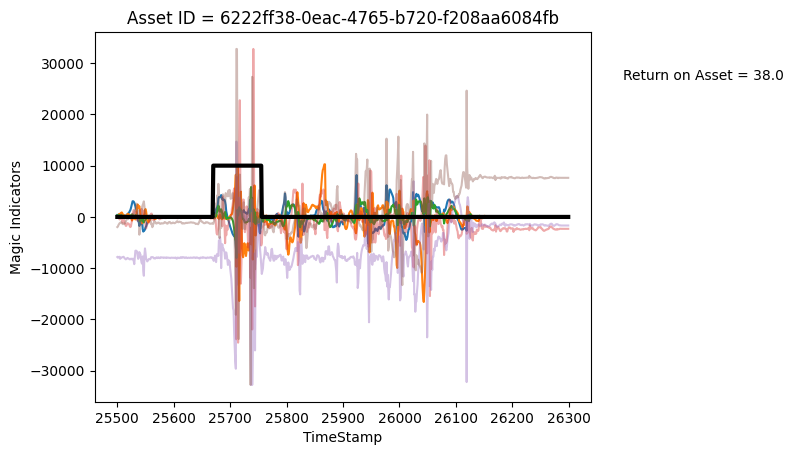

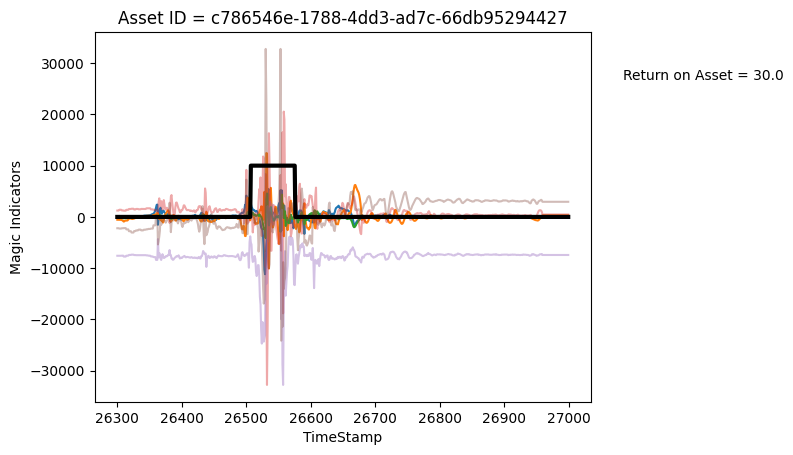

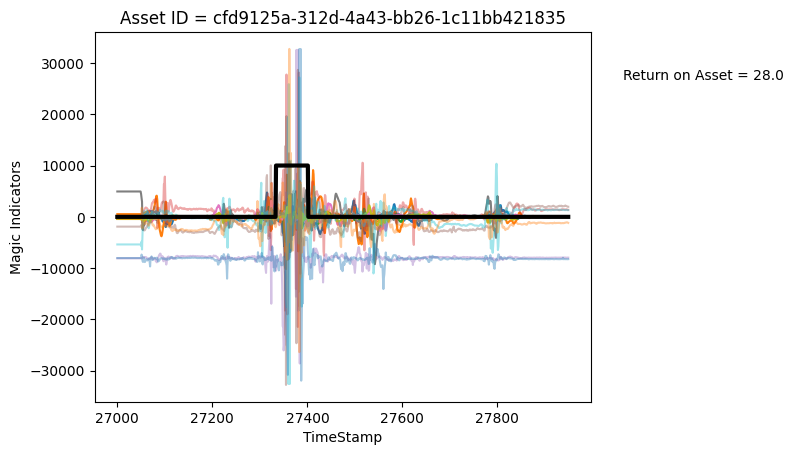

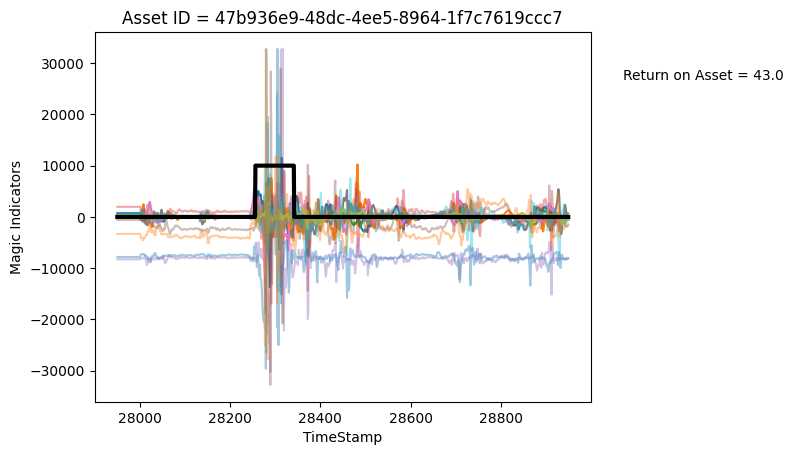

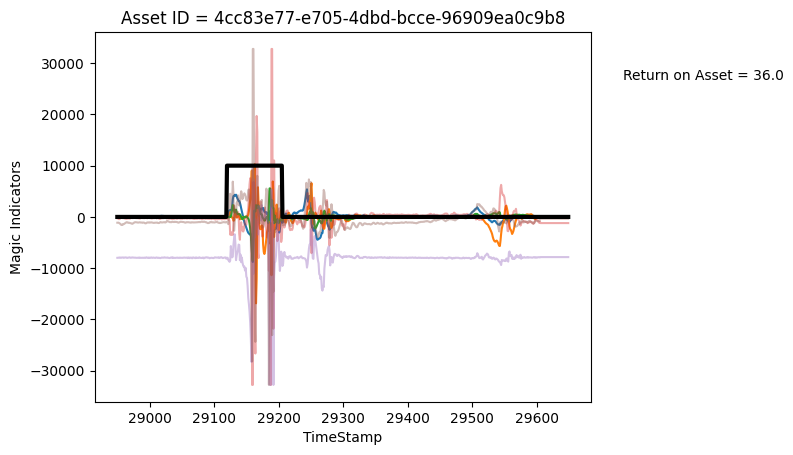

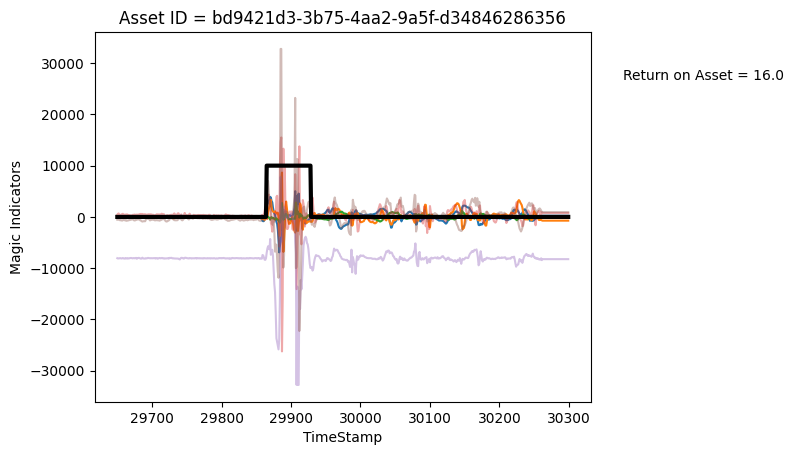

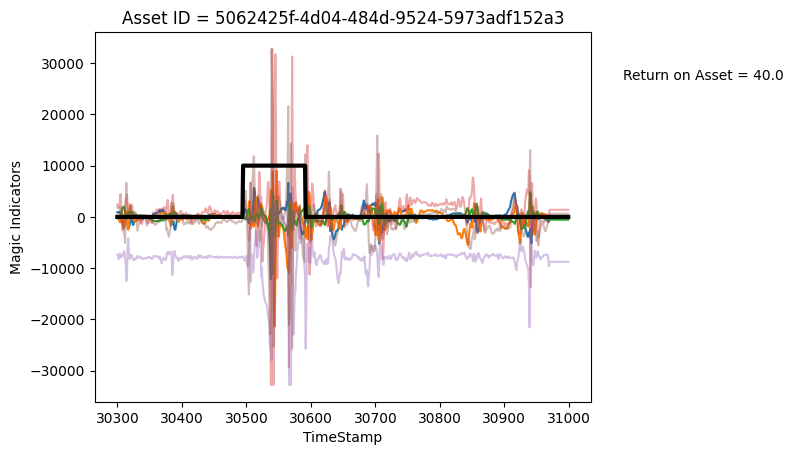

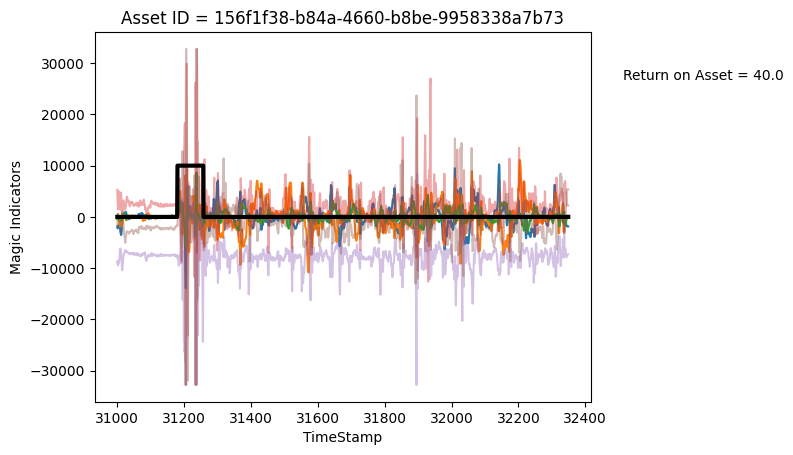

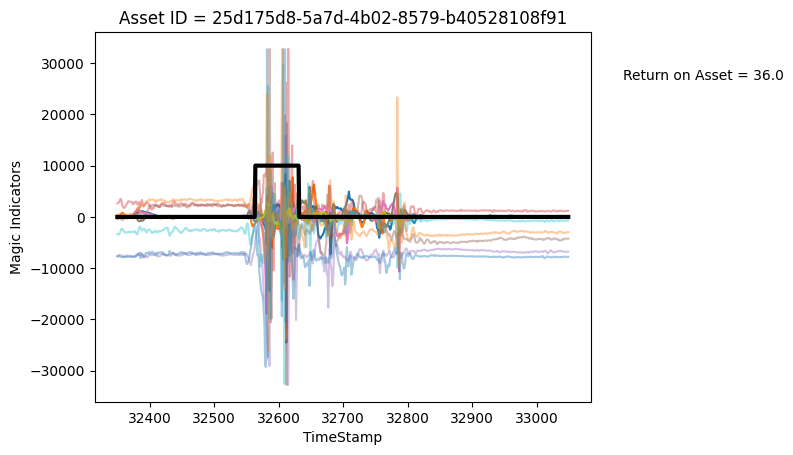

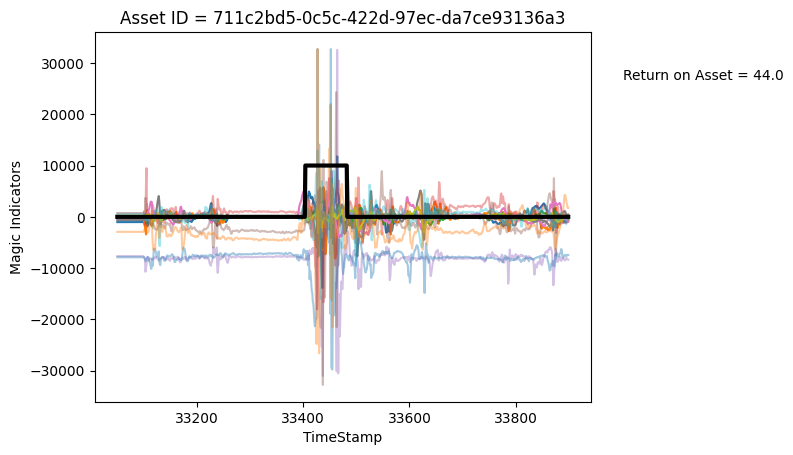

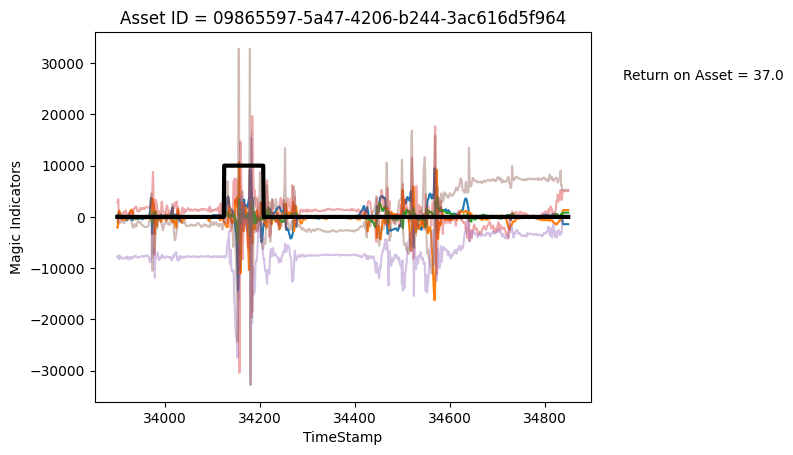

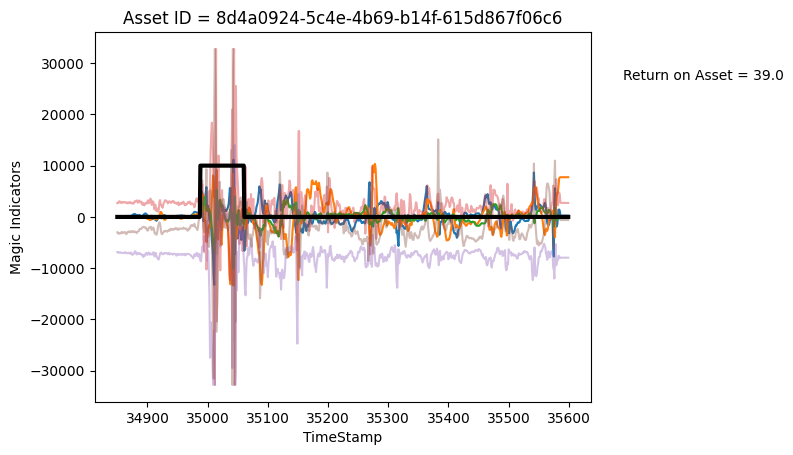

In [5]:
# for i in df.asset_id.unique():
#   plt.plot(df[df['asset_id']==i]['indicator_1a'])
#   plt.plot(df[df['asset_id']==i]['indicator_1b'])
#   plt.plot(df[df['asset_id']==i]['indicator_1c'])
#   plt.plot(df[df['asset_id']==i]['indicator_1d'],alpha=0.4)
#   plt.plot(df[df['asset_id']==i]['indicator_1e'],alpha=0.4)
#   plt.plot(df[df['asset_id']==i]['indicator_1f'],alpha=0.4)
#   plt.plot(df[df['asset_id']==i]['indicator_2a'])
#   plt.plot(df[df['asset_id']==i]['indicator_2b'])
#   plt.plot(df[df['asset_id']==i]['indicator_2c'])
#   plt.plot(df[df['asset_id']==i]['indicator_2d'],alpha=0.4)
#   plt.plot(df[df['asset_id']==i]['indicator_2e'],alpha=0.4)
#   plt.plot(df[df['asset_id']==i]['indicator_2f'],alpha=0.4)
#   plt.plot(df[df['asset_id']==i]['roi_label']*10000,color='k',lw=3)
#   plt.ylabel('Magic Indicators')
#   plt.xlabel('TimeStamp')
#   plt.figtext(.95,0.78, s="Return on Asset = " + str(df[df['asset_id']==i]['return_on_asset'].mean()))
#   plt.title('Asset ID = ' + i)
#   plt.show();

### Run Some Models and Predict Return on Asset based on the Magic Indicators.

In [36]:
class MainModel():
    def __init__(self, model1, model2):
        self.model1 = model1
        self.model2 = model2
    
    def fit(self, X, y):
        X_0 = X[X['magicIndicators2'] == 0].copy()
        y_0 = y[y.index.isin(X_0.index)].copy()
        X_0.drop(columns=['asset_id', 'indicator_2a', 'indicator_2b', 'indicator_2c', 'indicator_2d', 'indicator_2e', 'indicator_2f', 'magicIndicators2'], inplace=True)

        X_1 = X[X['magicIndicators2'] == 1].copy()
        y_1 = y[y.index.isin(X_1.index)].copy()
        X_1.drop(columns=['asset_id', 'magicIndicators2'], inplace=True)
        
        self.model1.fit(X_0, y_0)
        self.model2.fit(X_1, y_1)
    
    def predict(self, X):

        y_pred = pd.DataFrame()

        for asset in list(X.asset_id.unique()):
            # Predict per asset
            assetDF = X[X['asset_id'] == asset].copy()
            assetDF.drop(columns=['asset_id'], inplace=True)

            if assetDF.magicIndicators2[0] == 0:
                assetDF.drop(columns=['indicator_2a', 'indicator_2b', 'indicator_2c', 'indicator_2d', 'indicator_2e', 'indicator_2f', 'magicIndicators2'], inplace=True)
                asset_pred = self.model1.predict(assetDF).astype(int)
            else:
                assetDF.drop(columns=['magicIndicators2'], inplace=True)
                asset_pred = self.model2.predict(assetDF)

            asset_pred_df = pd.DataFrame({'preds': asset_pred}, index=assetDF.index)
            asset_pred_df['asset_id'] = asset

            y_pred = pd.concat([y_pred, asset_pred_df], axis=0) 


        # X_0 = X[X['magicIndicators2'] == 0].copy()
        # X_0.drop(columns=['indicator_2a', 'indicator_2b', 'indicator_2c', 'indicator_2d', 'indicator_2e', 'indicator_2f', 'magicIndicators2'], inplace=True)

        # X_1 = X[X['magicIndicators2'] == 1].copy()
        # X_1.drop(columns=['magicIndicators2'], inplace=True)

        # y_pred_0 = self.model1.predict(X_0).astype(int)
        # y_pred_1 = self.model2.predict(X_1)

        # Xy_0 = pd.DataFrame({'preds': y_pred_0}, index=X_0.index)
        # Xy_1 = pd.DataFrame({'preds': y_pred_1}, index=X_1.index)

        # y_pred = pd.concat([Xy_0, Xy_1], axis=0).reindex(X.index)
        
        return y_pred


In [37]:
features_train = ['asset_id', 'company_age', 'company_size', 'revenue' ,'indicator_1a', 'indicator_1b', 'indicator_1c', 'indicator_1d', 'indicator_1e', 
                    'indicator_1f', 'indicator_2a', 'indicator_2b', 'indicator_2c', 'indicator_2d', 
                    'indicator_2e', 'indicator_2f', 'magicIndicators2']

data_train = df_scaled[features_train].fillna(0).copy()
label_train = df_scaled['roi']

X_train, X_valid, y_train, y_valid = train_test_split(data_train, label_train, test_size=0.2, random_state=42)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Create instance of MainModel with Logistic Regression and Decision Tree models
mainModel = MainModel(clf_0, xgb_clf_1)


In [39]:

# Fit the MainModel
mainModel.fit(X_train, y_train)



In [40]:
# Predict using the MainModel
y_pred = mainModel.predict(X_valid)



In [41]:
y_pred = y_pred.reindex(y_valid.index)
y_pred['preds']

timestamp
2023-03-25 13:26:17.940    0
2023-03-25 16:05:54.080    0
2023-03-24 18:38:33.440    0
2023-02-27 19:30:51.540    0
2023-02-24 19:41:10.540    0
                          ..
2023-03-24 18:32:26.700    0
2023-03-25 16:16:55.020    0
2023-03-25 13:28:57.160    0
2023-03-25 13:26:23.540    0
2023-03-24 18:37:56.940    0
Name: preds, Length: 7120, dtype: int64

In [42]:
y_valid.astype(int)

timestamp
2023-03-25 13:26:17.940    0
2023-03-25 16:05:54.080    0
2023-03-24 18:38:33.440    0
2023-02-27 19:30:51.540    0
2023-02-24 19:41:10.540    0
                          ..
2023-03-24 18:32:26.700    0
2023-03-25 16:16:55.020    0
2023-03-25 13:28:57.160    0
2023-03-25 13:26:23.540    0
2023-03-24 18:37:56.940    0
Name: roi, Length: 7120, dtype: int64

In [43]:
accuracy_score(y_valid.astype(int), y_pred['preds'])

0.975

In [44]:
test_df = pd.read_csv('test.csv', parse_dates=True)
test_df.head()

timestamp                          asset_id  indicator_2a  \
0         2023-02-27T19:50:13  625efa066c0c4b0db60fdde37ee69dd1        -535.0   
1  2023-02-27T19:50:13.020000  625efa066c0c4b0db60fdde37ee69dd1        -535.0   
2  2023-02-27T19:50:13.040000  625efa066c0c4b0db60fdde37ee69dd1        -535.0   
3  2023-02-27T19:50:13.060000  625efa066c0c4b0db60fdde37ee69dd1        -535.0   
4  2023-02-27T19:50:13.080000  625efa066c0c4b0db60fdde37ee69dd1        -535.0   

   indicator_2b  indicator_2c  indicator_2d  indicator_2e  indicator_2f  \
0         112.0         -61.0       -1606.0       -8119.0        -577.0   
1         112.0         -61.0       -1606.0       -8119.0        -577.0   
2         112.0         -61.0       -1606.0       -8119.0        -577.0   
3         112.0         -61.0       -1606.0       -8119.0        -577.0   
4         112.0         -61.0       -1606.0       -8119.0        -577.0   

   company_age  company_size  revenue  indicator_1a  indicator_1b  \
0           15            57      180           -80            77   
1           15            57      180           -80            77   
2           15            57      180           -80            77   
3           15            57      180           -80            77   
4           15            57      180           -80            77   

   indicator_1c  indicator_1d  indicator_1e  indicator_1f  
0             1          1214         -8221          -955  
1             1          1214         -8221          -955  
2             1          1214         -8221          -955  
3             1          1214         -8221          -955  
4             1          1214         -8221          -955

In [45]:
df_test = test_df.copy()
df_test['timestamp'] = pd.to_datetime(df_test['timestamp'], format='mixed')
df_test.set_index('timestamp', inplace=True)
df_test['magicIndicators2'] = 0
missing_count = df_test.groupby('asset_id').transform(lambda x: x.isna().sum())['indicator_2a']
df_test['magicIndicators2'] = (missing_count == 0).astype(int)
df_test

asset_id  indicator_2a  \
timestamp                                                                 
2023-02-27 19:50:13.000  625efa066c0c4b0db60fdde37ee69dd1        -535.0   
2023-02-27 19:50:13.020  625efa066c0c4b0db60fdde37ee69dd1        -535.0   
2023-02-27 19:50:13.040  625efa066c0c4b0db60fdde37ee69dd1        -535.0   
2023-02-27 19:50:13.060  625efa066c0c4b0db60fdde37ee69dd1        -535.0   
2023-02-27 19:50:13.080  625efa066c0c4b0db60fdde37ee69dd1        -535.0   
...                                                   ...           ...   
2023-02-27 18:56:30.900  c5fcc8c3bf1243afbcfda8a21c797ea1         790.0   
2023-02-27 18:56:30.920  c5fcc8c3bf1243afbcfda8a21c797ea1         968.0   
2023-02-27 18:56:30.940  c5fcc8c3bf1243afbcfda8a21c797ea1        1148.0   
2023-02-27 18:56:30.960  c5fcc8c3bf1243afbcfda8a21c797ea1        1327.0   
2023-02-27 18:56:30.980  c5fcc8c3bf1243afbcfda8a21c797ea1        1333.0   

                         indicator_2b  indicator_2c  indicator_2d  \
timestamp                                                           
2023-02-27 19:50:13.000         112.0         -61.0       -1606.0   
2023-02-27 19:50:13.020         112.0         -61.0       -1606.0   
2023-02-27 19:50:13.040         112.0         -61.0       -1606.0   
2023-02-27 19:50:13.060         112.0         -61.0       -1606.0   
2023-02-27 19:50:13.080         112.0         -61.0       -1606.0   
...                               ...           ...           ...   
2023-02-27 18:56:30.900        -276.0         200.0       -1248.0   
2023-02-27 18:56:30.920        -457.0         221.0       -1472.0   
2023-02-27 18:56:30.940        -641.0         262.0       -1769.0   
2023-02-27 18:56:30.960        -803.0         290.0       -1992.0   
2023-02-27 18:56:30.980        -909.0         286.0       -1851.0   

                         indicator_2e  indicator_2f  company_age  \
timestamp                                                          
2023-02-27 19:50:13.000       -8119.0        -577.0           15   
2023-02-27 19:50:13.020       -8119.0        -577.0           15   
2023-02-27 19:50:13.040       -8119.0        -577.0           15   
2023-02-27 19:50:13.060       -8119.0        -577.0           15   
2023-02-27 19:50:13.080       -8119.0        -577.0           15   
...                               ...           ...          ...   
2023-02-27 18:56:30.900       -8465.0         409.0           18   
2023-02-27 18:56:30.920       -8388.0         798.0           18   
2023-02-27 18:56:30.940       -8284.0        1270.0           18   
2023-02-27 18:56:30.960       -8088.0        1670.0           18   
2023-02-27 18:56:30.980       -8109.0        1688.0           18   

                         company_size  revenue  indicator_1a  indicator_1b  \
timestamp                                                                    
2023-02-27 19:50:13.000            57      180           -80            77   
2023-02-27 19:50:13.020            57      180           -80            77   
2023-02-27 19:50:13.040            57      180           -80            77   
2023-02-27 19:50:13.060            57      180           -80            77   
2023-02-27 19:50:13.080            57      180           -80            77   
...                               ...      ...           ...           ...   
2023-02-27 18:56:30.900            59      182           309          -211   
2023-02-27 18:56:30.920            59      182           323          -272   
2023-02-27 18:56:30.940            59      182           344          -321   
2023-02-27 18:56:30.960            59      182           212          -251   
2023-02-27 18:56:30.980            59      182          -114          -193   

                         indicator_1c  indicator_1d  indicator_1e  \
timestamp                                                           
2023-02-27 19:50:13.000             1          1214         -8221   
2023-02-27 19:50:13.020             1          1214         -8221   

In [46]:
from sklearn.preprocessing import StandardScaler

magic_indicators_1 = ['indicator_1a', 'indicator_1b', 'indicator_1c', 'indicator_1d', 'indicator_1e', 
                    'indicator_1f']

magic_indicators_2 = ['indicator_1a', 'indicator_1b', 'indicator_1c', 'indicator_1d', 'indicator_1e', 
                    'indicator_1f', 'indicator_2a', 'indicator_2b', 'indicator_2c', 'indicator_2d', 
                    'indicator_2e', 'indicator_2f']

df_test_scaled = pd.DataFrame()

for asset in list(df_test['asset_id'].unique()):
    df_asset = df_test[df_test['asset_id'] == asset].copy()
    scaler = StandardScaler()
    
    # Fit the scaler to the Magic Indicators of this asset and transform them
    if df_asset['magicIndicators2'].sum() ==0: #these dont have magic indicators set 2
        df_asset[magic_indicators_1] = scaler.fit_transform(df_asset[magic_indicators_1])
    else:
        df_asset[magic_indicators_2] = scaler.fit_transform(df_asset[magic_indicators_2])
    
    df_test_scaled = pd.concat([df_test_scaled, df_asset]) # type: ignore

In [47]:
df_test_scaled

asset_id  indicator_2a  \
timestamp                                                                 
2023-02-27 19:50:13.000  625efa066c0c4b0db60fdde37ee69dd1     -0.424764   
2023-02-27 19:50:13.020  625efa066c0c4b0db60fdde37ee69dd1     -0.424764   
2023-02-27 19:50:13.040  625efa066c0c4b0db60fdde37ee69dd1     -0.424764   
2023-02-27 19:50:13.060  625efa066c0c4b0db60fdde37ee69dd1     -0.424764   
2023-02-27 19:50:13.080  625efa066c0c4b0db60fdde37ee69dd1     -0.424764   
...                                                   ...           ...   
2023-02-27 18:56:30.900  c5fcc8c3bf1243afbcfda8a21c797ea1      0.558257   
2023-02-27 18:56:30.920  c5fcc8c3bf1243afbcfda8a21c797ea1      0.697017   
2023-02-27 18:56:30.940  c5fcc8c3bf1243afbcfda8a21c797ea1      0.837336   
2023-02-27 18:56:30.960  c5fcc8c3bf1243afbcfda8a21c797ea1      0.976875   
2023-02-27 18:56:30.980  c5fcc8c3bf1243afbcfda8a21c797ea1      0.981553   

                         indicator_2b  indicator_2c  indicator_2d  \
timestamp                                                           
2023-02-27 19:50:13.000      0.115897     -0.087607     -0.292350   
2023-02-27 19:50:13.020      0.115897     -0.087607     -0.292350   
2023-02-27 19:50:13.040      0.115897     -0.087607     -0.292350   
2023-02-27 19:50:13.060      0.115897     -0.087607     -0.292350   
2023-02-27 19:50:13.080      0.115897     -0.087607     -0.292350   
...                               ...           ...           ...   
2023-02-27 18:56:30.900     -0.178138      0.387933     -0.290057   
2023-02-27 18:56:30.920     -0.279288      0.422775     -0.393403   
2023-02-27 18:56:30.940     -0.382115      0.490799     -0.530429   
2023-02-27 18:56:30.960     -0.472647      0.537255     -0.633314   
2023-02-27 18:56:30.980     -0.531884      0.530618     -0.568261   

                         indicator_2e  indicator_2f  company_age  \
timestamp                                                          
2023-02-27 19:50:13.000     -0.031335      0.141399           15   
2023-02-27 19:50:13.020     -0.031335      0.141399           15   
2023-02-27 19:50:13.040     -0.031335      0.141399           15   
2023-02-27 19:50:13.060     -0.031335      0.141399           15   
2023-02-27 19:50:13.080     -0.031335      0.141399           15   
...                               ...           ...          ...   
2023-02-27 18:56:30.900     -0.153136      0.281583           18   
2023-02-27 18:56:30.920     -0.125974      0.411652           18   
2023-02-27 18:56:30.940     -0.089289      0.569474           18   
2023-02-27 18:56:30.960     -0.020151      0.703221           18   
2023-02-27 18:56:30.980     -0.027559      0.709239           18   

                         company_size  revenue  indicator_1a  indicator_1b  \
timestamp                                                                    
2023-02-27 19:50:13.000            57      180     -0.106047      0.131641   
2023-02-27 19:50:13.020            57      180     -0.106047      0.131641   
2023-02-27 19:50:13.040            57      180     -0.106047      0.131641   
2023-02-27 19:50:13.060            57      180     -0.106047      0.131641   
2023-02-27 19:50:13.080            57      180     -0.106047      0.131641   
...                               ...      ...           ...           ...   
2023-02-27 18:56:30.900            59      182      0.234156     -0.150886   
2023-02-27 18:56:30.920            59      182      0.244625     -0.182619   
2023-02-27 18:56:30.940            59      182      0.260330     -0.208110   
2023-02-27 18:56:30.960            59      182      0.161616     -0.171695   
2023-02-27 18:56:30.980            59      182     -0.082177     -0.141522   

                         indicator_1c  indicator_1d  indicator_1e  \
timestamp                                                           
2023-02-27 19:50:13.000     -0.018548      0.038810     -0.070523   
2023-02-27 19:50:13.020     -0.018548      0.038810     -0.070523   

In [48]:
df_test_scaled_0 = df_test_scaled[df_test_scaled['magicIndicators2']==0].copy()
df_test_scaled_0.drop(columns=['indicator_2a', 'indicator_2b', 'indicator_2c', 'indicator_2d', 'indicator_2e', 'indicator_2f'], axis=1, inplace=True)
df_test_scaled_0

asset_id  company_age  \
timestamp                                                                
2023-03-25 16:24:06.000  403ba72ed9814fa39c263b9f8cc2f279           15   
2023-03-25 16:24:06.020  403ba72ed9814fa39c263b9f8cc2f279           15   
2023-03-25 16:24:06.040  403ba72ed9814fa39c263b9f8cc2f279           15   
2023-03-25 16:24:06.060  403ba72ed9814fa39c263b9f8cc2f279           15   
2023-03-25 16:24:06.080  403ba72ed9814fa39c263b9f8cc2f279           15   
...                                                   ...          ...   
2023-03-25 16:22:56.900  e7a23c54981d40a5aa121bf7425e0cbe           15   
2023-03-25 16:22:56.920  e7a23c54981d40a5aa121bf7425e0cbe           15   
2023-03-25 16:22:56.940  e7a23c54981d40a5aa121bf7425e0cbe           15   
2023-03-25 16:22:56.960  e7a23c54981d40a5aa121bf7425e0cbe           15   
2023-03-25 16:22:56.980  e7a23c54981d40a5aa121bf7425e0cbe           15   

                         company_size  revenue  indicator_1a  indicator_1b  \
timestamp                                                                    
2023-03-25 16:24:06.000            57      171     -0.129754     -0.101960   
2023-03-25 16:24:06.020            57      171     -0.140557      0.014291   
2023-03-25 16:24:06.040            57      171     -0.160362      0.103662   
2023-03-25 16:24:06.060            57      171     -0.149559      0.115086   
2023-03-25 16:24:06.080            57      171     -0.128854      0.136589   
...                               ...      ...           ...           ...   
2023-03-25 16:22:56.900            57      171     -0.073314     -0.095927   
2023-03-25 16:22:56.920            57      171     -0.075060     -0.112496   
2023-03-25 16:22:56.940            57      171     -0.074187     -0.128312   
2023-03-25 16:22:56.960            57      171     -0.067201     -0.153919   
2023-03-25 16:22:56.980            57      171     -0.061089     -0.173500   

                         indicator_1c  indicator_1d  indicator_1e  \
timestamp                                                           
2023-03-25 16:24:06.000     -0.061626     -0.163939      0.000260   
2023-03-25 16:24:06.020     -0.050268     -0.154179      0.013814   
2023-03-25 16:24:06.040     -0.054527     -0.270646      0.015509   
2023-03-25 16:24:06.060     -0.040329     -0.225101      0.034824   
2023-03-25 16:24:06.080     -0.027551     -0.154179     -0.002112   
...                               ...           ...           ...   
2023-03-25 16:22:56.900      0.052094     -0.105951      0.151394   
2023-03-25 16:22:56.920      0.049353     -0.098793      0.161988   
2023-03-25 16:22:56.940      0.043870     -0.146854      0.146788   
2023-03-25 16:22:56.960      0.045241     -0.131004      0.136655   
2023-03-25 16:22:56.980      0.057576     -0.115665      0.154618   

                         indicator_1f  magicIndicators2  
timestamp                                                
2023-03-25 16:24:06.000     -0.533954                 0  
2023-03-25 16:24:06.020     -0.577534                 0  
2023-03-25 16:24:06.040     -0.621695                 0  
2023-03-25 16:24:06.060     -0.607459                 0  
2023-03-25 16:24:06.080     -0.573176                 0  
...                               ...               ...  
2023-03-25 16:22:56.900      0.993049                 0  
2023-03-25 16:22:56.920      1.003143                 0  
2023-03-25 16:22:56.940      1.012818                 0  
2023-03-25 16:22:56.960      1.026278                 0  
2023-03-25 16:22:56.980      1.049412                 0  

[7300 rows x 11 columns]

In [49]:
df_test_scaled_1 = df_test_scaled[df_test_scaled['magicIndicators2']==1].copy()
df_test_scaled_1

asset_id  indicator_2a  \
timestamp                                                                 
2023-02-27 19:50:13.000  625efa066c0c4b0db60fdde37ee69dd1     -0.424764   
2023-02-27 19:50:13.020  625efa066c0c4b0db60fdde37ee69dd1     -0.424764   
2023-02-27 19:50:13.040  625efa066c0c4b0db60fdde37ee69dd1     -0.424764   
2023-02-27 19:50:13.060  625efa066c0c4b0db60fdde37ee69dd1     -0.424764   
2023-02-27 19:50:13.080  625efa066c0c4b0db60fdde37ee69dd1     -0.424764   
...                                                   ...           ...   
2023-02-27 18:56:30.900  c5fcc8c3bf1243afbcfda8a21c797ea1      0.558257   
2023-02-27 18:56:30.920  c5fcc8c3bf1243afbcfda8a21c797ea1      0.697017   
2023-02-27 18:56:30.940  c5fcc8c3bf1243afbcfda8a21c797ea1      0.837336   
2023-02-27 18:56:30.960  c5fcc8c3bf1243afbcfda8a21c797ea1      0.976875   
2023-02-27 18:56:30.980  c5fcc8c3bf1243afbcfda8a21c797ea1      0.981553   

                         indicator_2b  indicator_2c  indicator_2d  \
timestamp                                                           
2023-02-27 19:50:13.000      0.115897     -0.087607     -0.292350   
2023-02-27 19:50:13.020      0.115897     -0.087607     -0.292350   
2023-02-27 19:50:13.040      0.115897     -0.087607     -0.292350   
2023-02-27 19:50:13.060      0.115897     -0.087607     -0.292350   
2023-02-27 19:50:13.080      0.115897     -0.087607     -0.292350   
...                               ...           ...           ...   
2023-02-27 18:56:30.900     -0.178138      0.387933     -0.290057   
2023-02-27 18:56:30.920     -0.279288      0.422775     -0.393403   
2023-02-27 18:56:30.940     -0.382115      0.490799     -0.530429   
2023-02-27 18:56:30.960     -0.472647      0.537255     -0.633314   
2023-02-27 18:56:30.980     -0.531884      0.530618     -0.568261   

                         indicator_2e  indicator_2f  company_age  \
timestamp                                                          
2023-02-27 19:50:13.000     -0.031335      0.141399           15   
2023-02-27 19:50:13.020     -0.031335      0.141399           15   
2023-02-27 19:50:13.040     -0.031335      0.141399           15   
2023-02-27 19:50:13.060     -0.031335      0.141399           15   
2023-02-27 19:50:13.080     -0.031335      0.141399           15   
...                               ...           ...          ...   
2023-02-27 18:56:30.900     -0.153136      0.281583           18   
2023-02-27 18:56:30.920     -0.125974      0.411652           18   
2023-02-27 18:56:30.940     -0.089289      0.569474           18   
2023-02-27 18:56:30.960     -0.020151      0.703221           18   
2023-02-27 18:56:30.980     -0.027559      0.709239           18   

                         company_size  revenue  indicator_1a  indicator_1b  \
timestamp                                                                    
2023-02-27 19:50:13.000            57      180     -0.106047      0.131641   
2023-02-27 19:50:13.020            57      180     -0.106047      0.131641   
2023-02-27 19:50:13.040            57      180     -0.106047      0.131641   
2023-02-27 19:50:13.060            57      180     -0.106047      0.131641   
2023-02-27 19:50:13.080            57      180     -0.106047      0.131641   
...                               ...      ...           ...           ...   
2023-02-27 18:56:30.900            59      182      0.234156     -0.150886   
2023-02-27 18:56:30.920            59      182      0.244625     -0.182619   
2023-02-27 18:56:30.940            59      182      0.260330     -0.208110   
2023-02-27 18:56:30.960            59      182      0.161616     -0.171695   
2023-02-27 18:56:30.980            59      182     -0.082177     -0.141522   

                         indicator_1c  indicator_1d  indicator_1e  \
timestamp                                                           
2023-02-27 19:50:13.000     -0.018548      0.038810     -0.070523   
2023-02-27 19:50:13.020     -0.018548      0.038810     -0.070523   

In [50]:
data_test = df_test_scaled[features_train].fillna(0).copy()

y_pred_test = mainModel.predict(data_test)


In [51]:
y_pred_test.reset_index(inplace=True)
y_pred_test

timestamp  preds                          asset_id
0     2023-02-27 19:50:13.000      0  625efa066c0c4b0db60fdde37ee69dd1
1     2023-02-27 19:50:13.020      0  625efa066c0c4b0db60fdde37ee69dd1
2     2023-02-27 19:50:13.040      0  625efa066c0c4b0db60fdde37ee69dd1
3     2023-02-27 19:50:13.060      0  625efa066c0c4b0db60fdde37ee69dd1
4     2023-02-27 19:50:13.080      0  625efa066c0c4b0db60fdde37ee69dd1
...                       ...    ...                               ...
24495 2023-02-27 18:56:30.900      0  c5fcc8c3bf1243afbcfda8a21c797ea1
24496 2023-02-27 18:56:30.920      0  c5fcc8c3bf1243afbcfda8a21c797ea1
24497 2023-02-27 18:56:30.940      0  c5fcc8c3bf1243afbcfda8a21c797ea1
24498 2023-02-27 18:56:30.960      0  c5fcc8c3bf1243afbcfda8a21c797ea1
24499 2023-02-27 18:56:30.980      0  c5fcc8c3bf1243afbcfda8a21c797ea1

[24500 rows x 3 columns]

In [52]:
final_test_data = df_test_scaled.copy().reset_index()
final_test_data

timestamp                          asset_id  indicator_2a  \
0     2023-02-27 19:50:13.000  625efa066c0c4b0db60fdde37ee69dd1     -0.424764   
1     2023-02-27 19:50:13.020  625efa066c0c4b0db60fdde37ee69dd1     -0.424764   
2     2023-02-27 19:50:13.040  625efa066c0c4b0db60fdde37ee69dd1     -0.424764   
3     2023-02-27 19:50:13.060  625efa066c0c4b0db60fdde37ee69dd1     -0.424764   
4     2023-02-27 19:50:13.080  625efa066c0c4b0db60fdde37ee69dd1     -0.424764   
...                       ...                               ...           ...   
24495 2023-02-27 18:56:30.900  c5fcc8c3bf1243afbcfda8a21c797ea1      0.558257   
24496 2023-02-27 18:56:30.920  c5fcc8c3bf1243afbcfda8a21c797ea1      0.697017   
24497 2023-02-27 18:56:30.940  c5fcc8c3bf1243afbcfda8a21c797ea1      0.837336   
24498 2023-02-27 18:56:30.960  c5fcc8c3bf1243afbcfda8a21c797ea1      0.976875   
24499 2023-02-27 18:56:30.980  c5fcc8c3bf1243afbcfda8a21c797ea1      0.981553   

       indicator_2b  indicator_2c  indicator_2d  indicator_2e  indicator_2f  \
0          0.115897     -0.087607     -0.292350     -0.031335      0.141399   
1          0.115897     -0.087607     -0.292350     -0.031335      0.141399   
2          0.115897     -0.087607     -0.292350     -0.031335      0.141399   
3          0.115897     -0.087607     -0.292350     -0.031335      0.141399   
4          0.115897     -0.087607     -0.292350     -0.031335      0.141399   
...             ...           ...           ...           ...           ...   
24495     -0.178138      0.387933     -0.290057     -0.153136      0.281583   
24496     -0.279288      0.422775     -0.393403     -0.125974      0.411652   
24497     -0.382115      0.490799     -0.530429     -0.089289      0.569474   
24498     -0.472647      0.537255     -0.633314     -0.020151      0.703221   
24499     -0.531884      0.530618     -0.568261     -0.027559      0.709239   

       company_age  company_size  revenue  indicator_1a  indicator_1b  \
0               15            57      180     -0.106047      0.131641   
1               15            57      180     -0.106047      0.131641   
2               15            57      180     -0.106047      0.131641   
3               15            57      180     -0.106047      0.131641   
4               15            57      180     -0.106047      0.131641   
...            ...           ...      ...           ...           ...   
24495           18            59      182      0.234156     -0.150886   
24496           18            59      182      0.244625     -0.182619   
24497           18            59      182      0.260330     -0.208110   
24498           18            59      182      0.161616     -0.171695   
24499           18            59      182     -0.082177     -0.141522   

       indicator_1c  indicator_1d  indicator_1e  indicator_1f  \
0         -0.018548      0.038810     -0.070523      0.261096   
1         -0.018548      0.038810     -0.070523      0.261096   
2         -0.018548      0.038810     -0.070523      0.261096   
3         -0.018548      0.038810     -0.070523      0.261096   
4         -0.018548      0.038810     -0.070523      0.261096   
...             ...           ...           ...           ...   
24495     -0.287168     -0.381060      0.007485     -0.401024   
24496     -0.284356     -0.235865      0.014664     -0.292558   
24497     -0.187373     -0.217612      0.072100     -0.198821   
24498     -0.086173     -0.370274      0.022203     -0.252385   
24499     -0.142395     -0.376912     -0.068617     -0.438184   

       magicIndicators2  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1  
...                 ...  
24495                 1  
24496                 1  
24497                 1  
24498                 1  
24499                 1  

[24500 rows x 18 columns]

In [53]:
final_test_data = pd.merge(final_test_data, y_pred_test, on = ['timestamp', 'asset_id'], how='left')
final_test_data

timestamp                          asset_id  indicator_2a  \
0     2023-02-27 19:50:13.000  625efa066c0c4b0db60fdde37ee69dd1     -0.424764   
1     2023-02-27 19:50:13.020  625efa066c0c4b0db60fdde37ee69dd1     -0.424764   
2     2023-02-27 19:50:13.040  625efa066c0c4b0db60fdde37ee69dd1     -0.424764   
3     2023-02-27 19:50:13.060  625efa066c0c4b0db60fdde37ee69dd1     -0.424764   
4     2023-02-27 19:50:13.080  625efa066c0c4b0db60fdde37ee69dd1     -0.424764   
...                       ...                               ...           ...   
24495 2023-02-27 18:56:30.900  c5fcc8c3bf1243afbcfda8a21c797ea1      0.558257   
24496 2023-02-27 18:56:30.920  c5fcc8c3bf1243afbcfda8a21c797ea1      0.697017   
24497 2023-02-27 18:56:30.940  c5fcc8c3bf1243afbcfda8a21c797ea1      0.837336   
24498 2023-02-27 18:56:30.960  c5fcc8c3bf1243afbcfda8a21c797ea1      0.976875   
24499 2023-02-27 18:56:30.980  c5fcc8c3bf1243afbcfda8a21c797ea1      0.981553   

       indicator_2b  indicator_2c  indicator_2d  indicator_2e  indicator_2f  \
0          0.115897     -0.087607     -0.292350     -0.031335      0.141399   
1          0.115897     -0.087607     -0.292350     -0.031335      0.141399   
2          0.115897     -0.087607     -0.292350     -0.031335      0.141399   
3          0.115897     -0.087607     -0.292350     -0.031335      0.141399   
4          0.115897     -0.087607     -0.292350     -0.031335      0.141399   
...             ...           ...           ...           ...           ...   
24495     -0.178138      0.387933     -0.290057     -0.153136      0.281583   
24496     -0.279288      0.422775     -0.393403     -0.125974      0.411652   
24497     -0.382115      0.490799     -0.530429     -0.089289      0.569474   
24498     -0.472647      0.537255     -0.633314     -0.020151      0.703221   
24499     -0.531884      0.530618     -0.568261     -0.027559      0.709239   

       company_age  company_size  revenue  indicator_1a  indicator_1b  \
0               15            57      180     -0.106047      0.131641   
1               15            57      180     -0.106047      0.131641   
2               15            57      180     -0.106047      0.131641   
3               15            57      180     -0.106047      0.131641   
4               15            57      180     -0.106047      0.131641   
...            ...           ...      ...           ...           ...   
24495           18            59      182      0.234156     -0.150886   
24496           18            59      182      0.244625     -0.182619   
24497           18            59      182      0.260330     -0.208110   
24498           18            59      182      0.161616     -0.171695   
24499           18            59      182     -0.082177     -0.141522   

       indicator_1c  indicator_1d  indicator_1e  indicator_1f  \
0         -0.018548      0.038810     -0.070523      0.261096   
1         -0.018548      0.038810     -0.070523      0.261096   
2         -0.018548      0.038810     -0.070523      0.261096   
3         -0.018548      0.038810     -0.070523      0.261096   
4         -0.018548      0.038810     -0.070523      0.261096   
...             ...           ...           ...           ...   
24495     -0.287168     -0.381060      0.007485     -0.401024   
24496     -0.284356     -0.235865      0.014664     -0.292558   
24497     -0.187373     -0.217612      0.072100     -0.198821   
24498     -0.086173     -0.370274      0.022203     -0.252385   
24499     -0.142395     -0.376912     -0.068617     -0.438184   

       magicIndicators2  preds  
0                     1      0  
1                     1      0  
2                     1      0  
3                     1      0  
4                     1      0  
...                 ...    ...  
24495                 1      0  
24496                 1      0  
24497                 1      0  
24498                 1      0  
24499                 1      0  

[24500 rows x 19 columns]

In [54]:
final_test_data.rename(columns={'preds': 'roi'}, inplace=True)

In [55]:
final_test_data

timestamp                          asset_id  indicator_2a  \
0     2023-02-27 19:50:13.000  625efa066c0c4b0db60fdde37ee69dd1     -0.424764   
1     2023-02-27 19:50:13.020  625efa066c0c4b0db60fdde37ee69dd1     -0.424764   
2     2023-02-27 19:50:13.040  625efa066c0c4b0db60fdde37ee69dd1     -0.424764   
3     2023-02-27 19:50:13.060  625efa066c0c4b0db60fdde37ee69dd1     -0.424764   
4     2023-02-27 19:50:13.080  625efa066c0c4b0db60fdde37ee69dd1     -0.424764   
...                       ...                               ...           ...   
24495 2023-02-27 18:56:30.900  c5fcc8c3bf1243afbcfda8a21c797ea1      0.558257   
24496 2023-02-27 18:56:30.920  c5fcc8c3bf1243afbcfda8a21c797ea1      0.697017   
24497 2023-02-27 18:56:30.940  c5fcc8c3bf1243afbcfda8a21c797ea1      0.837336   
24498 2023-02-27 18:56:30.960  c5fcc8c3bf1243afbcfda8a21c797ea1      0.976875   
24499 2023-02-27 18:56:30.980  c5fcc8c3bf1243afbcfda8a21c797ea1      0.981553   

       indicator_2b  indicator_2c  indicator_2d  indicator_2e  indicator_2f  \
0          0.115897     -0.087607     -0.292350     -0.031335      0.141399   
1          0.115897     -0.087607     -0.292350     -0.031335      0.141399   
2          0.115897     -0.087607     -0.292350     -0.031335      0.141399   
3          0.115897     -0.087607     -0.292350     -0.031335      0.141399   
4          0.115897     -0.087607     -0.292350     -0.031335      0.141399   
...             ...           ...           ...           ...           ...   
24495     -0.178138      0.387933     -0.290057     -0.153136      0.281583   
24496     -0.279288      0.422775     -0.393403     -0.125974      0.411652   
24497     -0.382115      0.490799     -0.530429     -0.089289      0.569474   
24498     -0.472647      0.537255     -0.633314     -0.020151      0.703221   
24499     -0.531884      0.530618     -0.568261     -0.027559      0.709239   

       company_age  company_size  revenue  indicator_1a  indicator_1b  \
0               15            57      180     -0.106047      0.131641   
1               15            57      180     -0.106047      0.131641   
2               15            57      180     -0.106047      0.131641   
3               15            57      180     -0.106047      0.131641   
4               15            57      180     -0.106047      0.131641   
...            ...           ...      ...           ...           ...   
24495           18            59      182      0.234156     -0.150886   
24496           18            59      182      0.244625     -0.182619   
24497           18            59      182      0.260330     -0.208110   
24498           18            59      182      0.161616     -0.171695   
24499           18            59      182     -0.082177     -0.141522   

       indicator_1c  indicator_1d  indicator_1e  indicator_1f  \
0         -0.018548      0.038810     -0.070523      0.261096   
1         -0.018548      0.038810     -0.070523      0.261096   
2         -0.018548      0.038810     -0.070523      0.261096   
3         -0.018548      0.038810     -0.070523      0.261096   
4         -0.018548      0.038810     -0.070523      0.261096   
...             ...           ...           ...           ...   
24495     -0.287168     -0.381060      0.007485     -0.401024   
24496     -0.284356     -0.235865      0.014664     -0.292558   
24497     -0.187373     -0.217612      0.072100     -0.198821   
24498     -0.086173     -0.370274      0.022203     -0.252385   
24499     -0.142395     -0.376912     -0.068617     -0.438184   

       magicIndicators2  roi  
0                     1    0  
1                     1    0  
2                     1    0  
3                     1    0  
4                     1    0  
...                 ...  ...  
24495                 1    0  
24496                 1    0  
24497                 1    0  
24498                 1    0  
24499                 1    0  

[24500 rows x 19 columns]

### Model to predict Return on Asset. Using LSTM's (Long Short Term Memory) for their ability to learn long-term dependencies. They're also beneficial for data with a lot of noise, which financial data often has.

In [27]:
df_scaled_0.drop(columns=['roi_label', 'magicIndicators2', 'time'], inplace=True)
df_scaled_0.reset_index(inplace=True)
df_scaled_0

timestamp                              asset_id    roi  \
0     2023-03-25 13:26:05.000  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
1     2023-03-25 13:26:05.020  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
2     2023-03-25 13:26:05.040  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
3     2023-03-25 13:26:05.060  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
4     2023-03-25 13:26:05.080  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
...                       ...                                   ...    ...   
16195 2023-03-25 13:30:34.900  8d4a0924-5c4e-4b69-b14f-615d867f06c6  False   
16196 2023-03-25 13:30:34.920  8d4a0924-5c4e-4b69-b14f-615d867f06c6  False   
16197 2023-03-25 13:30:34.940  8d4a0924-5c4e-4b69-b14f-615d867f06c6  False   
16198 2023-03-25 13:30:34.960  8d4a0924-5c4e-4b69-b14f-615d867f06c6  False   
16199 2023-03-25 13:30:34.980  8d4a0924-5c4e-4b69-b14f-615d867f06c6  False   

       indicator_1a  indicator_1b  indicator_1c  indicator_1d  indicator_1e  \
0         -0.168211     -0.051958      0.015732      0.233250      0.083485   
1         -0.120464     -0.084125      0.013419      0.226432      0.144396   
2         -0.152744     -0.078662     -0.007402      0.246267      0.126049   
3         -0.176281     -0.073200     -0.027066      0.271990      0.097428   
4         -0.098272     -0.050137     -0.020126      0.304532      0.094126   
...             ...           ...           ...           ...           ...   
16195      0.027279      2.443397     -0.232110      0.209033     -0.110754   
16196      0.027279      2.443397     -0.232110      0.209033     -0.110754   
16197      0.027279      2.443397     -0.232110      0.209033     -0.110754   
16198      0.027279      2.443397     -0.232110      0.209033     -0.110754   
16199      0.027279      2.443397     -0.232110      0.209033     -0.110754   

       indicator_1f  return_on_asset  company_age  company_size  revenue  
0         -0.245436               31           18            65      172  
1         -0.171261               31           18            65      172  
2         -0.171859               31           18            65      172  
3         -0.223901               31           18            65      172  
4         -0.230482               31           18            65      172  
...             ...              ...          ...           ...      ...  
16195      0.303979               39           18            65      172  
16196      0.303979               39           18            65      172  
16197      0.303979               39           18            65      172  
16198      0.303979               39           18            65      172  
16199      0.303979               39           18            65      172  

[16200 rows x 13 columns]

In [28]:
df_scaled_1.drop(columns=['roi_label', 'magicIndicators2', 'time'], inplace=True)
df_scaled_1.reset_index(inplace=True)
df_scaled_1

timestamp                              asset_id    roi  \
0     2023-02-27 19:45:01.000  b9a9903e-076e-4dbd-8ba3-d0603f8a774c  False   
1     2023-02-27 19:45:01.020  b9a9903e-076e-4dbd-8ba3-d0603f8a774c  False   
2     2023-02-27 19:45:01.040  b9a9903e-076e-4dbd-8ba3-d0603f8a774c  False   
3     2023-02-27 19:45:01.060  b9a9903e-076e-4dbd-8ba3-d0603f8a774c  False   
4     2023-02-27 19:45:01.080  b9a9903e-076e-4dbd-8ba3-d0603f8a774c  False   
...                       ...                                   ...    ...   
19395 2023-02-24 19:41:12.900  711c2bd5-0c5c-422d-97ec-da7ce93136a3  False   
19396 2023-02-24 19:41:12.920  711c2bd5-0c5c-422d-97ec-da7ce93136a3  False   
19397 2023-02-24 19:41:12.940  711c2bd5-0c5c-422d-97ec-da7ce93136a3  False   
19398 2023-02-24 19:41:12.960  711c2bd5-0c5c-422d-97ec-da7ce93136a3  False   
19399 2023-02-24 19:41:12.980  711c2bd5-0c5c-422d-97ec-da7ce93136a3  False   

       indicator_1a  indicator_1b  indicator_1c  indicator_1d  indicator_1e  \
0         -0.063335      0.034917     -0.119001      0.379746      0.053611   
1         -0.063335      0.034917     -0.119001      0.379746      0.053611   
2         -0.063335      0.034917     -0.119001      0.379746      0.053611   
3         -0.063335      0.034917     -0.119001      0.379746      0.053611   
4         -0.063335      0.034917     -0.119001      0.379746      0.053611   
...             ...           ...           ...           ...           ...   
19395     -0.655750      0.120265     -0.138412     -1.078738     -0.002552   
19396     -0.598294     -0.282634     -0.187608     -1.114406     -0.012607   
19397     -0.526824     -0.541033     -0.199087     -0.953899     -0.076059   
19398     -0.457456     -0.626883     -0.128573     -0.679141     -0.086114   
19399     -0.374075     -0.528283     -0.003943     -0.620622     -0.111079   

       indicator_1f  return_on_asset  company_age  company_size  revenue  \
0         -0.171548               17           15            57      180   
1         -0.171548               17           15            57      180   
2         -0.171548               17           15            57      180   
3         -0.171548               17           15            57      180   
4         -0.171548               17           15            57      180   
...             ...              ...          ...           ...      ...   
19395      0.022743               44           20            72      182   
19396      0.073511               44           20            72      182   
19397      0.164266               44           20            72      182   
19398      0.297443               44           20            72      182   
19399      0.479301               44           20            72      182   

       indicator_2a  indicator_2b  indicator_2c  indicator_2d  indicator_2e  \
0          0.113484      0.027169     -0.201270      0.315707      0.176797   
1          0.113484      0.027169     -0.201270      0.315707      0.176797   
2          0.113484      0.027169     -0.201270      0.315707      0.176797   
3          0.113484      0.027169     -0.201270      0.315707      0.176797   
4          0.113484      0.027169     -0.201270      0.315707      0.176797   
...             ...           ...           ...           ...           ...   
19395     -0.241031      0.455783      0.113018     -0.809935      0.063110   
19396     -0.263038      0.356361      0.166333     -0.670845      0.049474   
19397     -0.382593      0.404203      0.153893     -0.530786      0.120439   
19398     -0.594341      0.452792     -0.061142     -0.365041      0.114241   
19399     -0.594341      0.452792     -0.061142     -0.365041      0.114241   

       indicator_2f  
0         -0.354574  
1         -0.354574  
2         -0.354574  
3         -0.354574  
4         -0.354574  
...             ...  
19395      1.836723  
19396      1.654377  
19397      1.546642  
19398      1.359033  
19399      1.359033  

[19400 

In [29]:
X = df_scaled_0.copy()

In [30]:
X

timestamp                              asset_id    roi  \
0     2023-03-25 13:26:05.000  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
1     2023-03-25 13:26:05.020  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
2     2023-03-25 13:26:05.040  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
3     2023-03-25 13:26:05.060  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
4     2023-03-25 13:26:05.080  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
...                       ...                                   ...    ...   
16195 2023-03-25 13:30:34.900  8d4a0924-5c4e-4b69-b14f-615d867f06c6  False   
16196 2023-03-25 13:30:34.920  8d4a0924-5c4e-4b69-b14f-615d867f06c6  False   
16197 2023-03-25 13:30:34.940  8d4a0924-5c4e-4b69-b14f-615d867f06c6  False   
16198 2023-03-25 13:30:34.960  8d4a0924-5c4e-4b69-b14f-615d867f06c6  False   
16199 2023-03-25 13:30:34.980  8d4a0924-5c4e-4b69-b14f-615d867f06c6  False   

       indicator_1a  indicator_1b  indicator_1c  indicator_1d  indicator_1e  \
0         -0.168211     -0.051958      0.015732      0.233250      0.083485   
1         -0.120464     -0.084125      0.013419      0.226432      0.144396   
2         -0.152744     -0.078662     -0.007402      0.246267      0.126049   
3         -0.176281     -0.073200     -0.027066      0.271990      0.097428   
4         -0.098272     -0.050137     -0.020126      0.304532      0.094126   
...             ...           ...           ...           ...           ...   
16195      0.027279      2.443397     -0.232110      0.209033     -0.110754   
16196      0.027279      2.443397     -0.232110      0.209033     -0.110754   
16197      0.027279      2.443397     -0.232110      0.209033     -0.110754   
16198      0.027279      2.443397     -0.232110      0.209033     -0.110754   
16199      0.027279      2.443397     -0.232110      0.209033     -0.110754   

       indicator_1f  return_on_asset  company_age  company_size  revenue  
0         -0.245436               31           18            65      172  
1         -0.171261               31           18            65      172  
2         -0.171859               31           18            65      172  
3         -0.223901               31           18            65      172  
4         -0.230482               31           18            65      172  
...             ...              ...          ...           ...      ...  
16195      0.303979               39           18            65      172  
16196      0.303979               39           18            65      172  
16197      0.303979               39           18            65      172  
16198      0.303979               39           18            65      172  
16199      0.303979               39           18            65      172  

[16200 rows x 13 columns]

In [31]:
from sklearn.model_selection import train_test_split

# Step 1: Get unique asset IDs
unique_asset_ids_0 = list(X['asset_id'].unique())

# Step 2: Split asset IDs into train and validation sets
train_asset_ids_0, val_asset_ids_0 = train_test_split(unique_asset_ids_0, test_size=0.2, random_state=42)

# Step 3: Filter train data
train_data_0 = X[X['asset_id'].isin(train_asset_ids_0)]

# Step 4: Filter validation data
validation_data_0 = X[X['asset_id'].isin(val_asset_ids_0)]


In [32]:
train_data_0

timestamp                              asset_id    roi  \
2300  2023-03-25 16:04:38.000  e927c440-3128-4087-8bc5-4ca80662ef63  False   
2301  2023-03-25 16:04:38.020  e927c440-3128-4087-8bc5-4ca80662ef63  False   
2302  2023-03-25 16:04:38.040  e927c440-3128-4087-8bc5-4ca80662ef63  False   
2303  2023-03-25 16:04:38.060  e927c440-3128-4087-8bc5-4ca80662ef63  False   
2304  2023-03-25 16:04:38.080  e927c440-3128-4087-8bc5-4ca80662ef63  False   
...                       ...                                   ...    ...   
16195 2023-03-25 13:30:34.900  8d4a0924-5c4e-4b69-b14f-615d867f06c6  False   
16196 2023-03-25 13:30:34.920  8d4a0924-5c4e-4b69-b14f-615d867f06c6  False   
16197 2023-03-25 13:30:34.940  8d4a0924-5c4e-4b69-b14f-615d867f06c6  False   
16198 2023-03-25 13:30:34.960  8d4a0924-5c4e-4b69-b14f-615d867f06c6  False   
16199 2023-03-25 13:30:34.980  8d4a0924-5c4e-4b69-b14f-615d867f06c6  False   

       indicator_1a  indicator_1b  indicator_1c  indicator_1d  indicator_1e  \
2300       1.298378     -0.181224     -1.322300      0.909858     -0.377125   
2301       1.298378     -0.181224     -1.322300      0.909858     -0.377125   
2302       0.831775      0.374436     -1.190202      0.725545      0.221274   
2303       0.636056      0.763213     -1.045720      0.214439      0.423391   
2304       0.630846      1.190821     -0.745748     -0.494926      0.429023   
...             ...           ...           ...           ...           ...   
16195      0.027279      2.443397     -0.232110      0.209033     -0.110754   
16196      0.027279      2.443397     -0.232110      0.209033     -0.110754   
16197      0.027279      2.443397     -0.232110      0.209033     -0.110754   
16198      0.027279      2.443397     -0.232110      0.209033     -0.110754   
16199      0.027279      2.443397     -0.232110      0.209033     -0.110754   

       indicator_1f  return_on_asset  company_age  company_size  revenue  
2300      -0.336488               22           14            62      176  
2301      -0.336488               22           14            62      176  
2302      -0.171244               22           14            62      176  
2303       0.087903               22           14            62      176  
2304       0.201384               22           14            62      176  
...             ...              ...          ...           ...      ...  
16195      0.303979               39           18            65      172  
16196      0.303979               39           18            65      172  
16197      0.303979               39           18            65      172  
16198      0.303979               39           18            65      172  
16199      0.303979               39           18            65      172  

[11900 rows x 13 columns]

In [33]:
asset_list_train_data_0 = []
asset_list_0 = list(train_data_0.asset_id.unique())
for asset in asset_list_0:
    print(train_data_0[train_data_0.asset_id == asset].shape)
    asset_list_train_data_0.append(train_data_0[train_data_0.asset_id == asset].shape[0])

(700, 13)
(650, 13)
(750, 13)
(650, 13)
(800, 13)
(800, 13)
(700, 13)
(950, 13)
(650, 13)
(650, 13)
(800, 13)
(700, 13)
(700, 13)
(700, 13)
(950, 13)
(750, 13)


In [34]:
min(asset_list_train_data_0)

650

In [35]:
train_data_0_sliced = train_data_0.groupby('asset_id').head(min(asset_list_train_data_0))
train_data_0_sliced

timestamp                              asset_id    roi  \
2300  2023-03-25 16:04:38.000  e927c440-3128-4087-8bc5-4ca80662ef63  False   
2301  2023-03-25 16:04:38.020  e927c440-3128-4087-8bc5-4ca80662ef63  False   
2302  2023-03-25 16:04:38.040  e927c440-3128-4087-8bc5-4ca80662ef63  False   
2303  2023-03-25 16:04:38.060  e927c440-3128-4087-8bc5-4ca80662ef63  False   
2304  2023-03-25 16:04:38.080  e927c440-3128-4087-8bc5-4ca80662ef63  False   
...                       ...                                   ...    ...   
16095 2023-03-25 13:30:32.900  8d4a0924-5c4e-4b69-b14f-615d867f06c6  False   
16096 2023-03-25 13:30:32.920  8d4a0924-5c4e-4b69-b14f-615d867f06c6  False   
16097 2023-03-25 13:30:32.940  8d4a0924-5c4e-4b69-b14f-615d867f06c6  False   
16098 2023-03-25 13:30:32.960  8d4a0924-5c4e-4b69-b14f-615d867f06c6  False   
16099 2023-03-25 13:30:32.980  8d4a0924-5c4e-4b69-b14f-615d867f06c6  False   

       indicator_1a  indicator_1b  indicator_1c  indicator_1d  indicator_1e  \
2300       1.298378     -0.181224     -1.322300      0.909858     -0.377125   
2301       1.298378     -0.181224     -1.322300      0.909858     -0.377125   
2302       0.831775      0.374436     -1.190202      0.725545      0.221274   
2303       0.636056      0.763213     -1.045720      0.214439      0.423391   
2304       0.630846      1.190821     -0.745748     -0.494926      0.429023   
...             ...           ...           ...           ...           ...   
16095     -1.114757      0.099675     -0.295035     -0.245662     -0.600611   
16096     -1.288021     -0.340279     -0.096456     -0.287281     -0.793946   
16097     -0.289035     -1.095866      0.277004     -0.273260     -0.720717   
16098     -0.365989     -0.852521     -0.182261      1.039192     -0.387859   
16099     -0.672389      0.161368     -0.085015     -0.313989     -0.470518   

       indicator_1f  return_on_asset  company_age  company_size  revenue  
2300      -0.336488               22           14            62      176  
2301      -0.336488               22           14            62      176  
2302      -0.171244               22           14            62      176  
2303       0.087903               22           14            62      176  
2304       0.201384               22           14            62      176  
...             ...              ...          ...           ...      ...  
16095     -0.204689               39           18            65      172  
16096     -0.068069               39           18            65      172  
16097      0.371501               39           18            65      172  
16098      0.391082               39           18            65      172  
16099      0.418541               39           18            65      172  

[10400 rows x 13 columns]

In [36]:
X_0_i = train_data_0_sliced[['timestamp', 'asset_id', 'roi', 'indicator_1a', 'indicator_1b', 'indicator_1c', 'indicator_1d', 'indicator_1e', 'indicator_1f']].copy()
X_0_s = train_data_0_sliced[['timestamp', 'asset_id', 'company_age', 'company_size', 'revenue']].copy()
y_0 = train_data_0_sliced['return_on_asset'].copy()
X_0_i.roi = X_0_i.roi.astype(int)
X_0_i

timestamp                              asset_id  roi  \
2300  2023-03-25 16:04:38.000  e927c440-3128-4087-8bc5-4ca80662ef63    0   
2301  2023-03-25 16:04:38.020  e927c440-3128-4087-8bc5-4ca80662ef63    0   
2302  2023-03-25 16:04:38.040  e927c440-3128-4087-8bc5-4ca80662ef63    0   
2303  2023-03-25 16:04:38.060  e927c440-3128-4087-8bc5-4ca80662ef63    0   
2304  2023-03-25 16:04:38.080  e927c440-3128-4087-8bc5-4ca80662ef63    0   
...                       ...                                   ...  ...   
16095 2023-03-25 13:30:32.900  8d4a0924-5c4e-4b69-b14f-615d867f06c6    0   
16096 2023-03-25 13:30:32.920  8d4a0924-5c4e-4b69-b14f-615d867f06c6    0   
16097 2023-03-25 13:30:32.940  8d4a0924-5c4e-4b69-b14f-615d867f06c6    0   
16098 2023-03-25 13:30:32.960  8d4a0924-5c4e-4b69-b14f-615d867f06c6    0   
16099 2023-03-25 13:30:32.980  8d4a0924-5c4e-4b69-b14f-615d867f06c6    0   

       indicator_1a  indicator_1b  indicator_1c  indicator_1d  indicator_1e  \
2300       1.298378     -0.181224     -1.322300      0.909858     -0.377125   
2301       1.298378     -0.181224     -1.322300      0.909858     -0.377125   
2302       0.831775      0.374436     -1.190202      0.725545      0.221274   
2303       0.636056      0.763213     -1.045720      0.214439      0.423391   
2304       0.630846      1.190821     -0.745748     -0.494926      0.429023   
...             ...           ...           ...           ...           ...   
16095     -1.114757      0.099675     -0.295035     -0.245662     -0.600611   
16096     -1.288021     -0.340279     -0.096456     -0.287281     -0.793946   
16097     -0.289035     -1.095866      0.277004     -0.273260     -0.720717   
16098     -0.365989     -0.852521     -0.182261      1.039192     -0.387859   
16099     -0.672389      0.161368     -0.085015     -0.313989     -0.470518   

       indicator_1f  
2300      -0.336488  
2301      -0.336488  
2302      -0.171244  
2303       0.087903  
2304       0.201384  
...             ...  
16095     -0.204689  
16096     -0.068069  
16097      0.371501  
16098      0.391082  
16099      0.418541  

[10400 rows x 9 columns]

In [37]:
# X_0_i['timestamp'] = X_0_i['timestamp'].dt.second*1000 + X_0_i['timestamp'].dt.microsecond//1000

# for asset in list(X_0_i.asset_id.unique()):
#     X_0_i.loc[X_0_i['asset_id'] == asset, 'timestamp'] -= min(X_0_i[X_0_i.asset_id == asset].timestamp)

# X_0_i

In [38]:
# X_0_i.drop(columns=['asset_id'], inplace=True)
# X_0_i 

In [39]:
asset_list_validation_data_0 = []
asset_list_0 = list(validation_data_0.asset_id.unique())
for asset in asset_list_0:
    print(validation_data_0[validation_data_0.asset_id == asset].shape)
    asset_list_validation_data_0.append(validation_data_0[validation_data_0.asset_id == asset].shape[0])

validation_data_0_sliced = validation_data_0.groupby('asset_id').head(min(asset_list_train_data_0))
validation_data_0_sliced

(1250, 13)
(1050, 13)
(650, 13)
(1350, 13)


timestamp                              asset_id    roi  \
0     2023-03-25 13:26:05.000  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
1     2023-03-25 13:26:05.020  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
2     2023-03-25 13:26:05.040  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
3     2023-03-25 13:26:05.060  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
4     2023-03-25 13:26:05.080  adb4f023-2f14-44eb-a4b8-9128f99f2286  False   
...                       ...                                   ...    ...   
13795 2023-03-25 13:27:34.900  156f1f38-b84a-4660-b8be-9958338a7b73  False   
13796 2023-03-25 13:27:34.920  156f1f38-b84a-4660-b8be-9958338a7b73  False   
13797 2023-03-25 13:27:34.940  156f1f38-b84a-4660-b8be-9958338a7b73  False   
13798 2023-03-25 13:27:34.960  156f1f38-b84a-4660-b8be-9958338a7b73  False   
13799 2023-03-25 13:27:34.980  156f1f38-b84a-4660-b8be-9958338a7b73  False   

       indicator_1a  indicator_1b  indicator_1c  indicator_1d  indicator_1e  \
0         -0.168211     -0.051958      0.015732      0.233250      0.083485   
1         -0.120464     -0.084125      0.013419      0.226432      0.144396   
2         -0.152744     -0.078662     -0.007402      0.246267      0.126049   
3         -0.176281     -0.073200     -0.027066      0.271990      0.097428   
4         -0.098272     -0.050137     -0.020126      0.304532      0.094126   
...             ...           ...           ...           ...           ...   
13795      0.822142     -0.407030      2.607431      0.167619     -0.084283   
13796      0.860787     -0.270205      2.424702      0.111407      0.144773   
13797      1.049995     -0.116092      2.037639     -0.037819      0.149178   
13798      1.058025     -0.280871      1.892716     -0.086217      0.177810   
13799      0.909971     -0.562246      1.998933      0.111407      0.224376   

       indicator_1f  return_on_asset  company_age  company_size  revenue  
0         -0.245436               31           18            65      172  
1         -0.171261               31           18            65      172  
2         -0.171859               31           18            65      172  
3         -0.223901               31           18            65      172  
4         -0.230482               31           18            65      172  
...             ...              ...          ...           ...      ...  
13795     -0.700637               40           18            65      172  
13796     -0.985262               40           18            65      172  
13797     -0.842709               40           18            65      172  
13798     -0.565777               40           18            65      172  
13799     -0.404234               40           18            65      172  

[2600 rows x 13 columns]

In [40]:
X_0_i_val = validation_data_0_sliced[['timestamp', 'asset_id', 'roi', 'indicator_1a', 'indicator_1b', 'indicator_1c', 'indicator_1d', 'indicator_1e', 'indicator_1f']].copy()
X_0_s_val = validation_data_0_sliced[['timestamp', 'asset_id', 'company_age', 'company_size', 'revenue']].copy()
y_0_val = validation_data_0_sliced['return_on_asset'].copy()

# X_0_i_val['timestamp'] = X_0_i_val['timestamp'].dt.second*1000 + X_0_i_val['timestamp'].dt.microsecond//1000
# for asset in list(X_0_i_val.asset_id.unique()):
#     X_0_i_val.loc[X_0_i_val['asset_id'] == asset, 'timestamp'] -= min(X_0_i_val[X_0_i_val.asset_id == asset].timestamp)

# X_0_i_val.drop(columns=['asset_id'], inplace=True)
X_0_i_val.roi = X_0_i_val.roi.astype(int)
X_0_i_val 

timestamp                              asset_id  roi  \
0     2023-03-25 13:26:05.000  adb4f023-2f14-44eb-a4b8-9128f99f2286    0   
1     2023-03-25 13:26:05.020  adb4f023-2f14-44eb-a4b8-9128f99f2286    0   
2     2023-03-25 13:26:05.040  adb4f023-2f14-44eb-a4b8-9128f99f2286    0   
3     2023-03-25 13:26:05.060  adb4f023-2f14-44eb-a4b8-9128f99f2286    0   
4     2023-03-25 13:26:05.080  adb4f023-2f14-44eb-a4b8-9128f99f2286    0   
...                       ...                                   ...  ...   
13795 2023-03-25 13:27:34.900  156f1f38-b84a-4660-b8be-9958338a7b73    0   
13796 2023-03-25 13:27:34.920  156f1f38-b84a-4660-b8be-9958338a7b73    0   
13797 2023-03-25 13:27:34.940  156f1f38-b84a-4660-b8be-9958338a7b73    0   
13798 2023-03-25 13:27:34.960  156f1f38-b84a-4660-b8be-9958338a7b73    0   
13799 2023-03-25 13:27:34.980  156f1f38-b84a-4660-b8be-9958338a7b73    0   

       indicator_1a  indicator_1b  indicator_1c  indicator_1d  indicator_1e  \
0         -0.168211     -0.051958      0.015732      0.233250      0.083485   
1         -0.120464     -0.084125      0.013419      0.226432      0.144396   
2         -0.152744     -0.078662     -0.007402      0.246267      0.126049   
3         -0.176281     -0.073200     -0.027066      0.271990      0.097428   
4         -0.098272     -0.050137     -0.020126      0.304532      0.094126   
...             ...           ...           ...           ...           ...   
13795      0.822142     -0.407030      2.607431      0.167619     -0.084283   
13796      0.860787     -0.270205      2.424702      0.111407      0.144773   
13797      1.049995     -0.116092      2.037639     -0.037819      0.149178   
13798      1.058025     -0.280871      1.892716     -0.086217      0.177810   
13799      0.909971     -0.562246      1.998933      0.111407      0.224376   

       indicator_1f  
0         -0.245436  
1         -0.171261  
2         -0.171859  
3         -0.223901  
4         -0.230482  
...             ...  
13795     -0.700637  
13796     -0.985262  
13797     -0.842709  
13798     -0.565777  
13799     -0.404234  

[2600 rows x 9 columns]

In [41]:
num_assets = len(asset_list_train_data_0)
num_timesteps = min(asset_list_train_data_0)
num_features = 7
X_0_i.drop(columns=['timestamp', 'asset_id'], inplace=True)
X_0_i.reset_index(drop=True, inplace=True)
X_0_i

roi  indicator_1a  indicator_1b  indicator_1c  indicator_1d  \
0        0      1.298378     -0.181224     -1.322300      0.909858   
1        0      1.298378     -0.181224     -1.322300      0.909858   
2        0      0.831775      0.374436     -1.190202      0.725545   
3        0      0.636056      0.763213     -1.045720      0.214439   
4        0      0.630846      1.190821     -0.745748     -0.494926   
...    ...           ...           ...           ...           ...   
10395    0     -1.114757      0.099675     -0.295035     -0.245662   
10396    0     -1.288021     -0.340279     -0.096456     -0.287281   
10397    0     -0.289035     -1.095866      0.277004     -0.273260   
10398    0     -0.365989     -0.852521     -0.182261      1.039192   
10399    0     -0.672389      0.161368     -0.085015     -0.313989   

       indicator_1e  indicator_1f  
0         -0.377125     -0.336488  
1         -0.377125     -0.336488  
2          0.221274     -0.171244  
3          0.423391      0.087903  
4          0.429023      0.201384  
...             ...           ...  
10395     -0.600611     -0.204689  
10396     -0.793946     -0.068069  
10397     -0.720717      0.371501  
10398     -0.387859      0.391082  
10399     -0.470518      0.418541  

[10400 rows x 7 columns]

In [42]:
X_train = X_0_i.values.reshape((num_assets, num_timesteps, num_features))

y_train = []
for asset in list(train_data_0_sliced.asset_id.unique()):
    y_train.append(list(train_data_0_sliced[train_data_0_sliced.asset_id == asset].return_on_asset)[0])


y_train = np.array(y_train)

In [43]:
num_assets_val = len(asset_list_validation_data_0)
num_timesteps_val = min(asset_list_train_data_0)
num_features = 7
X_0_i_val.drop(columns=['timestamp', 'asset_id'], inplace=True)
X_0_i_val.reset_index(drop=True, inplace=True)
X_0_i_val

roi  indicator_1a  indicator_1b  indicator_1c  indicator_1d  \
0       0     -0.168211     -0.051958      0.015732      0.233250   
1       0     -0.120464     -0.084125      0.013419      0.226432   
2       0     -0.152744     -0.078662     -0.007402      0.246267   
3       0     -0.176281     -0.073200     -0.027066      0.271990   
4       0     -0.098272     -0.050137     -0.020126      0.304532   
...   ...           ...           ...           ...           ...   
2595    0      0.822142     -0.407030      2.607431      0.167619   
2596    0      0.860787     -0.270205      2.424702      0.111407   
2597    0      1.049995     -0.116092      2.037639     -0.037819   
2598    0      1.058025     -0.280871      1.892716     -0.086217   
2599    0      0.909971     -0.562246      1.998933      0.111407   

      indicator_1e  indicator_1f  
0         0.083485     -0.245436  
1         0.144396     -0.171261  
2         0.126049     -0.171859  
3         0.097428     -0.223901  
4         0.094126     -0.230482  
...            ...           ...  
2595     -0.084283     -0.700637  
2596      0.144773     -0.985262  
2597      0.149178     -0.842709  
2598      0.177810     -0.565777  
2599      0.224376     -0.404234  

[2600 rows x 7 columns]

In [44]:
X_val = X_0_i_val.values.reshape((num_assets_val, num_timesteps_val, num_features))

In [45]:
y_val = []
for asset in list(validation_data_0_sliced.asset_id.unique()):
    y_val.append(list(validation_data_0_sliced[validation_data_0_sliced.asset_id == asset].return_on_asset)[0])


y_val = np.array(y_val)
y_val


array([31, 33, 16, 40])

In [46]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((16, 650, 7), (16,), (4, 650, 7), (4,))

In [47]:
X_train_full = np.concatenate((X_train, X_val), axis=0)
X_train_full.shape

(20, 650, 7)

In [48]:
y_train_full = np.concatenate((y_train, y_val))
y_train_full

array([22, 21, 24, 33, 29, 45, 25, 43, 45, 25, 38, 30, 36, 40, 37, 39, 31,
       33, 16, 40])

In [49]:
company_age = []
company_size = []
revenue = []
for asset in list(X_0_s.asset_id.unique()):
    company_age.append(list(X_0_s[X_0_s.asset_id == asset].company_age)[0])
    company_size.append(list(X_0_s[X_0_s.asset_id == asset].company_size)[0])
    revenue.append(list(X_0_s[X_0_s.asset_id == asset].revenue)[0])

for asset in list(X_0_s_val.asset_id.unique()):
    company_age.append(list(X_0_s_val[X_0_s_val.asset_id == asset].company_age)[0])
    company_size.append(list(X_0_s_val[X_0_s_val.asset_id == asset].company_size)[0])
    revenue.append(list(X_0_s_val[X_0_s_val.asset_id == asset].revenue)[0])


static_features = np.array([company_age, company_size, revenue]).T
static_features

array([[ 14,  62, 176],
       [ 14,  50, 167],
       [ 14,  62, 176],
       [ 15,  60, 117],
       [ 18,  65, 172],
       [ 16,  60, 172],
       [ 15,  57, 171],
       [ 18,  65, 172],
       [ 16,  60, 172],
       [ 14,  50, 167],
       [ 15,  57, 171],
       [ 15,  60, 117],
       [ 15,  57, 171],
       [ 14,  50, 167],
       [ 15,  60, 117],
       [ 18,  65, 172],
       [ 18,  65, 172],
       [ 14,  62, 176],
       [ 16,  60, 172],
       [ 18,  65, 172]])

In [50]:
y_train_full

array([22, 21, 24, 33, 29, 45, 25, 43, 45, 25, 38, 30, 36, 40, 37, 39, 31,
       33, 16, 40])

In [51]:
train_data_0_sliced

timestamp                              asset_id    roi  \
2300  2023-03-25 16:04:38.000  e927c440-3128-4087-8bc5-4ca80662ef63  False   
2301  2023-03-25 16:04:38.020  e927c440-3128-4087-8bc5-4ca80662ef63  False   
2302  2023-03-25 16:04:38.040  e927c440-3128-4087-8bc5-4ca80662ef63  False   
2303  2023-03-25 16:04:38.060  e927c440-3128-4087-8bc5-4ca80662ef63  False   
2304  2023-03-25 16:04:38.080  e927c440-3128-4087-8bc5-4ca80662ef63  False   
...                       ...                                   ...    ...   
16095 2023-03-25 13:30:32.900  8d4a0924-5c4e-4b69-b14f-615d867f06c6  False   
16096 2023-03-25 13:30:32.920  8d4a0924-5c4e-4b69-b14f-615d867f06c6  False   
16097 2023-03-25 13:30:32.940  8d4a0924-5c4e-4b69-b14f-615d867f06c6  False   
16098 2023-03-25 13:30:32.960  8d4a0924-5c4e-4b69-b14f-615d867f06c6  False   
16099 2023-03-25 13:30:32.980  8d4a0924-5c4e-4b69-b14f-615d867f06c6  False   

       indicator_1a  indicator_1b  indicator_1c  indicator_1d  indicator_1e  \
2300       1.298378     -0.181224     -1.322300      0.909858     -0.377125   
2301       1.298378     -0.181224     -1.322300      0.909858     -0.377125   
2302       0.831775      0.374436     -1.190202      0.725545      0.221274   
2303       0.636056      0.763213     -1.045720      0.214439      0.423391   
2304       0.630846      1.190821     -0.745748     -0.494926      0.429023   
...             ...           ...           ...           ...           ...   
16095     -1.114757      0.099675     -0.295035     -0.245662     -0.600611   
16096     -1.288021     -0.340279     -0.096456     -0.287281     -0.793946   
16097     -0.289035     -1.095866      0.277004     -0.273260     -0.720717   
16098     -0.365989     -0.852521     -0.182261      1.039192     -0.387859   
16099     -0.672389      0.161368     -0.085015     -0.313989     -0.470518   

       indicator_1f  return_on_asset  company_age  company_size  revenue  
2300      -0.336488               22           14            62      176  
2301      -0.336488               22           14            62      176  
2302      -0.171244               22           14            62      176  
2303       0.087903               22           14            62      176  
2304       0.201384               22           14            62      176  
...             ...              ...          ...           ...      ...  
16095     -0.204689               39           18            65      172  
16096     -0.068069               39           18            65      172  
16097      0.371501               39           18            65      172  
16098      0.391082               39           18            65      172  
16099      0.418541               39           18            65      172  

[10400 rows x 13 columns]

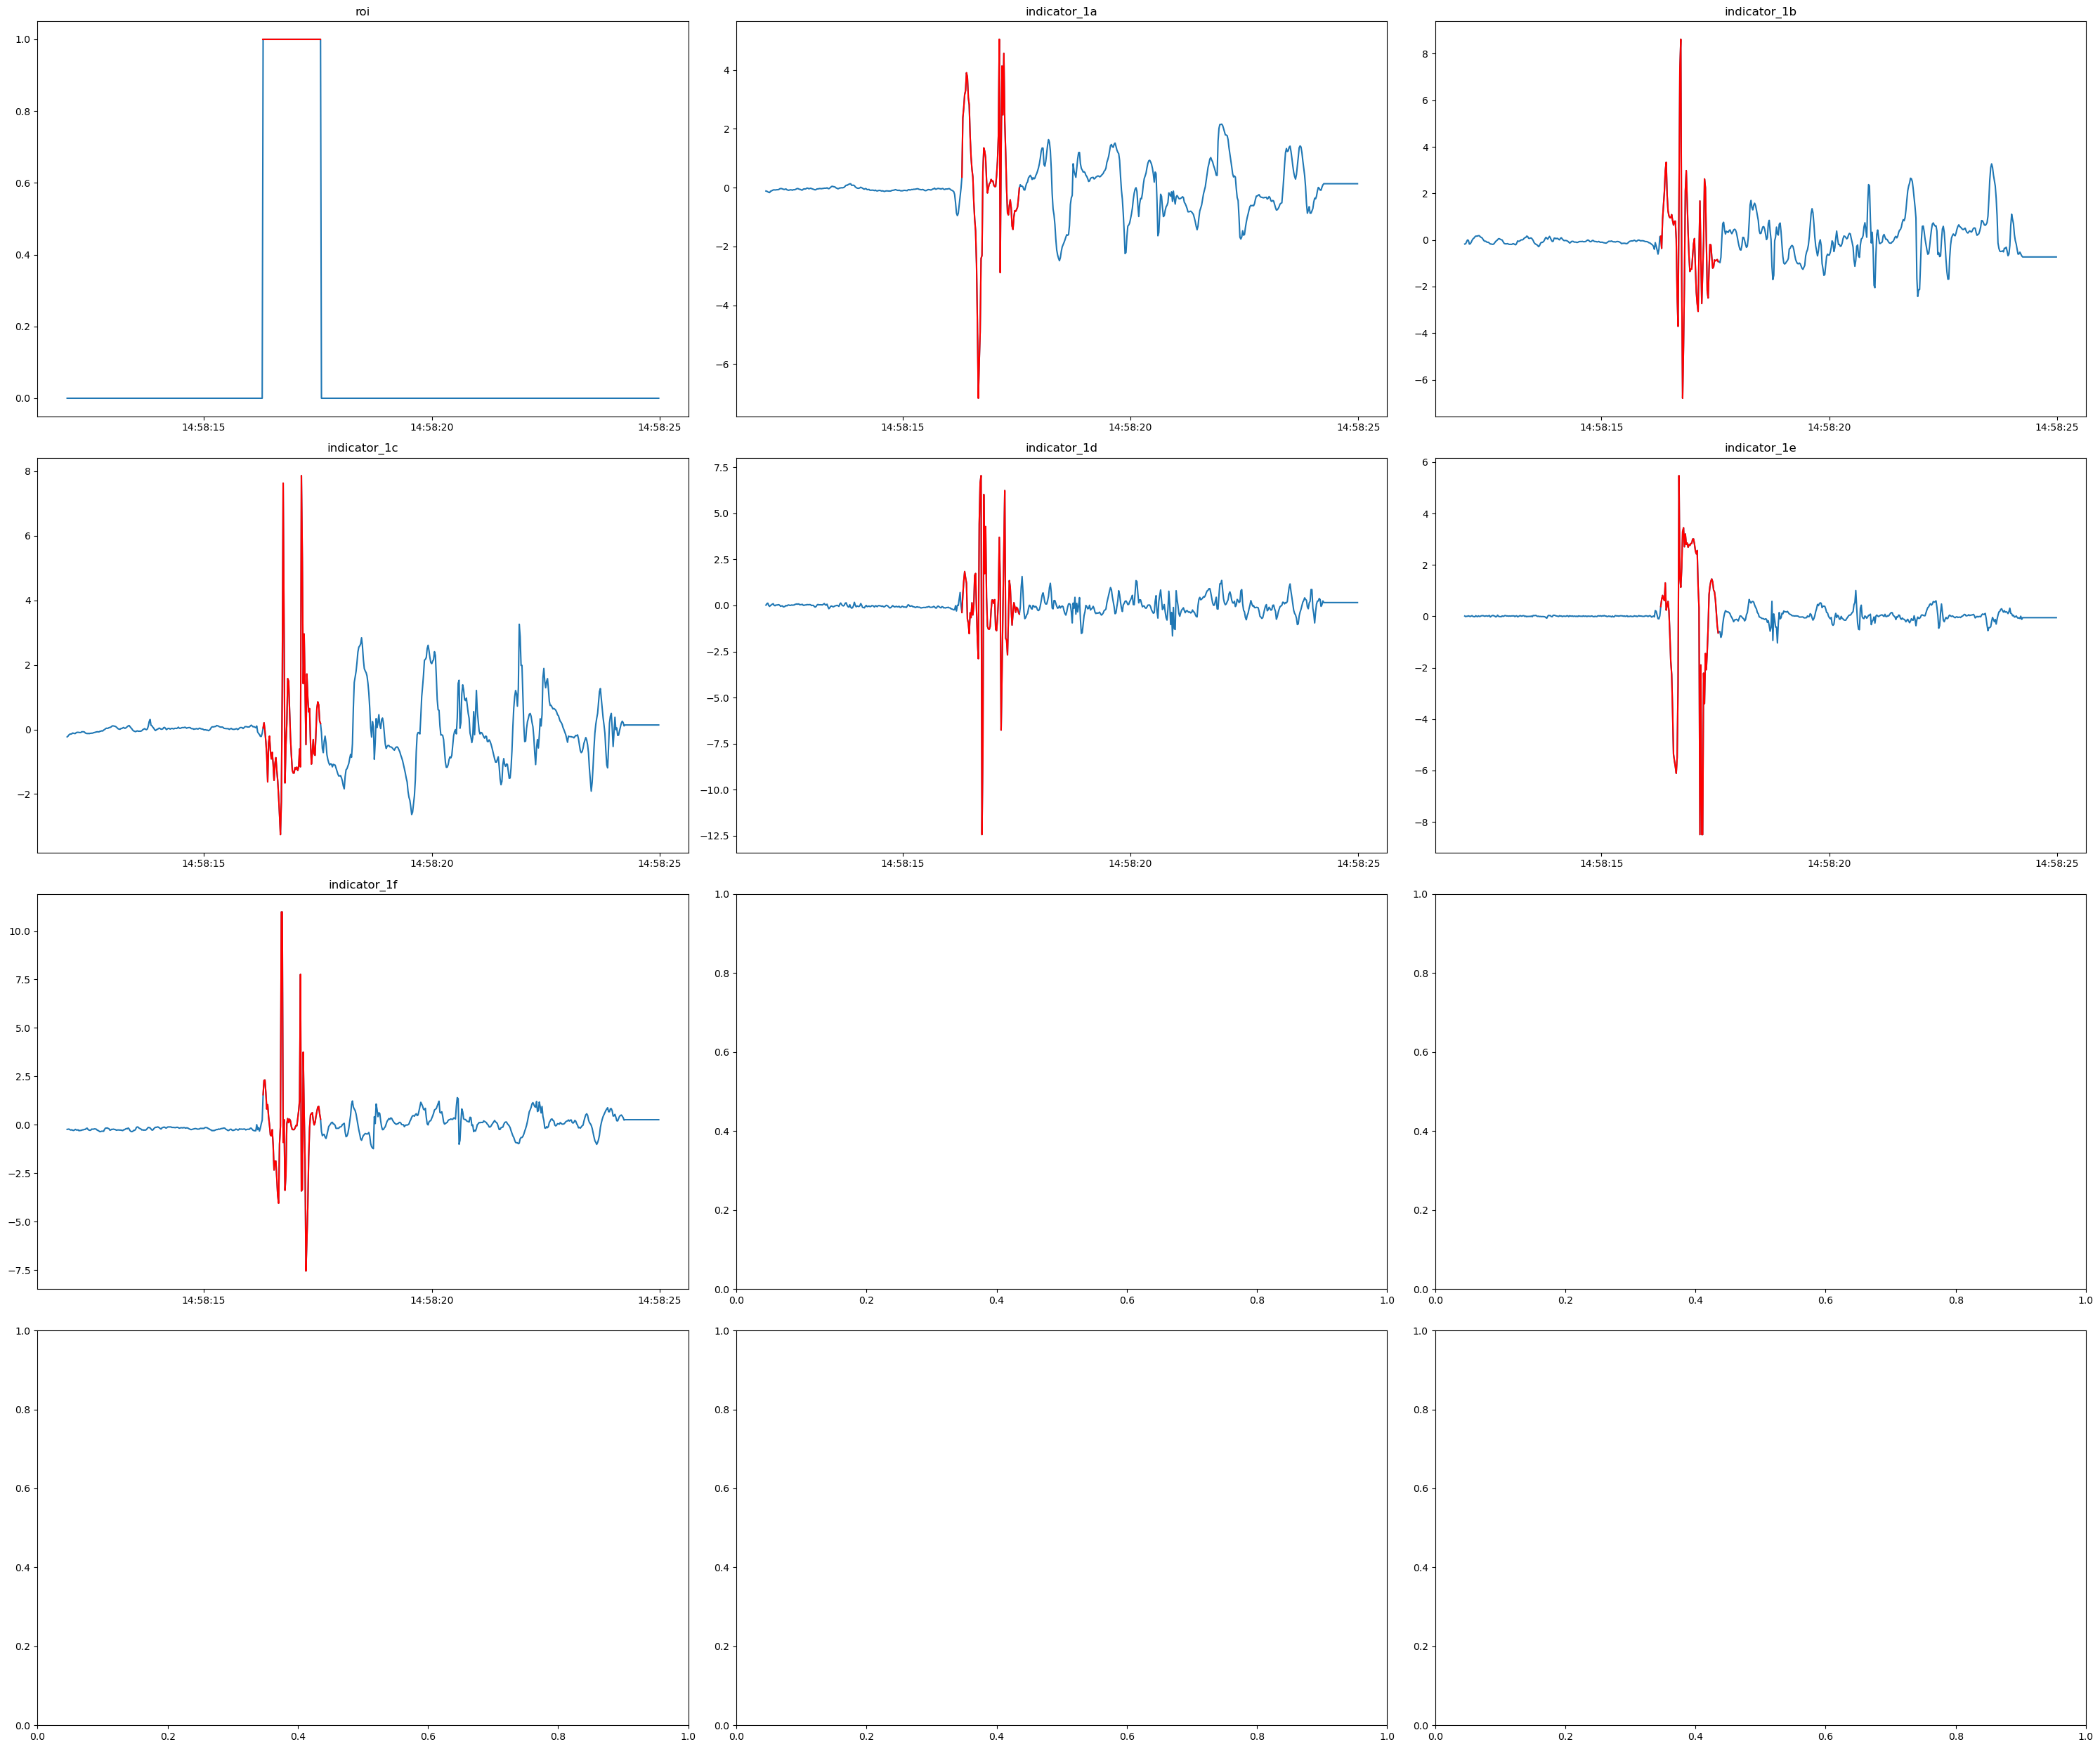

In [52]:
asset_no = -2
data = validation_data_0_sliced[validation_data_0_sliced.asset_id == list(validation_data_0_sliced.asset_id.unique())[asset_no]].copy()
data.set_index('timestamp', inplace=True)
static_data_cols = ['asset_id', 'return_on_asset', 'company_age', 'company_size', 'revenue']
asset_df_plotter_copy = data.drop(static_data_cols, axis=1).copy()
asset_df_plotter_copy_roi = asset_df_plotter_copy[asset_df_plotter_copy.roi == 1]
fig, axes = plt.subplots(nrows = 4, ncols=3, figsize=(30, 25))
for i, col in enumerate(asset_df_plotter_copy.columns):
    axes.flatten()[i].plot(asset_df_plotter_copy[col])
    axes.flatten()[i].plot(asset_df_plotter_copy_roi[col], color='red')
    axes.flatten()[i].set_title(col)

plt.tight_layout()
plt.show()

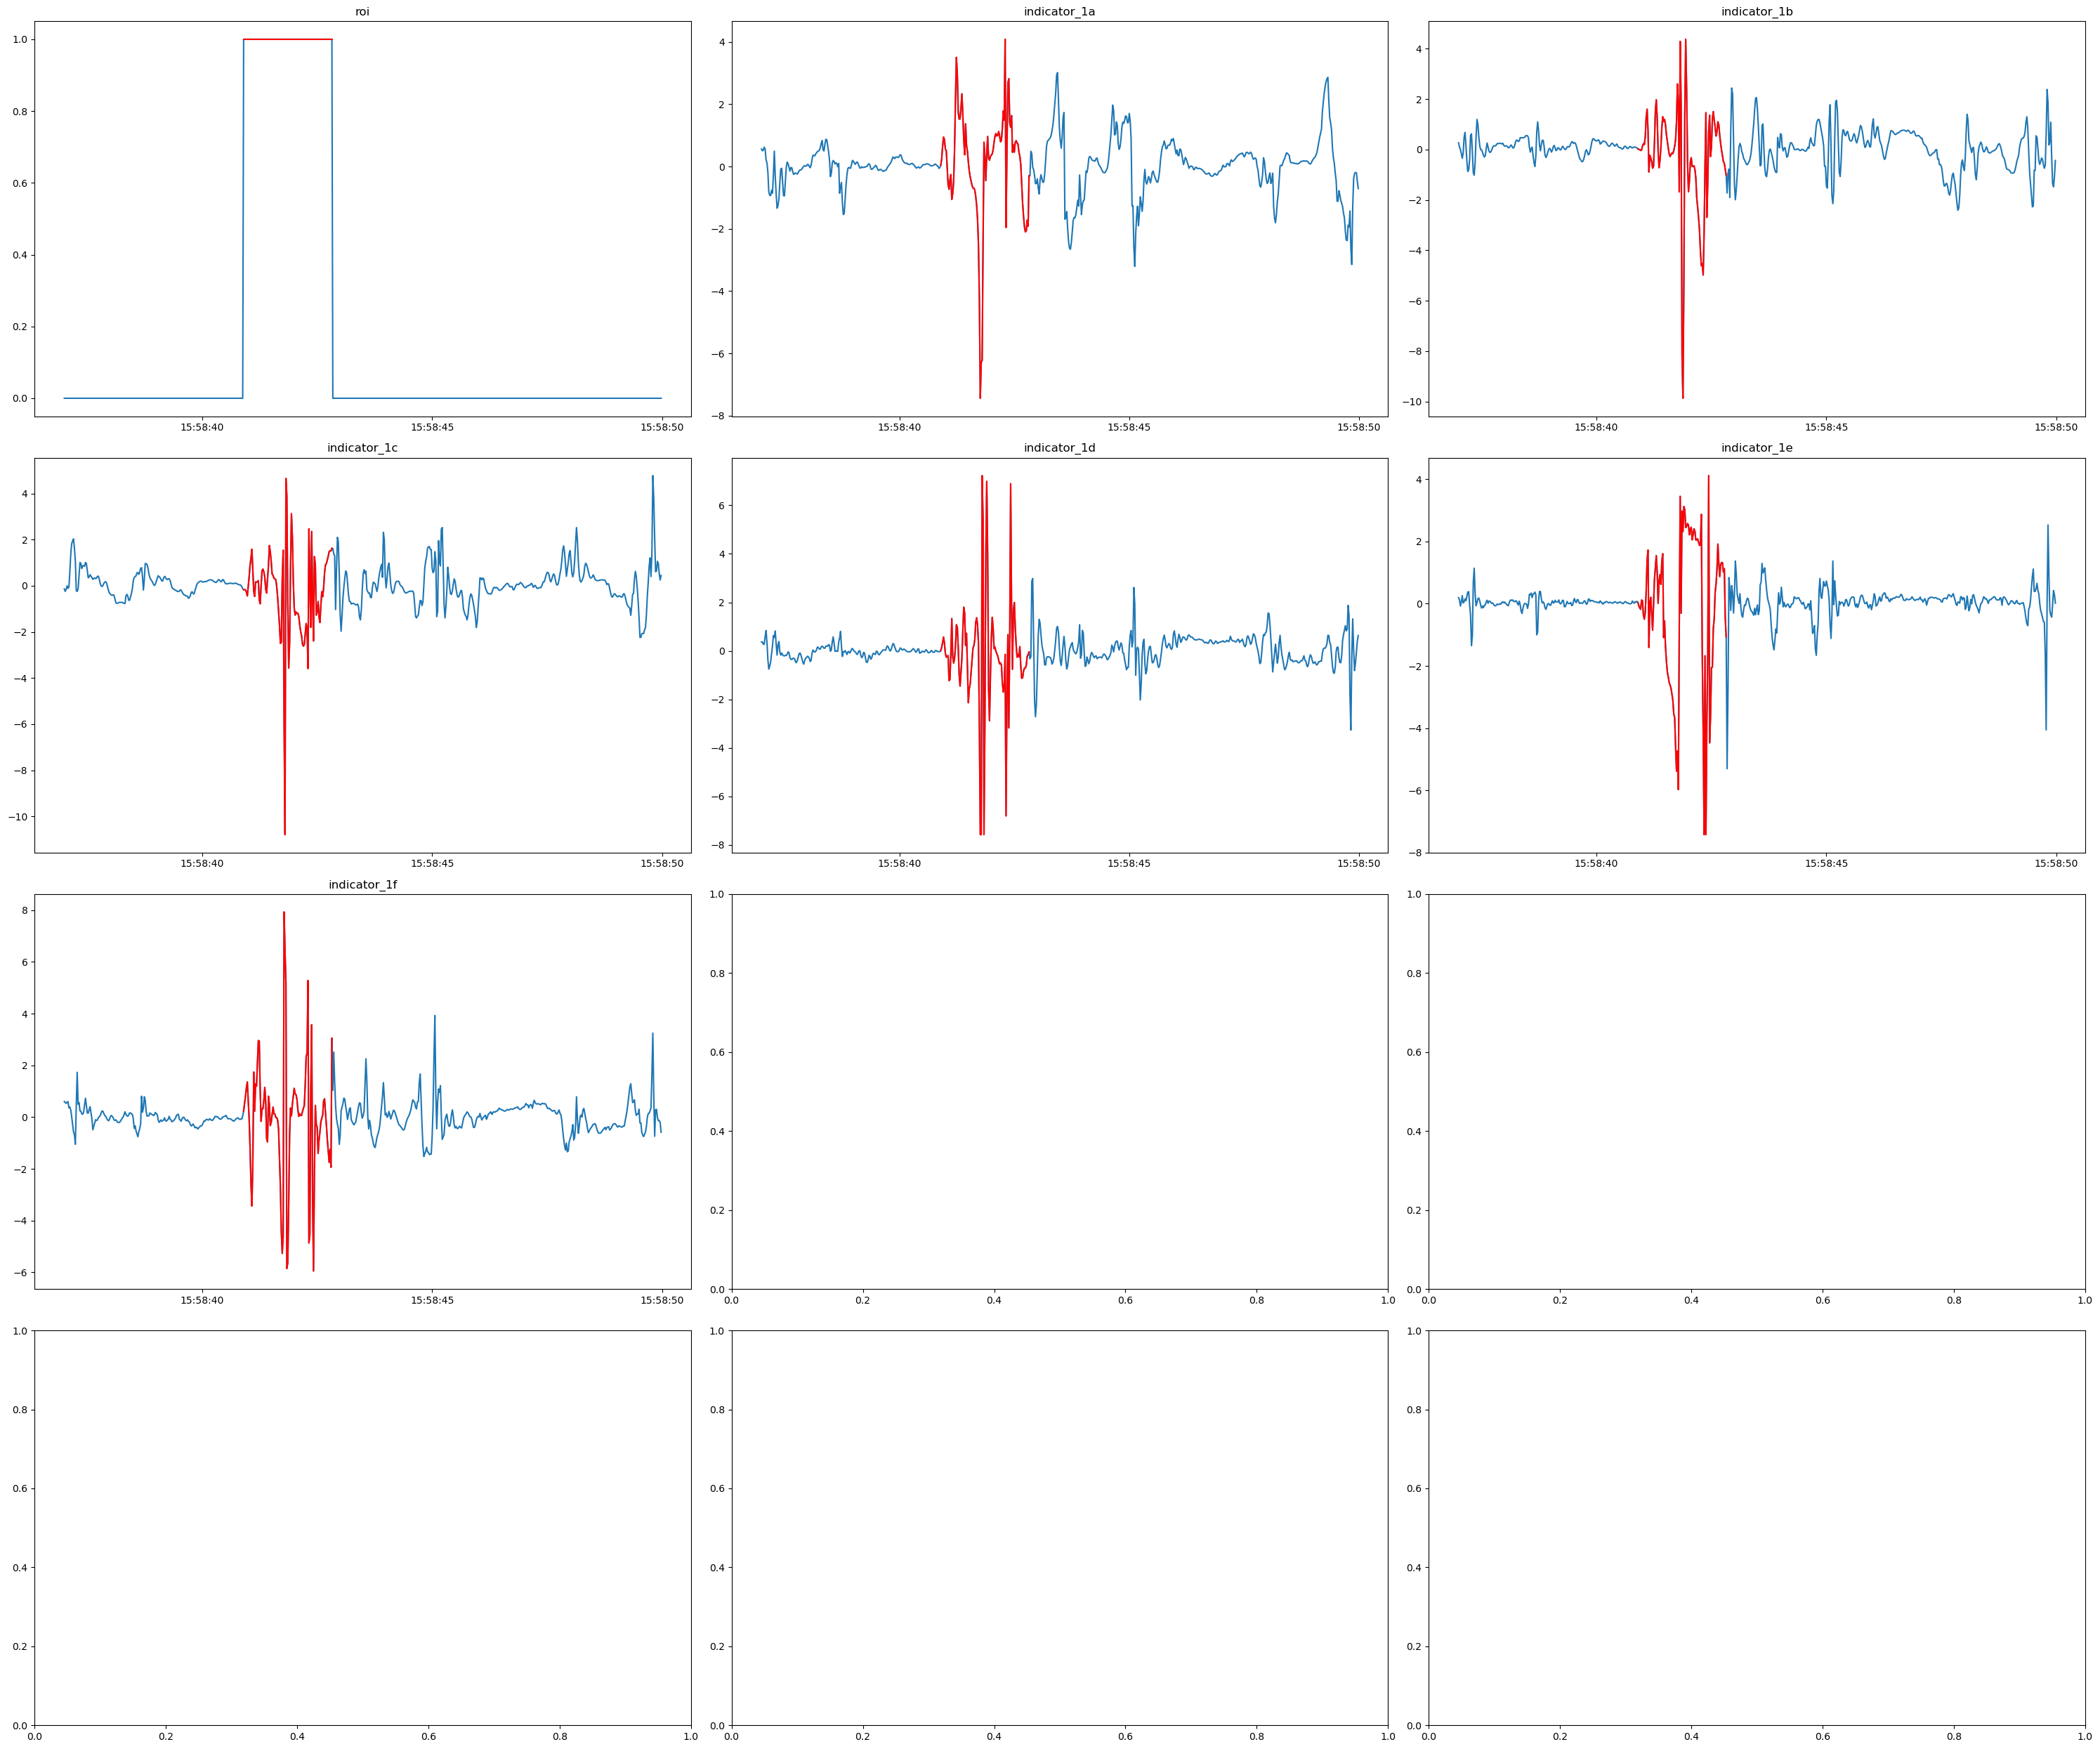

In [472]:
asset_no = -3
data = train_data_0_sliced[train_data_0_sliced.asset_id == list(train_data_0_sliced.asset_id.unique())[asset_no]].copy()
data.set_index('timestamp', inplace=True)
static_data_cols = ['asset_id', 'return_on_asset', 'company_age', 'company_size', 'revenue']
asset_df_plotter_copy = data.drop(static_data_cols, axis=1).copy()
asset_df_plotter_copy_roi = asset_df_plotter_copy[asset_df_plotter_copy.roi == 1]
fig, axes = plt.subplots(nrows = 4, ncols=3, figsize=(30, 25))
for i, col in enumerate(asset_df_plotter_copy.columns):
    axes.flatten()[i].plot(asset_df_plotter_copy[col])
    axes.flatten()[i].plot(asset_df_plotter_copy_roi[col], color='red')
    axes.flatten()[i].set_title(col)

plt.tight_layout()
plt.show()

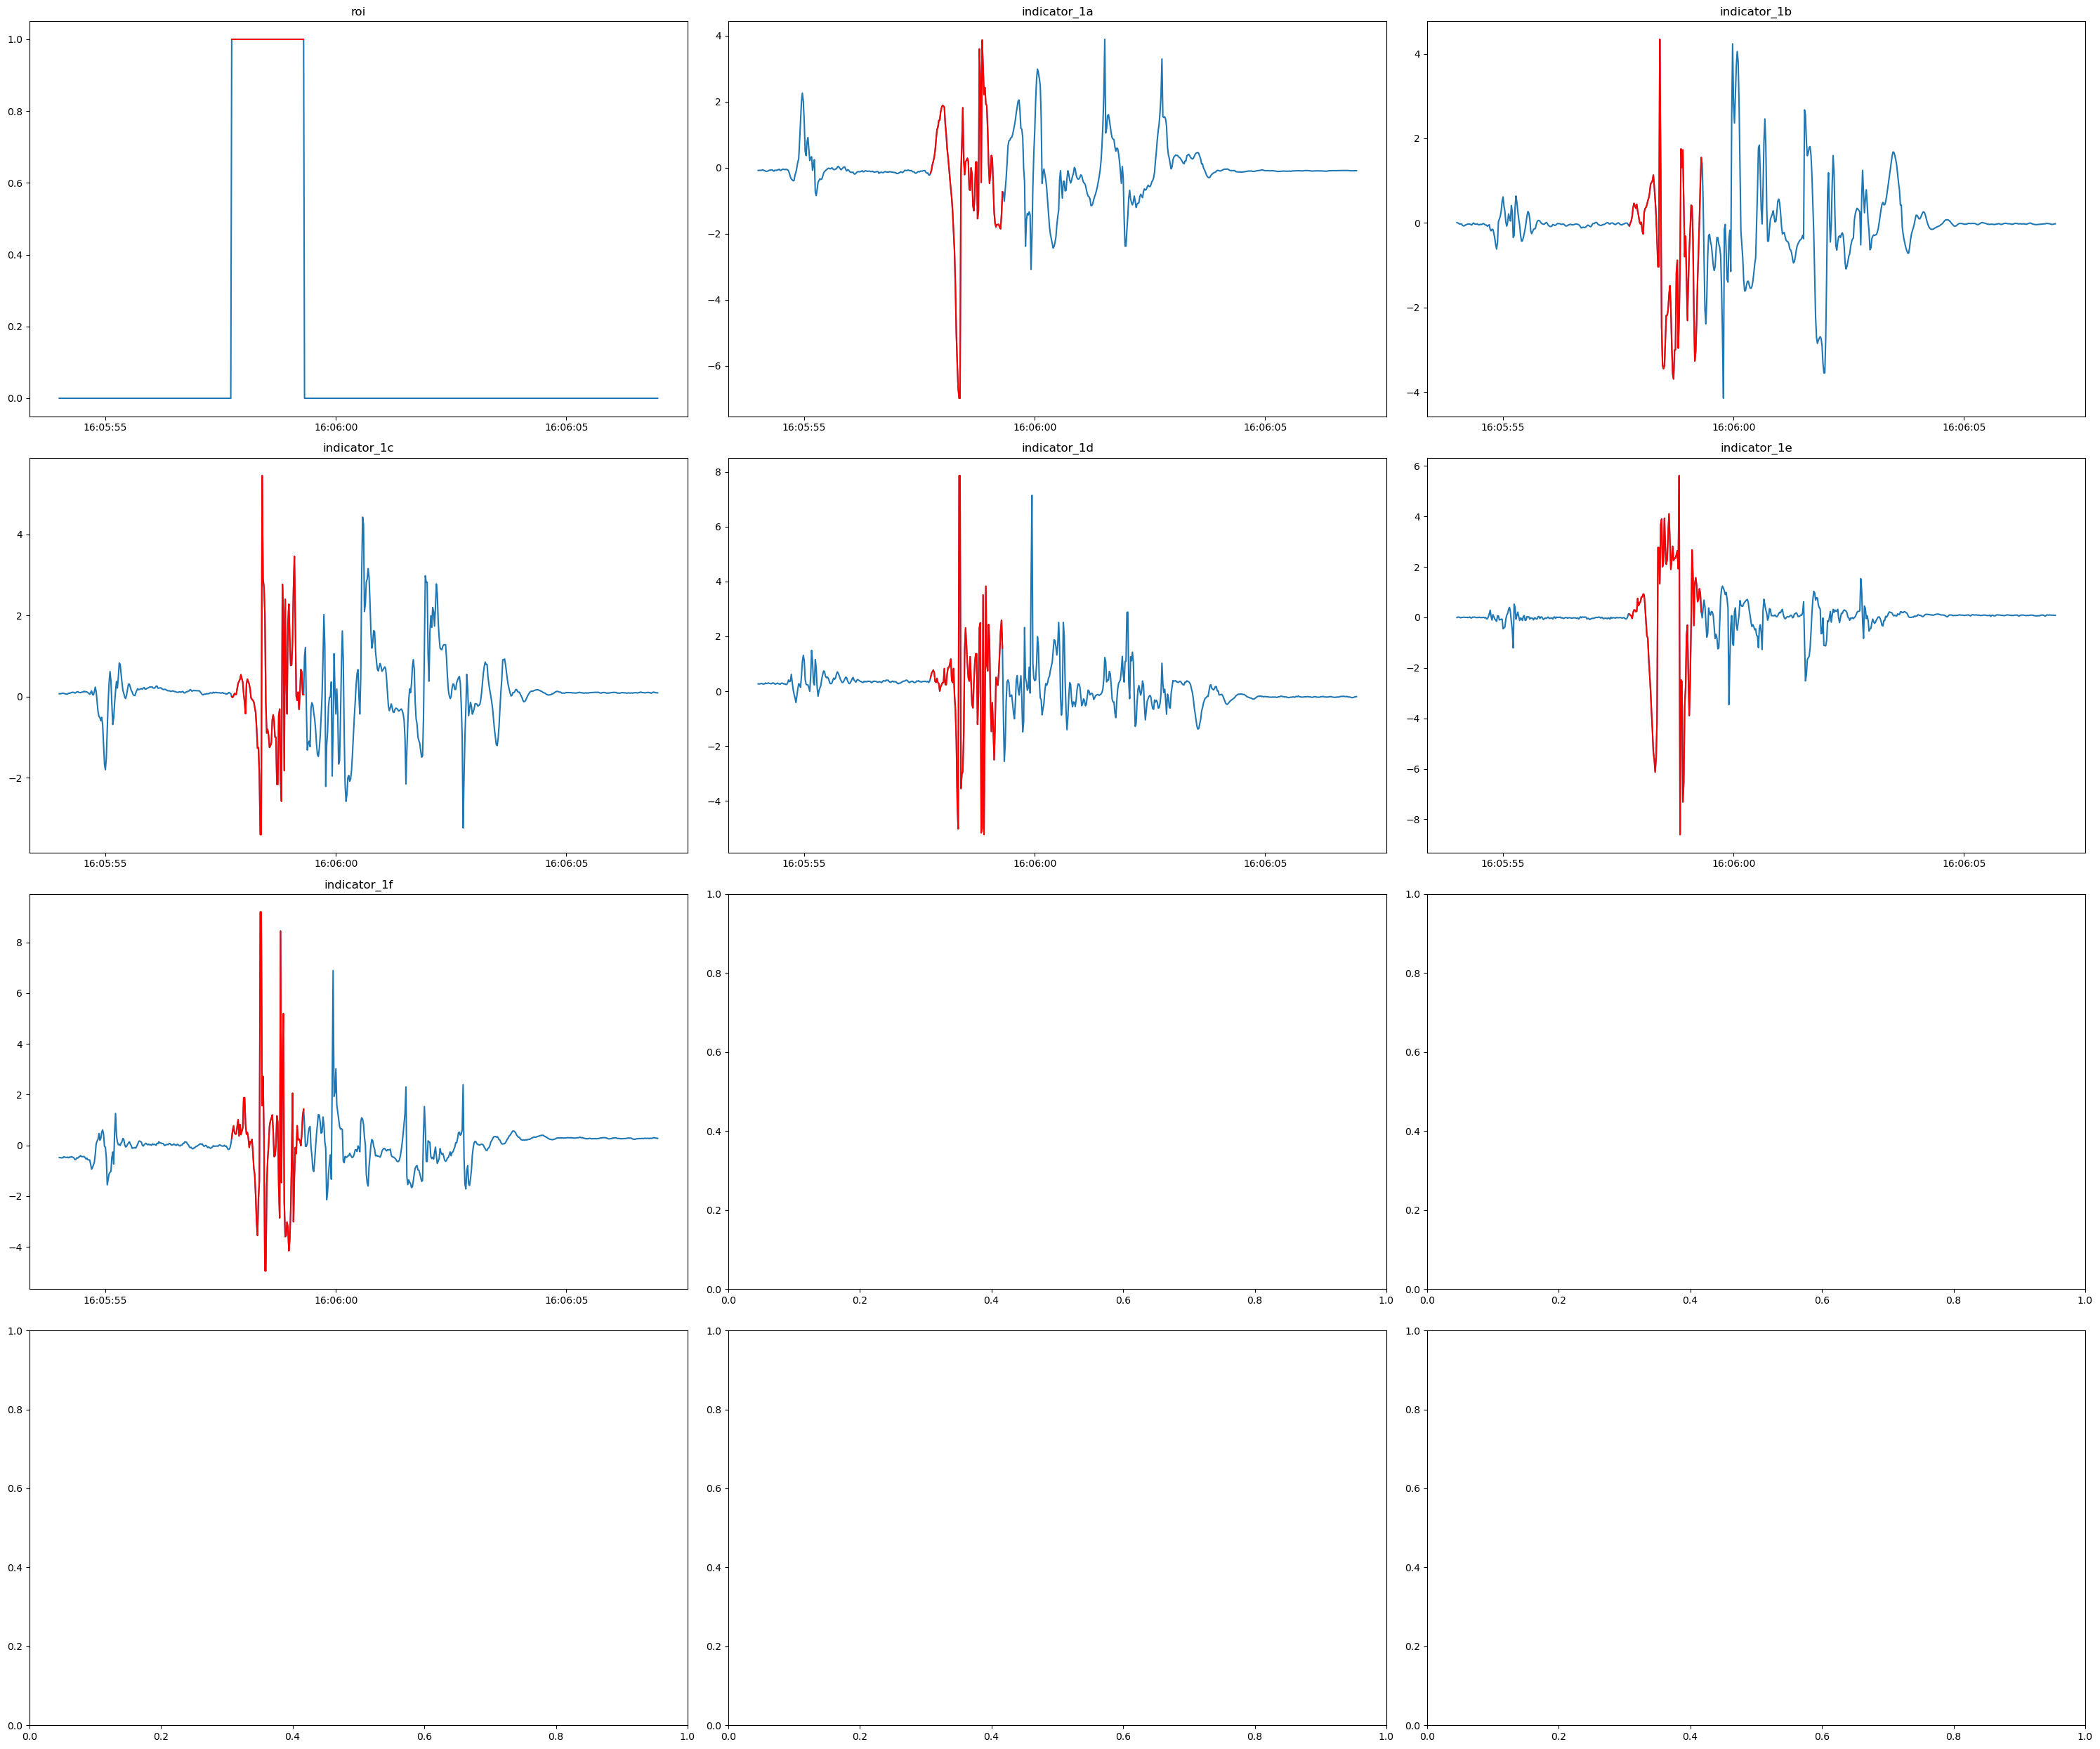

In [471]:
asset_no = 2
data = train_data_0_sliced[train_data_0_sliced.asset_id == list(train_data_0_sliced.asset_id.unique())[asset_no]].copy()
data.set_index('timestamp', inplace=True)
static_data_cols = ['asset_id', 'return_on_asset', 'company_age', 'company_size', 'revenue']
asset_df_plotter_copy = data.drop(static_data_cols, axis=1).copy()
asset_df_plotter_copy_roi = asset_df_plotter_copy[asset_df_plotter_copy.roi == 1]
fig, axes = plt.subplots(nrows = 4, ncols=3, figsize=(30, 25))
for i, col in enumerate(asset_df_plotter_copy.columns):
    axes.flatten()[i].plot(asset_df_plotter_copy[col])
    axes.flatten()[i].plot(asset_df_plotter_copy_roi[col], color='red')
    axes.flatten()[i].set_title(col)

plt.tight_layout()
plt.show()

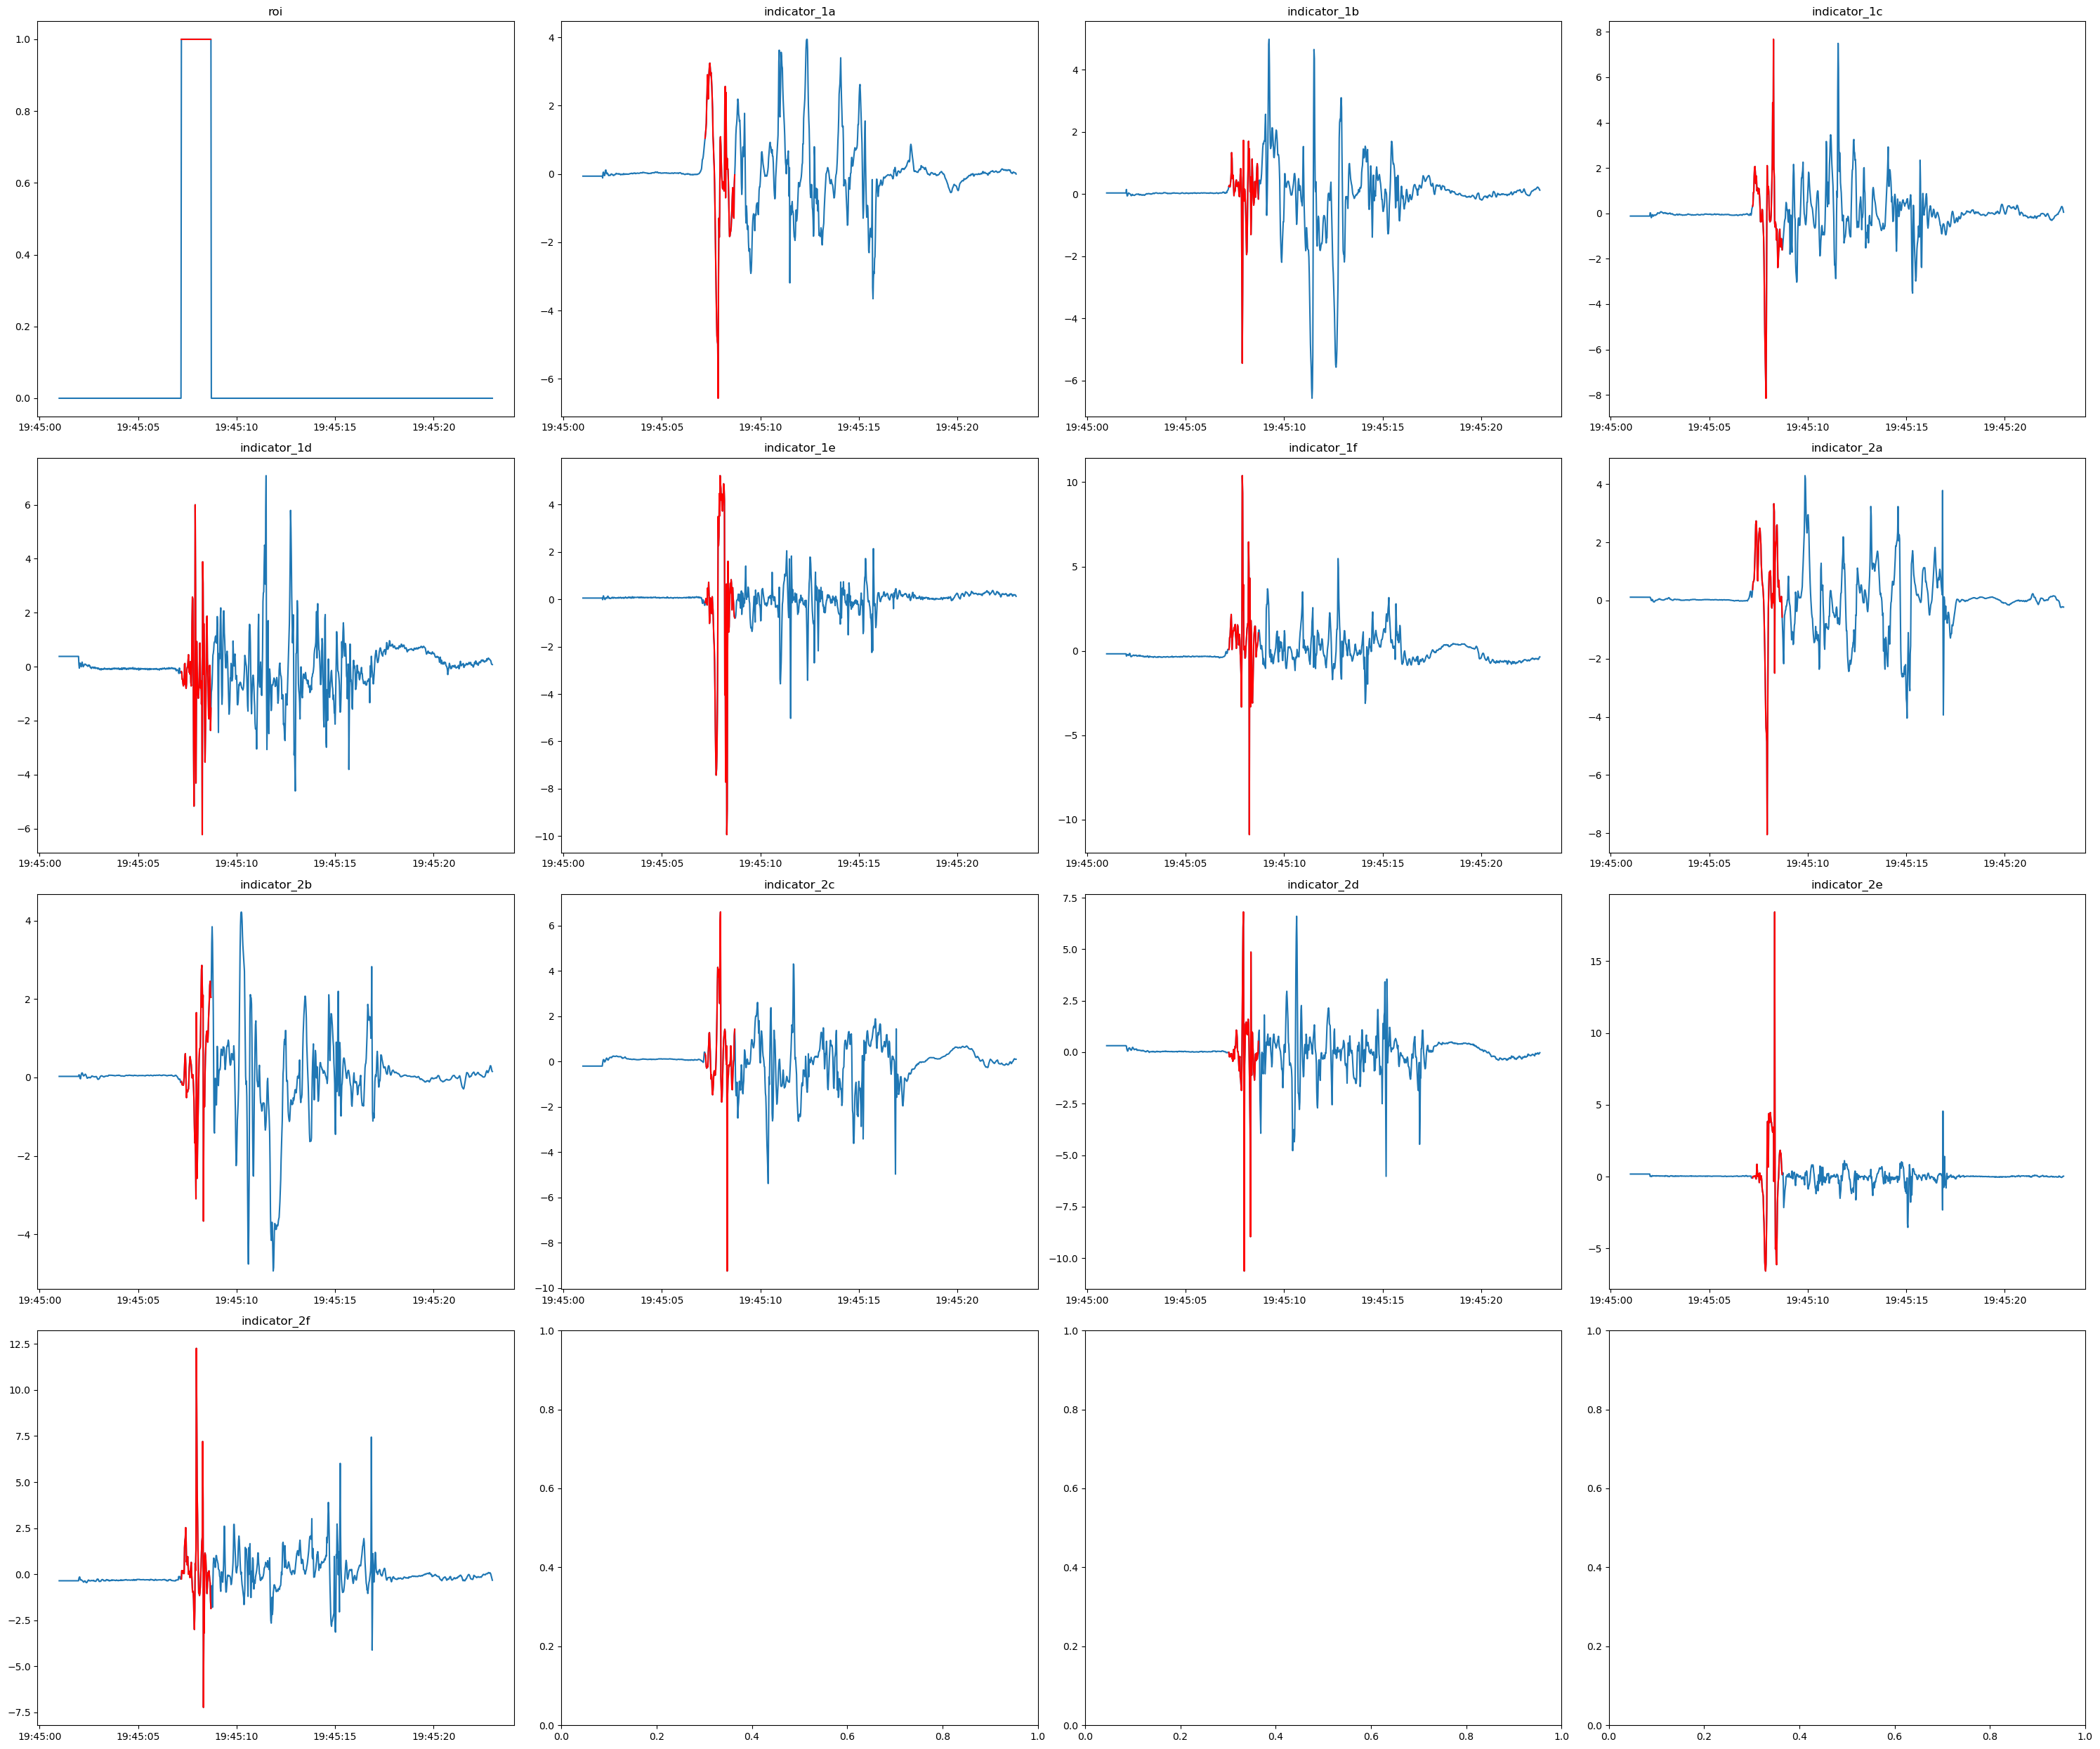

In [677]:
asset_no = 0
data = validation_data_1[validation_data_1.asset_id == list(validation_data_1.asset_id.unique())[asset_no]].copy()
data.set_index('timestamp', inplace=True)
static_data_cols = ['asset_id', 'return_on_asset', 'company_age', 'company_size', 'revenue']
asset_df_plotter_copy = data.drop(static_data_cols, axis=1).copy()
asset_df_plotter_copy_roi = asset_df_plotter_copy[asset_df_plotter_copy.roi == 1]
fig, axes = plt.subplots(nrows = 4, ncols=4, figsize=(30, 25))
for i, col in enumerate(asset_df_plotter_copy.columns):
    axes.flatten()[i].plot(asset_df_plotter_copy[col])
    axes.flatten()[i].plot(asset_df_plotter_copy_roi[col], color='red')
    axes.flatten()[i].set_title(col)

plt.tight_layout()
plt.show()

In [359]:
y_train_full

array([22, 21, 24, 33, 29, 45, 25, 43, 45, 25, 38, 30, 36, 40, 37, 39, 31,
       33, 16, 40])

In [360]:
y_val

array([31, 33, 16, 40])

In [362]:
y_train

array([22, 21, 24, 33, 29, 45, 25, 43, 45, 25, 38, 30, 36, 40, 37, 39])

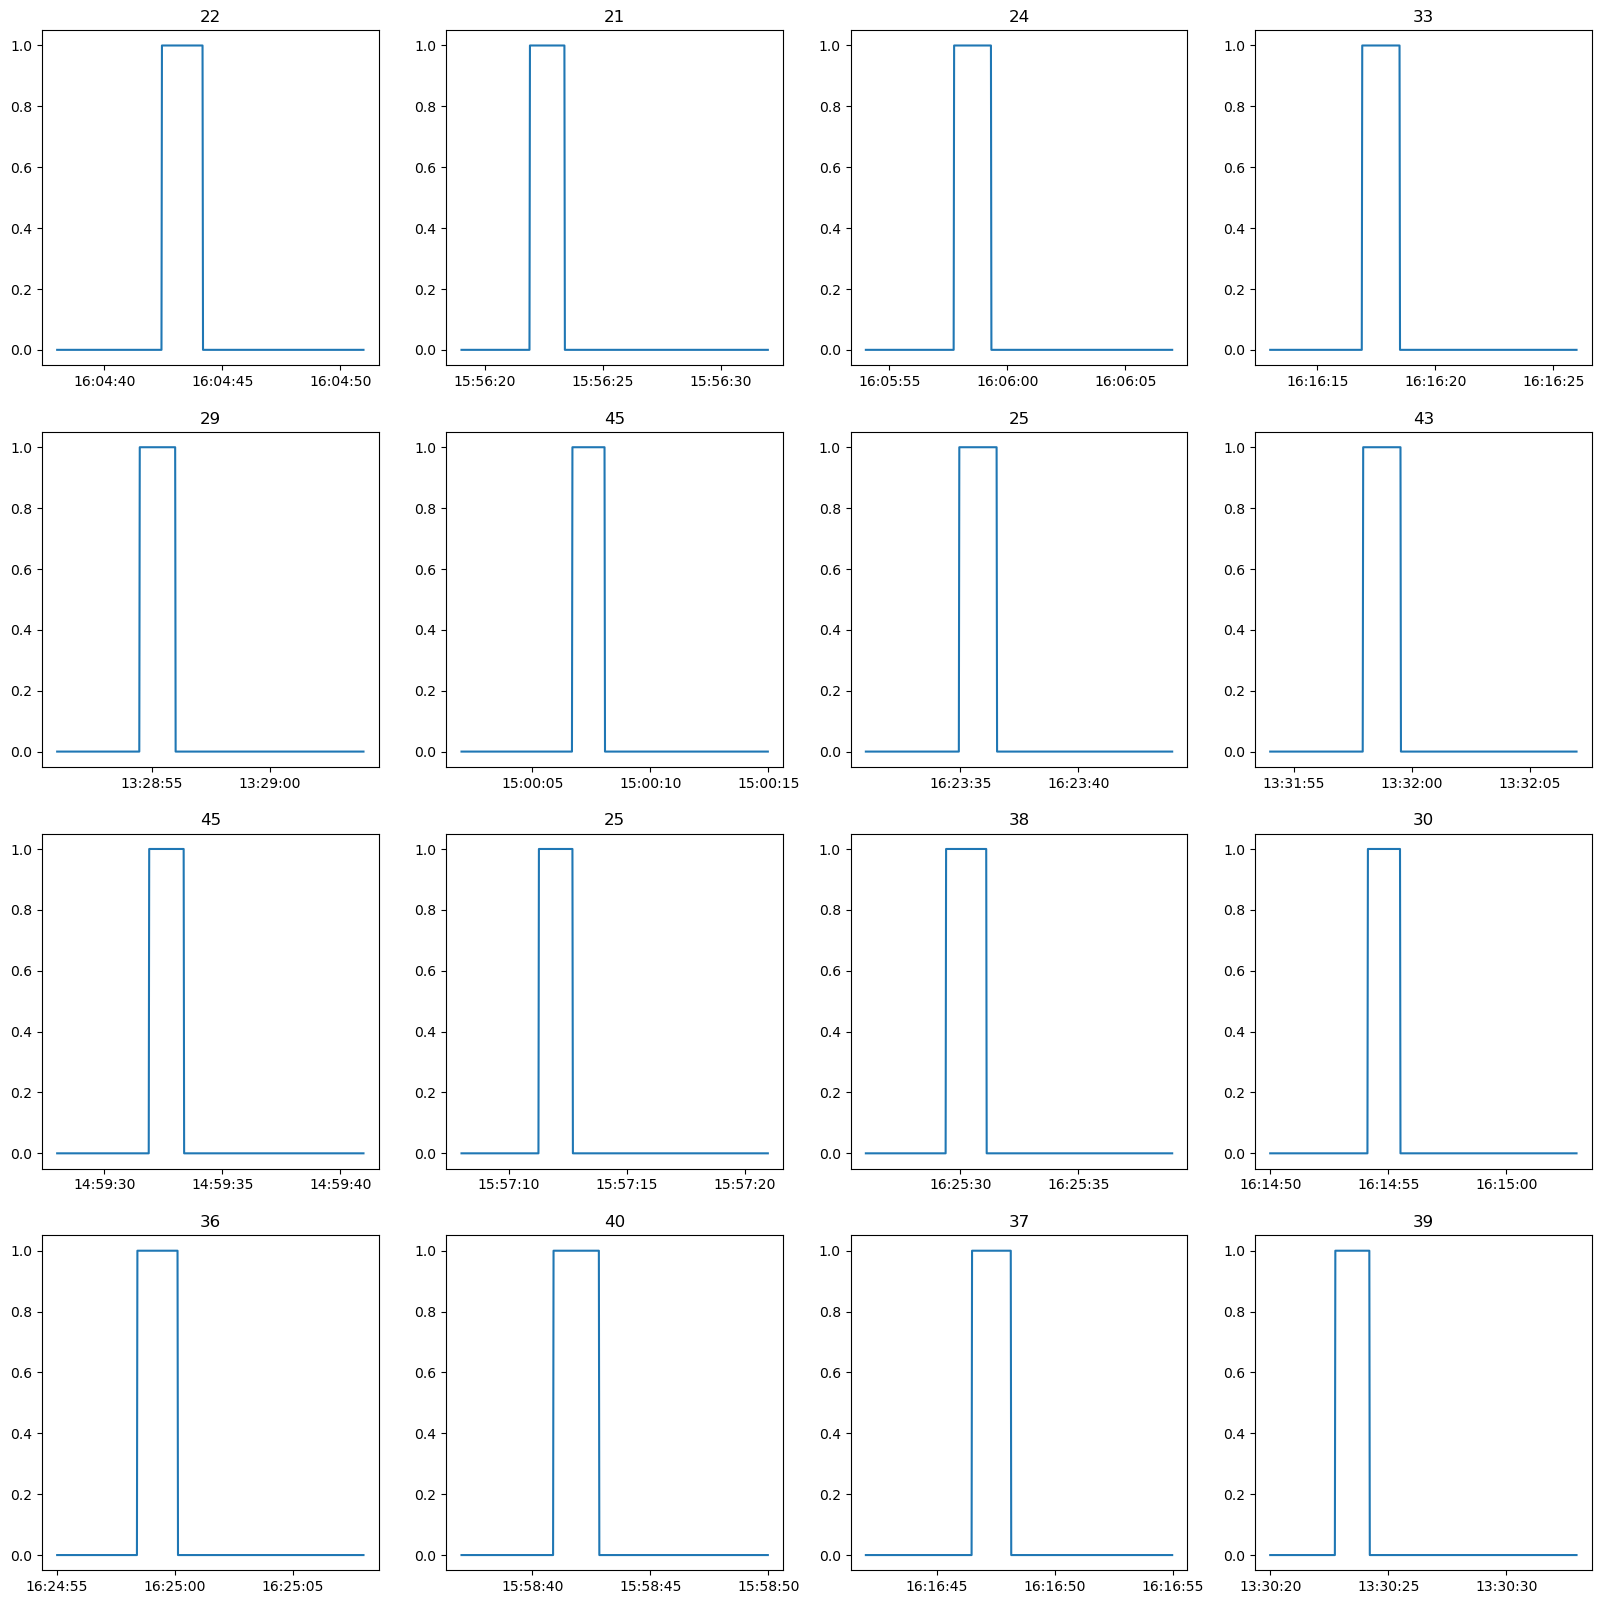

In [371]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
for i, asset in enumerate(train_data_0_sliced.asset_id.unique()):
    roi_data = train_data_0_sliced[train_data_0_sliced.asset_id == asset].copy()
    return_on_asset = list(roi_data.return_on_asset)[0]
    roi_data.set_index('timestamp', inplace=True)
    axes.flatten()[i].plot(roi_data.roi)
    axes.flatten()[i].set_title(return_on_asset)

# Classical Model Approach

In [53]:
X = df_scaled_1.copy()
from sklearn.model_selection import train_test_split

# Step 1: Get unique asset IDs
unique_asset_ids_1 = list(X['asset_id'].unique())

# Step 2: Split asset IDs into train and validation sets
train_asset_ids_1, val_asset_ids_1 = train_test_split(unique_asset_ids_1, test_size=0.2, random_state=42)

# Step 3: Filter train data
train_data_1 = X[X['asset_id'].isin(train_asset_ids_1)]

# Step 4: Filter validation data
validation_data_1 = X[X['asset_id'].isin(val_asset_ids_1)]


asset_list_train_data_1 = []
asset_list_1 = list(train_data_1.asset_id.unique())
for asset in asset_list_1:
    print(train_data_1[train_data_1.asset_id == asset].shape)
    asset_list_train_data_1.append(train_data_1[train_data_1.asset_id == asset].shape[0])

train_data_1_sliced = train_data_1.groupby('asset_id').head(min(asset_list_train_data_1))
train_data_1_sliced

(850, 19)
(850, 19)
(950, 19)
(950, 19)
(850, 19)
(1550, 19)
(1250, 19)
(750, 19)
(750, 19)
(1100, 19)
(700, 19)
(600, 19)
(1050, 19)
(1000, 19)
(700, 19)
(850, 19)


timestamp                              asset_id    roi  \
1900  2023-03-24 18:37:55.000  8a3d7824-1707-42a4-9ce5-5a52b1b12a00  False   
1901  2023-03-24 18:37:55.020  8a3d7824-1707-42a4-9ce5-5a52b1b12a00  False   
1902  2023-03-24 18:37:55.040  8a3d7824-1707-42a4-9ce5-5a52b1b12a00  False   
1903  2023-03-24 18:37:55.060  8a3d7824-1707-42a4-9ce5-5a52b1b12a00  False   
1904  2023-03-24 18:37:55.080  8a3d7824-1707-42a4-9ce5-5a52b1b12a00  False   
...                       ...                                   ...    ...   
19145 2023-02-24 19:41:07.900  711c2bd5-0c5c-422d-97ec-da7ce93136a3  False   
19146 2023-02-24 19:41:07.920  711c2bd5-0c5c-422d-97ec-da7ce93136a3  False   
19147 2023-02-24 19:41:07.940  711c2bd5-0c5c-422d-97ec-da7ce93136a3  False   
19148 2023-02-24 19:41:07.960  711c2bd5-0c5c-422d-97ec-da7ce93136a3  False   
19149 2023-02-24 19:41:07.980  711c2bd5-0c5c-422d-97ec-da7ce93136a3  False   

       indicator_1a  indicator_1b  indicator_1c  indicator_1d  indicator_1e  \
1900      -0.286958     -1.435495      0.322242      2.240963     -0.672989   
1901       0.068363      0.280363      1.151695      1.824172     -0.374847   
1902       0.095350      1.329785      2.230372      0.260265     -0.571650   
1903      -0.039582      1.024695      2.645098     -0.543934     -0.274610   
1904      -0.092270     -1.183418      2.049294      0.747989     -0.298843   
...             ...           ...           ...           ...           ...   
19145      1.428787      1.885710     -0.766479      1.680546     -0.188747   
19146      1.398657      2.303908     -0.441787      1.405788     -0.152340   
19147      1.276037      2.578458     -0.062978      1.031827      0.030041   
19148      1.048315      2.626057      0.248595      0.749267      0.078236   
19149      0.783456      2.339608      0.638883      1.008977      0.316094   

       indicator_1f  return_on_asset  company_age  company_size  revenue  \
1900       0.665641               34           16            69      177   
1901       1.195512               34           16            69      177   
1902       0.700278               34           16            69      177   
1903       0.439044               34           16            69      177   
1904       0.205573               34           16            69      177   
...             ...              ...          ...           ...      ...   
19145      0.272407               44           20            72      182   
19146     -0.008899               44           20            72      182   
19147     -0.248827               44           20            72      182   
19148     -0.340277               44           20            72      182   
19149     -0.251608               44           20            72      182   

       indicator_2a  indicator_2b  indicator_2c  indicator_2d  indicator_2e  \
1900      -0.104268     -0.630095      1.442766     -0.198548     -0.207773   
1901      -0.136546     -0.661580      1.460504     -0.149258     -0.151442   
1902      -0.204944     -0.677799      1.491544     -0.154392     -0.106013   
1903      -0.249519     -0.609105      1.561015     -0.281042     -0.074395   
1904      -0.247982     -0.527055      1.623095     -0.386469     -0.009705   
...             ...           ...           ...           ...           ...   
19145     -0.236272      0.362341     -0.722242      0.205858     -0.064565   
19146     -0.198800      0.517828     -0.386361      0.430728     -0.007545   
19147     -0.236272      0.673314     -0.066474      0.550917     -0.004136   
19148     -0.288615      0.806374      0.130790      0.366756     -0.056508   
19149     -0.325492      0.828800      0.146784      0.043990     -0.084708   

       indicator_2f  
1900      -0.226326  
1901      -0.190522  
1902      -0.215371  
1903      -0.232472  
1904      -0.193728  
...             ...  
19145      0.166509  
19146      0.188490  
19147      0.160937  
19148      0.080754  
19149     -0.005930  

[9600 r

In [54]:
asset_list_validation_data_1 = []
asset_list_1 = list(validation_data_1.asset_id.unique())
for asset in asset_list_1:
    print(validation_data_1[validation_data_1.asset_id == asset].shape)
    asset_list_validation_data_1.append(validation_data_1[validation_data_1.asset_id == asset].shape[0])

validation_data_1_sliced = validation_data_1.groupby('asset_id').head(min(asset_list_train_data_1))
validation_data_1_sliced

(1100, 19)
(800, 19)
(800, 19)
(1000, 19)
(950, 19)


timestamp                              asset_id    roi  \
0     2023-02-27 19:45:01.000  b9a9903e-076e-4dbd-8ba3-d0603f8a774c  False   
1     2023-02-27 19:45:01.020  b9a9903e-076e-4dbd-8ba3-d0603f8a774c  False   
2     2023-02-27 19:45:01.040  b9a9903e-076e-4dbd-8ba3-d0603f8a774c  False   
3     2023-02-27 19:45:01.060  b9a9903e-076e-4dbd-8ba3-d0603f8a774c  False   
4     2023-02-27 19:45:01.080  b9a9903e-076e-4dbd-8ba3-d0603f8a774c  False   
...                       ...                                   ...    ...   
16495 2023-02-27 19:48:35.900  cfd9125a-312d-4a43-bb26-1c11bb421835  False   
16496 2023-02-27 19:48:35.920  cfd9125a-312d-4a43-bb26-1c11bb421835  False   
16497 2023-02-27 19:48:35.940  cfd9125a-312d-4a43-bb26-1c11bb421835  False   
16498 2023-02-27 19:48:35.960  cfd9125a-312d-4a43-bb26-1c11bb421835  False   
16499 2023-02-27 19:48:35.980  cfd9125a-312d-4a43-bb26-1c11bb421835  False   

       indicator_1a  indicator_1b  indicator_1c  indicator_1d  indicator_1e  \
0         -0.063335      0.034917     -0.119001      0.379746      0.053611   
1         -0.063335      0.034917     -0.119001      0.379746      0.053611   
2         -0.063335      0.034917     -0.119001      0.379746      0.053611   
3         -0.063335      0.034917     -0.119001      0.379746      0.053611   
4         -0.063335      0.034917     -0.119001      0.379746      0.053611   
...             ...           ...           ...           ...           ...   
16495      0.249957     -1.961803     -1.690467      0.500739     -0.044594   
16496      0.115335     -1.707145     -1.843251      0.442503     -0.032723   
16497     -0.292520     -1.344826     -1.806965      0.271678     -0.033094   
16498     -0.292520     -1.344826     -1.806965      0.271678     -0.033094   
16499     -0.432128     -1.237856     -1.316146      0.378832     -0.138079   

       indicator_1f  return_on_asset  company_age  company_size  revenue  \
0         -0.171548               17           15            57      180   
1         -0.171548               17           15            57      180   
2         -0.171548               17           15            57      180   
3         -0.171548               17           15            57      180   
4         -0.171548               17           15            57      180   
...             ...              ...          ...           ...      ...   
16495      0.431555               28           15            57      180   
16496      0.525767               28           15            57      180   
16497      0.600944               28           15            57      180   
16498      0.600944               28           15            57      180   
16499      0.809373               28           15            57      180   

       indicator_2a  indicator_2b  indicator_2c  indicator_2d  indicator_2e  \
0          0.113484      0.027169     -0.201270      0.315707      0.176797   
1          0.113484      0.027169     -0.201270      0.315707      0.176797   
2          0.113484      0.027169     -0.201270      0.315707      0.176797   
3          0.113484      0.027169     -0.201270      0.315707      0.176797   
4          0.113484      0.027169     -0.201270      0.315707      0.176797   
...             ...           ...           ...           ...           ...   
16495      0.407546     -0.177793      0.157032      0.531021     -0.014342   
16496      0.416577     -0.228377      0.154952      0.555048      0.026538   
16497      0.394000     -0.272914      0.157032      0.593978      0.043602   
16498      0.383840     -0.267415      0.173668      0.624392      0.042891   
16499      0.359006     -0.260268      0.202781      0.604623      0.044668   

       indicator_2f  
0         -0.354574  
1         -0.354574  
2         -0.354574  
3         -0.354574  
4         -0.354574  
...             ...  
16495     -0.101744  
16496     -0.159474  
16497     -0.239440  
16498     -0.302729  
16499     -0.319406  

[3000 r

In [470]:
a  = train_data_0_sliced[train_data_0_sliced.roi == True]

av = validation_data_0_sliced[validation_data_0_sliced.roi == True]

for asset in list(a.asset_id.unique()):
    print(a[a.asset_id == asset].shape)
a.set_index('timestamp', inplace=True)
# a.drop(columns=['asset_id'], inplace=True)

av.set_index('timestamp', inplace=True)
# av.drop(columns=['asset_id'], inplace=True)

b = a.return_on_asset

bv = av.return_on_asset

a.drop(columns=['return_on_asset'], inplace=True)
av.drop(columns=['return_on_asset'], inplace=True)
a

(87, 13)
(74, 13)
(79, 13)
(80, 13)
(76, 13)
(69, 13)
(80, 13)
(80, 13)
(74, 13)
(72, 13)
(86, 13)
(69, 13)
(86, 13)
(97, 13)
(83, 13)
(73, 13)


/var/folders/2g/1b4s4cdd6vqc24l2b2mm1ttw0000gn/T/ipykernel_68729/1917725128.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.drop(columns=['return_on_asset'], inplace=True)
/var/folders/2g/1b4s4cdd6vqc24l2b2mm1ttw0000gn/T/ipykernel_68729/1917725128.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  av.drop(columns=['return_on_asset'], inplace=True)


asset_id   roi  \
timestamp                                                             
2023-03-25 16:04:42.440  e927c440-3128-4087-8bc5-4ca80662ef63  True   
2023-03-25 16:04:42.460  e927c440-3128-4087-8bc5-4ca80662ef63  True   
2023-03-25 16:04:42.480  e927c440-3128-4087-8bc5-4ca80662ef63  True   
2023-03-25 16:04:42.500  e927c440-3128-4087-8bc5-4ca80662ef63  True   
2023-03-25 16:04:42.520  e927c440-3128-4087-8bc5-4ca80662ef63  True   
...                                                       ...   ...   
2023-03-25 13:30:24.120  8d4a0924-5c4e-4b69-b14f-615d867f06c6  True   
2023-03-25 13:30:24.140  8d4a0924-5c4e-4b69-b14f-615d867f06c6  True   
2023-03-25 13:30:24.160  8d4a0924-5c4e-4b69-b14f-615d867f06c6  True   
2023-03-25 13:30:24.180  8d4a0924-5c4e-4b69-b14f-615d867f06c6  True   
2023-03-25 13:30:24.200  8d4a0924-5c4e-4b69-b14f-615d867f06c6  True   

                         indicator_1a  indicator_1b  indicator_1c  \
timestamp                                                           
2023-03-25 16:04:42.440     -0.093987     -0.196942      0.485790   
2023-03-25 16:04:42.460     -0.023290     -0.159497      0.622016   
2023-03-25 16:04:42.480      0.259499     -0.070277      0.721089   
2023-03-25 16:04:42.500      0.435126      0.035585      0.588991   
2023-03-25 16:04:42.520      0.642753     -0.069815      0.251867   
...                               ...           ...           ...   
2023-03-25 13:30:24.120     -2.205804      0.189099     -0.894858   
2023-03-25 13:30:24.140     -1.702534      0.497565     -0.552452   
2023-03-25 13:30:24.160     -1.184629      0.169781     -0.340798   
2023-03-25 13:30:24.180     -0.984926     -0.228110     -0.691376   
2023-03-25 13:30:24.200     -2.405507      0.125536     -1.287113   

                         indicator_1d  indicator_1e  indicator_1f  \
timestamp                                                           
2023-03-25 16:04:42.440      0.145624     -0.026568      0.591266   
2023-03-25 16:04:42.460      0.339638      0.125185      0.738923   
2023-03-25 16:04:42.480      0.248391      0.326971      1.137433   
2023-03-25 16:04:42.500      0.072263      0.446584      1.487829   
2023-03-25 16:04:42.520      0.183518      0.479718      1.545233   
...                               ...           ...           ...   
2023-03-25 13:30:24.120     -0.149070      1.243980      1.137878   
2023-03-25 13:30:24.140     -1.120556      0.950510      0.843481   
2023-03-25 13:30:24.160     -1.882387      1.239542      0.352370   
2023-03-25 13:30:24.180     -1.517607      0.909180     -0.095753   
2023-03-25 13:30:24.200      0.310967     -0.221429      0.481337   

                         company_age  company_size  revenue  
timestamp                                                    
2023-03-25 16:04:42.440           14            62      176  
2023-03-25 16:04:42.460           14            62      176  
2023-03-25 16:04:42.480           14            62      176  
2023-03-25 16:04:42.500           14            62      176  
2023-03-25 16:04:42.520           14            62      176  
...                              ...           ...      ...  
2023-03-25 13:30:24.120           18            65      172  
2023-03-25 13:30:24.140           18            65      172  
2023-03-25 13:30:24.160           18            65      172  
2023-03-25 13:30:24.180           18            65      172  
2023-03-25 13:30:24.200           18            65      172  

[1265 rows x 11 columns]

In [474]:
padding_shape = []
for asset in list(a.asset_id.unique()):
    padding_shape.append(a[a.asset_id == asset].shape[0])

max(padding_shape)

97

In [494]:
xtrain = []
for asset in list(a.asset_id.unique()):
    # Filter rows for the current asset
    feat = []
    asset_data = a[a['asset_id'] == asset]
    
    for col in ['indicator_1a', 'indicator_1b', 'indicator_1c', 'indicator_1d', 'indicator_1e', 'indicator_1f']:
        indicator_col = list(asset_data[col])
        if len(indicator_col) < max(padding_shape):
            # Pad the right side of the list with zeros
            indicator_col += [0] * (max(padding_shape) - len(indicator_col))
        feat += indicator_col
        feat +=[0]
    
    feat.append(list(asset_data['company_age'])[0])
    feat.append(list(asset_data['company_size'])[0])
    feat.append(list(asset_data['revenue'])[0])

    xtrain.append(feat)

xtrain = np.array(xtrain)
xtrain.shape

(16, 591)

In [497]:
y_train.shape

(16,)

In [498]:
xtest = []
for asset in list(av.asset_id.unique()):
    # Filter rows for the current asset
    feat = []
    asset_data = av[av['asset_id'] == asset]
    
    for col in ['indicator_1a', 'indicator_1b', 'indicator_1c', 'indicator_1d', 'indicator_1e', 'indicator_1f']:
        indicator_col = list(asset_data[col])
        if len(indicator_col) < max(padding_shape):
            # Pad the right side of the list with zeros
            indicator_col += [0] * (max(padding_shape) - len(indicator_col))
        feat += indicator_col
        feat +=[0]
    
    feat.append(list(asset_data['company_age'])[0])
    feat.append(list(asset_data['company_size'])[0])
    feat.append(list(asset_data['revenue'])[0])

    xtest.append(feat)

xtest = np.array(xtest)
xtest.shape

(4, 591)

In [499]:
y_val

array([31, 33, 16, 40])

(16, 591)

### 1. Random Forest, Linear Regression, Lasso, Ridge, ElasticNet with flattened indicators per asset

In [505]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
del(clf)
clf = RandomForestRegressor(n_estimators=100, random_state=42)
clf.fit(xtrain, ytrain)

# Make predictions on the validation set
ypred = clf.predict(xtest)

# Compute MAE and R-squared
mse = mean_squared_error(y_val, ypred)
mae = mean_absolute_error(y_val, ypred)
r2 = r2_score(y_val, ypred)

print('Test MSE:', mse)
print('Test MAE:', mae)
print('Test R-squared:', r2)


Test MSE: 110.43585000000002
Test MAE: 7.835000000000001
Test R-squared: -0.4436058823529414


/var/folders/2g/1b4s4cdd6vqc24l2b2mm1ttw0000gn/T/ipykernel_68729/4105499016.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(xtrain, ytrain)


In [426]:
from sklearn.ensemble import RandomForestRegressor
del(model)
model = RandomForestRegressor(n_estimators=30,random_state=42)
model.fit(a, b)


RandomForestRegressor(n_estimators=30, random_state=42)

In [427]:
ypred = model.predict(av)

# Compute MAE and R-squared
mse = mean_squared_error(bv, ypred)
mae = mean_absolute_error(bv, ypred)
r2 = r2_score(bv, ypred)

print('Test MSE:', mse)
print('Test MAE:', mae)
print('Test R-squared:', r2)

Test MSE: 162.62347183748847
Test MAE: 11.176731301939059
Test R-squared: -0.9514804640968291


In [428]:
ypred

array([21.6       , 19.9       , 25.03333333, 24.93333333, 22.6       ,
       22.06666667, 28.43333333, 35.63333333, 28.9       , 33.03333333,
       29.13333333, 28.06666667, 27.5       , 28.73333333, 22.43333333,
       21.96666667, 22.33333333, 20.53333333, 30.03333333, 22.76666667,
       21.46666667, 23.43333333, 29.93333333, 29.16666667, 29.3       ,
       26.03333333, 24.66666667, 23.5       , 28.5       , 27.3       ,
       26.43333333, 30.63333333, 29.53333333, 29.6       , 30.43333333,
       37.83333333, 35.03333333, 30.36666667, 26.13333333, 28.83333333,
       35.76666667, 31.36666667, 28.8       , 27.13333333, 24.66666667,
       28.13333333, 27.1       , 31.86666667, 28.4       , 29.9       ,
       30.26666667, 27.23333333, 30.9       , 26.13333333, 38.13333333,
       30.63333333, 36.4       , 34.23333333, 31.63333333, 27.96666667,
       23.        , 24.8       , 26.66666667, 27.8       , 31.46666667,
       34.63333333, 34.2       , 33.93333333, 25.36666667, 31.96

In [588]:
a = [1,2,3,4]
b = a[1:] + [0]
b

[2, 3, 4, 0]

In [591]:
[i-j for i,j in zip(b,a)][:-1]

[1, 1, 1]

In [664]:
train_data_1

timestamp                              asset_id    roi  \
1900  2023-03-24 18:37:55.000  8a3d7824-1707-42a4-9ce5-5a52b1b12a00  False   
1901  2023-03-24 18:37:55.020  8a3d7824-1707-42a4-9ce5-5a52b1b12a00  False   
1902  2023-03-24 18:37:55.040  8a3d7824-1707-42a4-9ce5-5a52b1b12a00  False   
1903  2023-03-24 18:37:55.060  8a3d7824-1707-42a4-9ce5-5a52b1b12a00  False   
1904  2023-03-24 18:37:55.080  8a3d7824-1707-42a4-9ce5-5a52b1b12a00  False   
...                       ...                                   ...    ...   
19395 2023-02-24 19:41:12.900  711c2bd5-0c5c-422d-97ec-da7ce93136a3  False   
19396 2023-02-24 19:41:12.920  711c2bd5-0c5c-422d-97ec-da7ce93136a3  False   
19397 2023-02-24 19:41:12.940  711c2bd5-0c5c-422d-97ec-da7ce93136a3  False   
19398 2023-02-24 19:41:12.960  711c2bd5-0c5c-422d-97ec-da7ce93136a3  False   
19399 2023-02-24 19:41:12.980  711c2bd5-0c5c-422d-97ec-da7ce93136a3  False   

       indicator_1a  indicator_1b  indicator_1c  indicator_1d  indicator_1e  \
1900      -0.286958     -1.435495      0.322242      2.240963     -0.672989   
1901       0.068363      0.280363      1.151695      1.824172     -0.374847   
1902       0.095350      1.329785      2.230372      0.260265     -0.571650   
1903      -0.039582      1.024695      2.645098     -0.543934     -0.274610   
1904      -0.092270     -1.183418      2.049294      0.747989     -0.298843   
...             ...           ...           ...           ...           ...   
19395     -0.655750      0.120265     -0.138412     -1.078738     -0.002552   
19396     -0.598294     -0.282634     -0.187608     -1.114406     -0.012607   
19397     -0.526824     -0.541033     -0.199087     -0.953899     -0.076059   
19398     -0.457456     -0.626883     -0.128573     -0.679141     -0.086114   
19399     -0.374075     -0.528283     -0.003943     -0.620622     -0.111079   

       indicator_1f  return_on_asset  company_age  company_size  revenue  \
1900       0.665641               34           16            69      177   
1901       1.195512               34           16            69      177   
1902       0.700278               34           16            69      177   
1903       0.439044               34           16            69      177   
1904       0.205573               34           16            69      177   
...             ...              ...          ...           ...      ...   
19395      0.022743               44           20            72      182   
19396      0.073511               44           20            72      182   
19397      0.164266               44           20            72      182   
19398      0.297443               44           20            72      182   
19399      0.479301               44           20            72      182   

       indicator_2a  indicator_2b  indicator_2c  indicator_2d  indicator_2e  \
1900      -0.104268     -0.630095      1.442766     -0.198548     -0.207773   
1901      -0.136546     -0.661580      1.460504     -0.149258     -0.151442   
1902      -0.204944     -0.677799      1.491544     -0.154392     -0.106013   
1903      -0.249519     -0.609105      1.561015     -0.281042     -0.074395   
1904      -0.247982     -0.527055      1.623095     -0.386469     -0.009705   
...             ...           ...           ...           ...           ...   
19395     -0.241031      0.455783      0.113018     -0.809935      0.063110   
19396     -0.263038      0.356361      0.166333     -0.670845      0.049474   
19397     -0.382593      0.404203      0.153893     -0.530786      0.120439   
19398     -0.594341      0.452792     -0.061142     -0.365041      0.114241   
19399     -0.594341      0.452792     -0.061142     -0.365041      0.114241   

       indicator_2f  
1900      -0.226326  
1901      -0.190522  
1902      -0.215371  
1903      -0.232472  
1904      -0.193728  
...             ...  
19395      1.836723  
19396      1.654377  
19397      1.546642  
19398      1.359033  
19399      1.359033  

[14750 

In [716]:
df = train_data_1.copy()
num_lags = 7

# List of indicator columns
indicator_columns = ['indicator_1a', 'indicator_1b', 'indicator_1c', 'indicator_1d',
                     'indicator_1e', 'indicator_1f', 'indicator_2a', 'indicator_2b',
                     'indicator_2c', 'indicator_2d', 'indicator_2e', 'indicator_2f']

# Create lagged feature columns
for i in range(1, num_lags + 1):
    for column in indicator_columns:
        df[f'{column}_lag{i}'] = df[column].shift(i)

# Drop rows with NaN values
df.dropna(inplace=True)
df.set_index('timestamp', inplace=True)
df.roi = df.roi.astype(int)
df_y = df['return_on_asset']
df = df.drop(columns = ['asset_id', 'return_on_asset'])
df = df.drop(columns = ['company_age', 'company_size', 'revenue'])
df

roi  indicator_1a  indicator_1b  indicator_1c  \
timestamp                                                                
2023-03-24 18:37:55.140    0      0.122336     -0.740930      2.035665   
2023-03-24 18:37:55.160    0      0.060653     -1.009236      1.856534   
2023-03-24 18:37:55.180    0     -0.105121     -1.105523      1.872111   
2023-03-24 18:37:55.200    0     -0.208569     -0.925931      1.916893   
2023-03-24 18:37:55.220    0     -0.204714     -0.626251      1.877952   
...                      ...           ...           ...           ...   
2023-02-24 19:41:12.900    0     -0.655750      0.120265     -0.138412   
2023-02-24 19:41:12.920    0     -0.598294     -0.282634     -0.187608   
2023-02-24 19:41:12.940    0     -0.526824     -0.541033     -0.199087   
2023-02-24 19:41:12.960    0     -0.457456     -0.626883     -0.128573   
2023-02-24 19:41:12.980    0     -0.374075     -0.528283     -0.003943   

                         indicator_1d  indicator_1e  indicator_1f  \
timestamp                                                           
2023-03-24 18:37:55.140      0.448723     -0.068261      0.112502   
2023-03-24 18:37:55.160      0.405911      0.050701      0.027891   
2023-03-24 18:37:55.180      0.307694     -0.007311     -0.144237   
2023-03-24 18:37:55.200      0.294683      0.034179     -0.340427   
2023-03-24 18:37:55.220      0.140223     -0.057981     -0.179932   
...                               ...           ...           ...   
2023-02-24 19:41:12.900     -1.078738     -0.002552      0.022743   
2023-02-24 19:41:12.920     -1.114406     -0.012607      0.073511   
2023-02-24 19:41:12.940     -0.953899     -0.076059      0.164266   
2023-02-24 19:41:12.960     -0.679141     -0.086114      0.297443   
2023-02-24 19:41:12.980     -0.620622     -0.111079      0.479301   

                         indicator_2a  indicator_2b  indicator_2c  ...  \
timestamp                                                          ...   
2023-03-24 18:37:55.140     -0.130398     -0.568080      1.482675  ...   
2023-03-24 18:37:55.160      0.130899     -0.616738      1.241743  ...   
2023-03-24 18:37:55.180      0.541289     -0.486984      0.994899  ...   
2023-03-24 18:37:55.200      1.093086     -0.343873      0.789442  ...   
2023-03-24 18:37:55.220      1.632588     -0.491754      0.609113  ...   
...                               ...           ...           ...  ...   
2023-02-24 19:41:12.900     -0.241031      0.455783      0.113018  ...   
2023-02-24 19:41:12.920     -0.263038      0.356361      0.166333  ...   
2023-02-24 19:41:12.940     -0.382593      0.404203      0.153893  ...   
2023-02-24 19:41:12.960     -0.594341      0.452792     -0.061142  ...   
2023-02-24 19:41:12.980     -0.594341      0.452792     -0.061142  ...   

                         indicator_1c_lag7  indicator_1d_lag7  \
timestamp                                                       
2023-03-24 18:37:55.140           0.322242           2.240963   
2023-03-24 18:37:55.160           1.151695           1.824172   
2023-03-24 18:37:55.180           2.230372           0.260265   
2023-03-24 18:37:55.200           2.645098          -0.543934   
2023-03-24 18:37:55.220           2.049294           0.747989   
...                                    ...                ...   
2023-02-24 19:41:12.900           0.538851          -0.800079   
2023-02-24 19:41:12.920           0.407662          -1.139486   
2023-02-24 19:41:12.940           0.312550          -1.089327   
2023-02-24 19:41:12.960           0.238756          -0.593871   
2023-02-24 19:41:12.980           0.153483           0.040915   

                         indicator_1e_lag7  indicator_1f_lag7  \
timestamp                                                       
2023-03-24 18:37:55.140          -0.672989           0.665641   
2023-03-24 18:37:55.160          -0.374847           1.195512   
2023-03-24 18:37:55.180          -0.571650           0.700278   
2023-03-24 18:37:55.200       

In [717]:
df_v = validation_data_1.copy()
num_lags = 7

# List of indicator columns
indicator_columns = ['indicator_1a', 'indicator_1b', 'indicator_1c', 'indicator_1d',
                     'indicator_1e', 'indicator_1f', 'indicator_2a', 'indicator_2b',
                     'indicator_2c', 'indicator_2d', 'indicator_2e', 'indicator_2f']

# Create lagged feature columns
for i in range(1, num_lags + 1):
    for column in indicator_columns:
        df_v[f'{column}_lag{i}'] = df_v[column].shift(i)

# Drop rows with NaN values
df_v.dropna(inplace=True)
df_v.set_index('timestamp', inplace=True)
df_v.roi = df_v.roi.astype(int)
df_v_y = df_v['return_on_asset']
df_v = df_v.drop(columns = ['asset_id', 'return_on_asset'])
df_v = df_v.drop(columns = ['company_age', 'company_size', 'revenue'])
df_v

roi  indicator_1a  indicator_1b  indicator_1c  \
timestamp                                                                
2023-02-27 19:45:01.140    0     -0.063335      0.034917     -0.119001   
2023-02-27 19:45:01.160    0     -0.063335      0.034917     -0.119001   
2023-02-27 19:45:01.180    0     -0.063335      0.034917     -0.119001   
2023-02-27 19:45:01.200    0     -0.063335      0.034917     -0.119001   
2023-02-27 19:45:01.220    0     -0.063335      0.034917     -0.119001   
...                      ...           ...           ...           ...   
2023-02-27 19:48:42.900    0     -0.004329     -0.014254      0.045544   
2023-02-27 19:48:42.920    0     -0.014301      0.005760      0.068461   
2023-02-27 19:48:42.940    0     -0.027265      0.011971      0.066552   
2023-02-27 19:48:42.960    0     -0.029259      0.007830      0.053183   
2023-02-27 19:48:42.980    0     -0.026267     -0.032887      0.045544   

                         indicator_1d  indicator_1e  indicator_1f  \
timestamp                                                           
2023-02-27 19:45:01.140      0.379746      0.053611     -0.171548   
2023-02-27 19:45:01.160      0.379746      0.053611     -0.171548   
2023-02-27 19:45:01.180      0.379746      0.053611     -0.171548   
2023-02-27 19:45:01.200      0.379746      0.053611     -0.171548   
2023-02-27 19:45:01.220      0.379746      0.053611     -0.171548   
...                               ...           ...           ...   
2023-02-27 19:48:42.900      0.182383     -0.011949      1.031030   
2023-02-27 19:48:42.920      0.188594     -0.007497      1.021674   
2023-02-27 19:48:42.940      0.169571     -0.008239      1.002315   
2023-02-27 19:48:42.960      0.146276     -0.009723      0.983924   
2023-02-27 19:48:42.980      0.146276     -0.009723      0.983924   

                         indicator_2a  indicator_2b  indicator_2c  ...  \
timestamp                                                          ...   
2023-02-27 19:45:01.140      0.113484      0.027169     -0.201270  ...   
2023-02-27 19:45:01.160      0.113484      0.027169     -0.201270  ...   
2023-02-27 19:45:01.180      0.113484      0.027169     -0.201270  ...   
2023-02-27 19:45:01.200      0.113484      0.027169     -0.201270  ...   
2023-02-27 19:45:01.220      0.113484      0.027169     -0.201270  ...   
...                               ...           ...           ...  ...   
2023-02-27 19:48:42.900      0.062119     -0.175044      0.107124  ...   
2023-02-27 19:48:42.920      0.051959     -0.178893      0.109203  ...   
2023-02-27 19:48:42.940      0.049701     -0.184391      0.102965  ...   
2023-02-27 19:48:42.960      0.049701     -0.186040      0.096726  ...   
2023-02-27 19:48:42.980      0.045186     -0.182742      0.092567  ...   

                         indicator_1c_lag7  indicator_1d_lag7  \
timestamp                                                       
2023-02-27 19:45:01.140          -0.119001           0.379746   
2023-02-27 19:45:01.160          -0.119001           0.379746   
2023-02-27 19:45:01.180          -0.119001           0.379746   
2023-02-27 19:45:01.200          -0.119001           0.379746   
2023-02-27 19:45:01.220          -0.119001           0.379746   
...                                    ...                ...   
2023-02-27 19:48:42.900           0.034085           0.188206   
2023-02-27 19:48:42.920           0.034085           0.193642   
2023-02-27 19:48:42.940           0.047454           0.184324   
2023-02-27 19:48:42.960           0.041724           0.173841   
2023-02-27 19:48:42.980           0.041724           0.157535   

                         indicator_1e_lag7  indicator_1f_lag7  \
timestamp                                                       
2023-02-27 19:45:01.140           0.053611          -0.171548   
2023-02-27 19:45:01.160           0.053611          -0.171548   
2023-02-27 19:45:01.180           0.053611          -0.171548   
2023-02-27 19:45:01.200       

### 3. SVM with 5, 7, 10 columns of Lagged Data per indicator

In [723]:
from sklearn.svm import SVR

# Create and train the SVM
del(model)
model = SVR(kernel='sigmoid', C=1.0, epsilon=0.1, verbose=True )
model.fit(df, df_y)


[LibSVM]........
*.
*
optimization finished, #iter = 8739
obj = -213044.530197, rho = -34.481163
nSV = 14688, nBSV = 14670


SVR(kernel='sigmoid', verbose=True)

In [724]:
# Generate predictions on the test data
Y_pred = model.predict(df_v)

# Compute MAE and R-squared
mae = mean_absolute_error(df_v_y, Y_pred)
r2 = r2_score(df_v_y, Y_pred)

print('Test MAE:', mae)
print('Test R-squared:', r2)


Test MAE: 22.72233679084189
Test R-squared: -32.89716187644526


### 2. Random Forest, Linear Regression, Lasso, Ridge, ElasticNet with 5,7,10 columns of Lagged Data per indicator

In [707]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

del(model3)
model3 = RandomForestRegressor(n_estimators=150)

model3.fit(df, df_y)

ypred = model3.predict(df_v)

# Compute MAE and R-squared
mse = mean_squared_error(df_v_y, ypred)
mae = mean_absolute_error(df_v_y, ypred)
r2 = r2_score(df_v_y, ypred)

print('Test MSE:', mse)
print('Test MAE:', mae)
print('Test R-squared:', r2)

Test MSE: 225.92855588122606
Test MAE: 13.068678160919541
Test R-squared: -2.074246646069378


In [703]:
from sklearn.linear_model import Lasso

del(model3)
model3 = Lasso(alpha=0.1)

model3.fit(df, df_y)

ypred = model3.predict(df_v)

# Compute MAE and R-squared
mse = mean_squared_error(df_v_y, ypred)
mae = mean_absolute_error(df_v_y, ypred)
r2 = r2_score(df_v_y, ypred)

print('Test MSE:', mse)
print('Test MAE:', mae)
print('Test R-squared:', r2)

Test MSE: 196.17347304414525
Test MAE: 12.662904197806737
Test R-squared: -1.6658225859680011


In [704]:
from sklearn.linear_model import Ridge

del(model3)
model3 = Ridge(alpha=0.5)

model3.fit(df, df_y)

ypred = model3.predict(df_v)

# Compute MAE and R-squared
mse = mean_squared_error(df_v_y, ypred)
mae = mean_absolute_error(df_v_y, ypred)
r2 = r2_score(df_v_y, ypred)

print('Test MSE:', mse)
print('Test MAE:', mae)
print('Test R-squared:', r2)

Test MSE: 196.13599467031545
Test MAE: 12.6575010493551
Test R-squared: -1.665313288284219


In [710]:
X_train.shape

(16, 600, 13)

In [709]:
df

roi  indicator_1a  indicator_1b  indicator_1c  \
timestamp                                                                
2023-03-24 18:37:55.200    0     -0.208569     -0.925931      1.916893   
2023-03-24 18:37:55.220    0     -0.204714     -0.626251      1.877952   
2023-03-24 18:37:55.240    0     -0.177727     -0.509408      1.367819   
2023-03-24 18:37:55.260    0     -0.096125     -0.566747      1.484644   
2023-03-24 18:37:55.280    0     -0.025447     -0.315752      1.609256   
...                      ...           ...           ...           ...   
2023-02-24 19:41:12.900    0     -0.655750      0.120265     -0.138412   
2023-02-24 19:41:12.920    0     -0.598294     -0.282634     -0.187608   
2023-02-24 19:41:12.940    0     -0.526824     -0.541033     -0.199087   
2023-02-24 19:41:12.960    0     -0.457456     -0.626883     -0.128573   
2023-02-24 19:41:12.980    0     -0.374075     -0.528283     -0.003943   

                         indicator_1d  indicator_1e  indicator_1f  \
timestamp                                                           
2023-03-24 18:37:55.200      0.294683      0.034179     -0.340427   
2023-03-24 18:37:55.220      0.140223     -0.057981     -0.179932   
2023-03-24 18:37:55.240      0.474746     -0.950201      0.294678   
2023-03-24 18:37:55.260      0.651872     -0.852534      0.425559   
2023-03-24 18:37:55.280     -0.094405     -0.502989      0.363953   
...                               ...           ...           ...   
2023-02-24 19:41:12.900     -1.078738     -0.002552      0.022743   
2023-02-24 19:41:12.920     -1.114406     -0.012607      0.073511   
2023-02-24 19:41:12.940     -0.953899     -0.076059      0.164266   
2023-02-24 19:41:12.960     -0.679141     -0.086114      0.297443   
2023-02-24 19:41:12.980     -0.620622     -0.111079      0.479301   

                         indicator_2a  indicator_2b  indicator_2c  ...  \
timestamp                                                          ...   
2023-03-24 18:37:55.200      1.093086     -0.343873      0.789442  ...   
2023-03-24 18:37:55.220      1.632588     -0.491754      0.609113  ...   
2023-03-24 18:37:55.240      1.754014     -1.036531      0.433218  ...   
2023-03-24 18:37:55.260      1.255244     -1.628056     -0.019083  ...   
2023-03-24 18:37:55.280      0.212362     -1.441058     -1.903672  ...   
...                               ...           ...           ...  ...   
2023-02-24 19:41:12.900     -0.241031      0.455783      0.113018  ...   
2023-02-24 19:41:12.920     -0.263038      0.356361      0.166333  ...   
2023-02-24 19:41:12.940     -0.382593      0.404203      0.153893  ...   
2023-02-24 19:41:12.960     -0.594341      0.452792     -0.061142  ...   
2023-02-24 19:41:12.980     -0.594341      0.452792     -0.061142  ...   

                         indicator_1c_lag10  indicator_1d_lag10  \
timestamp                                                         
2023-03-24 18:37:55.200            0.322242            2.240963   
2023-03-24 18:37:55.220            1.151695            1.824172   
2023-03-24 18:37:55.240            2.230372            0.260265   
2023-03-24 18:37:55.260            2.645098           -0.543934   
2023-03-24 18:37:55.280            2.049294            0.747989   
...                                     ...                 ...   
2023-02-24 19:41:12.900            0.632323           -0.506372   
2023-02-24 19:41:12.920            0.661841           -0.069434   
2023-02-24 19:41:12.940            0.665120           -0.344749   
2023-02-24 19:41:12.960            0.538851           -0.800079   
2023-02-24 19:41:12.980            0.407662           -1.139486   

                         indicator_1e_lag10  indicator_1f_lag10  \
timestamp                                                         
2023-03-24 18:37:55.200           -0.672989            0.665641   
2023-03-24 18:37:55.220           -0.374847            1.195512   
2023-03-24 18:37:55.240           -0.571650            0.7002

### 4. Random Forest, Linear Regression, Lasso, Ridge, ElasticNet with indicators replaced with delta of indicator data to capture/emphasize rate of change of indicator

In [138]:
xtrain = []
ytrain = []
for asset in list(train_data_1_sliced.asset_id.unique()):
    # Filter rows for the current asset
    feat = []
    asset_data = train_data_1_sliced[train_data_1_sliced['asset_id'] == asset]
    
    for col in ['indicator_1e']:
    # for col in ['indicator_1a', 'indicator_1b', 'indicator_1c', 'indicator_1d', 'indicator_1e', 'indicator_1f', 'indicator_2a', 'indicator_2b', 'indicator_2c', 'indicator_2d', 'indicator_2e', 'indicator_2f']:
        indicators = list(asset_data[col])
        indicators_shifted = indicators[1:] + [0]
        indicators = [i-j for i,j in zip(indicators_shifted, indicators)][:-1]
        feat += indicators
        feat +=[0]
    
    # feat.append(list(asset_data['company_age'])[0])
    # feat.append(list(asset_data['company_size'])[0])
    # feat.append(list(asset_data['revenue'])[0])

    xtrain.append(feat)
    ytrain.append(list(asset_data['return_on_asset'])[0])

xtrain = np.array(xtrain)
ytrain = np.array(ytrain)
xtrain.shape

(16, 600)

In [139]:
ytrain

array([34, 43, 47, 33, 30, 23, 19, 37, 27, 46, 10, 20, 41, 43, 36, 44])

In [140]:
xtest = []
ytest = []
for asset in list(validation_data_1_sliced.asset_id.unique()):
    # Filter rows for the current asset
    feat = []
    asset_data = validation_data_1_sliced[validation_data_1_sliced['asset_id'] == asset]
    
    for col in ['indicator_1e']:
    # for col in ['indicator_1a', 'indicator_1b', 'indicator_1c', 'indicator_1d', 'indicator_1e', 'indicator_1f', 'indicator_2a', 'indicator_2b', 'indicator_2c', 'indicator_2d', 'indicator_2e', 'indicator_2f']:
        indicators = list(asset_data[col])
        indicators_shifted = indicators[1:] + [0]
        indicators = [i-j for i,j in zip(indicators_shifted, indicators)][:-1]
        feat += indicators
        feat +=[0]
    
    # feat.append(list(asset_data['company_age'])[0])
    # feat.append(list(asset_data['company_size'])[0])
    # feat.append(list(asset_data['revenue'])[0])

    xtest.append(feat)
    ytest.append(list(asset_data['return_on_asset'])[0])

xtest = np.array(xtest)
ytest = np.array(ytest)
xtest.shape

(5, 600)

In [141]:
ytest

array([17, 38, 15, 16, 28])

In [142]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# del(model3)
model3 = Lasso(alpha=0.8, max_iter=1000)

model3.fit(xtrain, ytrain)

ypred = model3.predict(xtest)

# Compute MAE and R-squared
mse = mean_squared_error(ytest, ypred)
mae = mean_absolute_error(ytest, ypred)
r2 = r2_score(ytest, ypred)

print('Test MSE:', mse)
print('Test MAE:', mae)
print('Test R-squared:', r2)

Test MSE: 252.9398012071851
Test MAE: 15.11787273869179
Test R-squared: -2.1712612989867734


In [135]:
from sklearn.linear_model import ElasticNet

# del(model4)
model4 = ElasticNet(alpha=0.16, l1_ratio=0.23)

model4.fit(xtrain, ytrain)

ypred = model4.predict(xtest)

# Compute MAE and R-squared
mse = mean_squared_error(ytest, ypred)
mae = mean_absolute_error(ytest, ypred)
r2 = r2_score(ytest, ypred)

print('Test MSE:', mse)
print('Test MAE:', mae)
print('Test R-squared:', r2)

Test MSE: 155.16447145833826
Test MAE: 10.827536626769518
Test R-squared: -0.9453920694375404


In [143]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42, verbose=1)

model.fit(xtrain, ytrain)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


RandomForestRegressor(random_state=42, verbose=1)

In [144]:
from sklearn.metrics import mean_squared_error
ypred = model.predict(xtest)

# Compute MAE and R-squared
mse = mean_squared_error(ytest, ypred)
mae = mean_absolute_error(ytest, ypred)
r2 = r2_score(ytest, ypred)

print('Test MSE:', mse)
print('Test MAE:', mae)
print('Test R-squared:', r2)

Test MSE: 204.75387999999995
Test MAE: 12.428
Test R-squared: -1.5671248746238708


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [332]:
y_val

array([31, 33, 16, 40])

In [333]:
ypred

array([30.95      , 34.52      , 30.85428571, 34.23285714])

In [609]:
model2 = LinearRegression()

model2.fit(xtrain, ytrain)

ypred = model2.predict(xtest)

# Compute MAE and R-squared
mse = mean_squared_error(ytest, ypred)
mae = mean_absolute_error(ytest, ypred)
r2 = r2_score(ytest, ypred)

print('Test MSE:', mse)
print('Test MAE:', mae)
print('Test R-squared:', r2)

Test MSE: 123.37458191586259
Test MAE: 10.393547214524672
Test R-squared: -0.5468227421748064


In [346]:
model2.coef_

array([ 0.00983537, -0.08006052,  0.0199583 , ...,  0.02154071,
        0.02799771,  0.02551884])

In [599]:
ypred

array([28.84751949, 30.87669214, 29.14772676, 30.11776143, 32.81065876])

In [600]:
ytest

array([17, 38, 15, 16, 28])

### 5. XGBoost on ROI area data

In [315]:
import xgboost as xgb
model1 = xgb.XGBRegressor(n_estimators=100, max_depth=None, objective='reg:squarederror')

model1.fit(xtrain, y_train)
ypred = model1.predict(xtest)

# Compute MAE and R-squared
mse = mean_squared_error(y_val, ypred)
mae = mean_absolute_error(y_val, ypred)
r2 = r2_score(y_val, ypred)

print('Test MSE:', mse)
print('Test MAE:', mae)
print('Test R-squared:', r2)

Test MSE: 60.750206367994
Test MAE: 5.697738170623779
Test R-squared: 0.20587965532033992


In [316]:
ypred

array([28.675173, 33.46213 , 30.32071 , 34.316715], dtype=float32)

# Neural Network Approaches

### 1. Custom 1D Conv Net with combined maxpooled indicator features + static features 

In [201]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import Concatenate


num_time_steps = 650
num_features = 7
num_static_features = 3
# Define the input shape
input_ts = Input(shape=(num_time_steps, num_features))

# Define the 1D convolutional layers
conv1 = Conv1D(32, kernel_size=10, activation='relu', kernel_regularizer='l2')(input_ts)
pool1 = MaxPooling1D(pool_size=3)(conv1)
conv2 = Conv1D(64, kernel_size=10, activation='relu', kernel_regularizer='l2')(pool1)
pool2 = MaxPooling1D(pool_size=3)(conv2)

# Flatten the output of the convolutional layers
flattened_ts = Flatten()(pool2)

# Define the input for static features
input_static = Input(shape=(num_static_features,))

# Concatenate the processed time-series data and static data
combined = Concatenate()([flattened_ts, input_static])

# Add dense layer(s) for prediction
dense1 = Dense(64, activation='relu')(combined)
dense2 = Dense(32, activation='relu')(dense1)
outputs = Dense(1)(dense2)  # 1 output neuron for regression

# Combine the layers into a single model
model = Model([input_ts, input_static], outputs)

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Split data into training and testing sets
xtrain, xtest, statictrain, statictest, ytrain, ytest = train_test_split(X_train_full, static_features, y_train_reshaped, test_size=0.2, random_state=42)

# Train the model
model.fit([xtrain, statictrain], ytrain, epochs=200, batch_size=32, validation_data=([xtest, statictest], ytest))


Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 1182.1343 - val_loss: 725.0506
Epoch 2/200
1/1 [==============================] - 0s 180ms/step - loss: 992.4760 - val_loss: 579.9906
Epoch 3/200
1/1 [==============================] - 0s 163ms/step - loss: 821.6982 - val_loss: 435.0467
Epoch 4/200
1/1 [==============================] - 0s 68ms/step - loss: 657.5775 - val_loss: 317.5193
Epoch 5/200
1/1 [==============================] - 0s 168ms/step - loss: 522.2385 - val_loss: 200.2605
Epoch 6/200
1/1 [==============================] - 0s 128ms/step - loss: 370.2272 - val_loss: 98.0139
Epoch 7/200
1/1 [==============================] - 0s 113ms/step - loss: 215.4493 - val_loss: 54.8522
Epoch 8/200
1/1 [==============================] - 0s 100ms/step - loss: 98.9166 - val_loss: 114.2024
Epoch 9/200
1/1 [==============================] - 0s 113ms/step - loss: 69.2915 - val_loss: 276.7694
Epoch 10/200
1/1 [==============================] - 0s 96ms/step - loss: 140.218

In [190]:
model.evaluate([xtest, statictest], ytest)

1/1 [==============================] - 0s 55ms/step - loss: 93.9824


93.98235321044922

In [191]:
np.sqrt(model.evaluate([xtest, statictest], ytest))

1/1 [==============================] - 0s 41ms/step - loss: 93.9824


9.694449608433127

In [192]:
from sklearn.metrics import mean_absolute_error, r2_score
# Generate predictions on the test data
ypred = model.predict([xtest, statictest])

# Compute MAE and R-squared
mae = mean_absolute_error(ytest, ypred)
r2 = r2_score(ytest, ypred)

print('Test MAE:', mae)
print('Test R-squared:', r2)

1/1 [==============================] - 0s 171ms/step
Test MAE: 8.28407096862793
Test R-squared: -0.5820691412703143


In [519]:
a  = train_data_1_sliced.copy()

av = validation_data_1_sliced.copy()

for asset in list(a.asset_id.unique()):
    print(a[a.asset_id == asset].shape)
a.set_index('timestamp', inplace=True)
# a.drop(columns=['asset_id'], inplace=True)

av.set_index('timestamp', inplace=True)
# av.drop(columns=['asset_id'], inplace=True)

b = a.return_on_asset

bv = av.return_on_asset

a.drop(columns=['return_on_asset'], inplace=True)
av.drop(columns=['return_on_asset'], inplace=True)
a

(600, 19)
(600, 19)
(600, 19)
(600, 19)
(600, 19)
(600, 19)
(600, 19)
(600, 19)
(600, 19)
(600, 19)
(600, 19)
(600, 19)
(600, 19)
(600, 19)
(600, 19)
(600, 19)


asset_id    roi  \
timestamp                                                              
2023-03-24 18:37:55.000  8a3d7824-1707-42a4-9ce5-5a52b1b12a00  False   
2023-03-24 18:37:55.020  8a3d7824-1707-42a4-9ce5-5a52b1b12a00  False   
2023-03-24 18:37:55.040  8a3d7824-1707-42a4-9ce5-5a52b1b12a00  False   
2023-03-24 18:37:55.060  8a3d7824-1707-42a4-9ce5-5a52b1b12a00  False   
2023-03-24 18:37:55.080  8a3d7824-1707-42a4-9ce5-5a52b1b12a00  False   
...                                                       ...    ...   
2023-02-24 19:41:07.900  711c2bd5-0c5c-422d-97ec-da7ce93136a3  False   
2023-02-24 19:41:07.920  711c2bd5-0c5c-422d-97ec-da7ce93136a3  False   
2023-02-24 19:41:07.940  711c2bd5-0c5c-422d-97ec-da7ce93136a3  False   
2023-02-24 19:41:07.960  711c2bd5-0c5c-422d-97ec-da7ce93136a3  False   
2023-02-24 19:41:07.980  711c2bd5-0c5c-422d-97ec-da7ce93136a3  False   

                         indicator_1a  indicator_1b  indicator_1c  \
timestamp                                                           
2023-03-24 18:37:55.000     -0.286958     -1.435495      0.322242   
2023-03-24 18:37:55.020      0.068363      0.280363      1.151695   
2023-03-24 18:37:55.040      0.095350      1.329785      2.230372   
2023-03-24 18:37:55.060     -0.039582      1.024695      2.645098   
2023-03-24 18:37:55.080     -0.092270     -1.183418      2.049294   
...                               ...           ...           ...   
2023-02-24 19:41:07.900      1.428787      1.885710     -0.766479   
2023-02-24 19:41:07.920      1.398657      2.303908     -0.441787   
2023-02-24 19:41:07.940      1.276037      2.578458     -0.062978   
2023-02-24 19:41:07.960      1.048315      2.626057      0.248595   
2023-02-24 19:41:07.980      0.783456      2.339608      0.638883   

                         indicator_1d  indicator_1e  indicator_1f  \
timestamp                                                           
2023-03-24 18:37:55.000      2.240963     -0.672989      0.665641   
2023-03-24 18:37:55.020      1.824172     -0.374847      1.195512   
2023-03-24 18:37:55.040      0.260265     -0.571650      0.700278   
2023-03-24 18:37:55.060     -0.543934     -0.274610      0.439044   
2023-03-24 18:37:55.080      0.747989     -0.298843      0.205573   
...                               ...           ...           ...   
2023-02-24 19:41:07.900      1.680546     -0.188747      0.272407   
2023-02-24 19:41:07.920      1.405788     -0.152340     -0.008899   
2023-02-24 19:41:07.940      1.031827      0.030041     -0.248827   
2023-02-24 19:41:07.960      0.749267      0.078236     -0.340277   
2023-02-24 19:41:07.980      1.008977      0.316094     -0.251608   

                         company_age  company_size  revenue  indicator_2a  \
timestamp                                                                   
2023-03-24 18:37:55.000           16            69      177     -0.104268   
2023-03-24 18:37:55.020           16            69      177     -0.136546   
2023-03-24 18:37:55.040           16            69      177     -0.204944   
2023-03-24 18:37:55.060           16            69      177     -0.249519   
2023-03-24 18:37:55.080           16            69      177     -0.247982   
...                              ...           ...      ...           ...   
2023-02-24 19:41:07.900           20            72      182     -0.236272   
2023-02-24 19:41:07.920           20            72      182     -0.198800   
2023-02-24 19:41:07.940           20            72      182     -0.236272   
2023-02-24 19:41:07.960           20            72      182     -0.288615   
2023-02-24 19:41:07.980           20            72      182     -0.325492   

                         indicator_2b  indicator_2c  indicator_2d  \
timestamp                                                           
2023-03-24 18:37:55.000     -0.630095      1.442766     -0.198548   
2023-03-24 18:37:55.020     -0.661580      1.460504     -0.149258   
2023-03-24 18:37:55.040     -0.677799     

In [520]:
b

timestamp
2023-03-24 18:37:55.000    34
2023-03-24 18:37:55.020    34
2023-03-24 18:37:55.040    34
2023-03-24 18:37:55.060    34
2023-03-24 18:37:55.080    34
                           ..
2023-02-24 19:41:07.900    44
2023-02-24 19:41:07.920    44
2023-02-24 19:41:07.940    44
2023-02-24 19:41:07.960    44
2023-02-24 19:41:07.980    44
Name: return_on_asset, Length: 9600, dtype: int64

In [521]:
a

asset_id    roi  \
timestamp                                                              
2023-03-24 18:37:55.000  8a3d7824-1707-42a4-9ce5-5a52b1b12a00  False   
2023-03-24 18:37:55.020  8a3d7824-1707-42a4-9ce5-5a52b1b12a00  False   
2023-03-24 18:37:55.040  8a3d7824-1707-42a4-9ce5-5a52b1b12a00  False   
2023-03-24 18:37:55.060  8a3d7824-1707-42a4-9ce5-5a52b1b12a00  False   
2023-03-24 18:37:55.080  8a3d7824-1707-42a4-9ce5-5a52b1b12a00  False   
...                                                       ...    ...   
2023-02-24 19:41:07.900  711c2bd5-0c5c-422d-97ec-da7ce93136a3  False   
2023-02-24 19:41:07.920  711c2bd5-0c5c-422d-97ec-da7ce93136a3  False   
2023-02-24 19:41:07.940  711c2bd5-0c5c-422d-97ec-da7ce93136a3  False   
2023-02-24 19:41:07.960  711c2bd5-0c5c-422d-97ec-da7ce93136a3  False   
2023-02-24 19:41:07.980  711c2bd5-0c5c-422d-97ec-da7ce93136a3  False   

                         indicator_1a  indicator_1b  indicator_1c  \
timestamp                                                           
2023-03-24 18:37:55.000     -0.286958     -1.435495      0.322242   
2023-03-24 18:37:55.020      0.068363      0.280363      1.151695   
2023-03-24 18:37:55.040      0.095350      1.329785      2.230372   
2023-03-24 18:37:55.060     -0.039582      1.024695      2.645098   
2023-03-24 18:37:55.080     -0.092270     -1.183418      2.049294   
...                               ...           ...           ...   
2023-02-24 19:41:07.900      1.428787      1.885710     -0.766479   
2023-02-24 19:41:07.920      1.398657      2.303908     -0.441787   
2023-02-24 19:41:07.940      1.276037      2.578458     -0.062978   
2023-02-24 19:41:07.960      1.048315      2.626057      0.248595   
2023-02-24 19:41:07.980      0.783456      2.339608      0.638883   

                         indicator_1d  indicator_1e  indicator_1f  \
timestamp                                                           
2023-03-24 18:37:55.000      2.240963     -0.672989      0.665641   
2023-03-24 18:37:55.020      1.824172     -0.374847      1.195512   
2023-03-24 18:37:55.040      0.260265     -0.571650      0.700278   
2023-03-24 18:37:55.060     -0.543934     -0.274610      0.439044   
2023-03-24 18:37:55.080      0.747989     -0.298843      0.205573   
...                               ...           ...           ...   
2023-02-24 19:41:07.900      1.680546     -0.188747      0.272407   
2023-02-24 19:41:07.920      1.405788     -0.152340     -0.008899   
2023-02-24 19:41:07.940      1.031827      0.030041     -0.248827   
2023-02-24 19:41:07.960      0.749267      0.078236     -0.340277   
2023-02-24 19:41:07.980      1.008977      0.316094     -0.251608   

                         company_age  company_size  revenue  indicator_2a  \
timestamp                                                                   
2023-03-24 18:37:55.000           16            69      177     -0.104268   
2023-03-24 18:37:55.020           16            69      177     -0.136546   
2023-03-24 18:37:55.040           16            69      177     -0.204944   
2023-03-24 18:37:55.060           16            69      177     -0.249519   
2023-03-24 18:37:55.080           16            69      177     -0.247982   
...                              ...           ...      ...           ...   
2023-02-24 19:41:07.900           20            72      182     -0.236272   
2023-02-24 19:41:07.920           20            72      182     -0.198800   
2023-02-24 19:41:07.940           20            72      182     -0.236272   
2023-02-24 19:41:07.960           20            72      182     -0.288615   
2023-02-24 19:41:07.980           20            72      182     -0.325492   

                         indicator_2b  indicator_2c  indicator_2d  \
timestamp                                                           
2023-03-24 18:37:55.000     -0.630095      1.442766     -0.198548   
2023-03-24 18:37:55.020     -0.661580      1.460504     -0.149258   
2023-03-24 18:37:55.040     -0.677799     

In [55]:
X_1_i = train_data_1_sliced[['timestamp', 'asset_id', 'roi', 'indicator_1a', 'indicator_1b', 'indicator_1c', 'indicator_1d', 'indicator_1e', 'indicator_1f', 'indicator_2a', 'indicator_2b', 'indicator_2c', 'indicator_2d', 'indicator_2e', 'indicator_2f']].copy()
X_1_s = train_data_1_sliced[['timestamp', 'asset_id', 'company_age', 'company_size', 'revenue']].copy()
y_1 = train_data_1_sliced['return_on_asset'].copy()
X_1_i.roi = X_1_i.roi.astype(int)
X_1_i

timestamp                              asset_id  roi  \
1900  2023-03-24 18:37:55.000  8a3d7824-1707-42a4-9ce5-5a52b1b12a00    0   
1901  2023-03-24 18:37:55.020  8a3d7824-1707-42a4-9ce5-5a52b1b12a00    0   
1902  2023-03-24 18:37:55.040  8a3d7824-1707-42a4-9ce5-5a52b1b12a00    0   
1903  2023-03-24 18:37:55.060  8a3d7824-1707-42a4-9ce5-5a52b1b12a00    0   
1904  2023-03-24 18:37:55.080  8a3d7824-1707-42a4-9ce5-5a52b1b12a00    0   
...                       ...                                   ...  ...   
19145 2023-02-24 19:41:07.900  711c2bd5-0c5c-422d-97ec-da7ce93136a3    0   
19146 2023-02-24 19:41:07.920  711c2bd5-0c5c-422d-97ec-da7ce93136a3    0   
19147 2023-02-24 19:41:07.940  711c2bd5-0c5c-422d-97ec-da7ce93136a3    0   
19148 2023-02-24 19:41:07.960  711c2bd5-0c5c-422d-97ec-da7ce93136a3    0   
19149 2023-02-24 19:41:07.980  711c2bd5-0c5c-422d-97ec-da7ce93136a3    0   

       indicator_1a  indicator_1b  indicator_1c  indicator_1d  indicator_1e  \
1900      -0.286958     -1.435495      0.322242      2.240963     -0.672989   
1901       0.068363      0.280363      1.151695      1.824172     -0.374847   
1902       0.095350      1.329785      2.230372      0.260265     -0.571650   
1903      -0.039582      1.024695      2.645098     -0.543934     -0.274610   
1904      -0.092270     -1.183418      2.049294      0.747989     -0.298843   
...             ...           ...           ...           ...           ...   
19145      1.428787      1.885710     -0.766479      1.680546     -0.188747   
19146      1.398657      2.303908     -0.441787      1.405788     -0.152340   
19147      1.276037      2.578458     -0.062978      1.031827      0.030041   
19148      1.048315      2.626057      0.248595      0.749267      0.078236   
19149      0.783456      2.339608      0.638883      1.008977      0.316094   

       indicator_1f  indicator_2a  indicator_2b  indicator_2c  indicator_2d  \
1900       0.665641     -0.104268     -0.630095      1.442766     -0.198548   
1901       1.195512     -0.136546     -0.661580      1.460504     -0.149258   
1902       0.700278     -0.204944     -0.677799      1.491544     -0.154392   
1903       0.439044     -0.249519     -0.609105      1.561015     -0.281042   
1904       0.205573     -0.247982     -0.527055      1.623095     -0.386469   
...             ...           ...           ...           ...           ...   
19145      0.272407     -0.236272      0.362341     -0.722242      0.205858   
19146     -0.008899     -0.198800      0.517828     -0.386361      0.430728   
19147     -0.248827     -0.236272      0.673314     -0.066474      0.550917   
19148     -0.340277     -0.288615      0.806374      0.130790      0.366756   
19149     -0.251608     -0.325492      0.828800      0.146784      0.043990   

       indicator_2e  indicator_2f  
1900      -0.207773     -0.226326  
1901      -0.151442     -0.190522  
1902      -0.106013     -0.215371  
1903      -0.074395     -0.232472  
1904      -0.009705     -0.193728  
...             ...           ...  
19145     -0.064565      0.166509  
19146     -0.007545      0.188490  
19147     -0.004136      0.160937  
19148     -0.056508      0.080754  
19149     -0.084708     -0.005930  

[9600 rows x 15 columns]

In [56]:
num_assets = len(list(X_1_i.asset_id.unique()))
num_timesteps = min(asset_list_train_data_1)
num_features = 13
X_1_i.drop(columns=['timestamp', 'asset_id'], inplace=True)
X_1_i.reset_index(drop=True, inplace=True)
# X_1_i
X_train = X_1_i.values.reshape((num_assets, num_timesteps, num_features))

y_train = []
for asset in list(train_data_1_sliced.asset_id.unique()):
    y_train.append(list(train_data_1_sliced[train_data_1_sliced.asset_id == asset].return_on_asset)[0])


y_train = np.array(y_train)

In [57]:
asset_list_validation_data_1

[1100, 800, 800, 1000, 950]

In [58]:
X_1_i_val = validation_data_1_sliced[['timestamp', 'asset_id', 'roi', 'indicator_1a', 'indicator_1b', 'indicator_1c', 'indicator_1d', 'indicator_1e', 'indicator_1f', 'indicator_2a', 'indicator_2b', 'indicator_2c', 'indicator_2d', 'indicator_2e', 'indicator_2f']].copy()
X_1_s_val = validation_data_1_sliced[['timestamp', 'asset_id', 'company_age', 'company_size', 'revenue']].copy()
y_1_val = validation_data_1_sliced['return_on_asset'].copy()
X_1_i_val.roi = X_1_i_val.roi.astype(int)


num_assets = len(list(X_1_i_val.asset_id.unique()))
num_timesteps = min(asset_list_train_data_1)
num_features = 13
X_1_i_val.drop(columns=['timestamp', 'asset_id'], inplace=True)
X_1_i_val.reset_index(drop=True, inplace=True)
# X_1_i
X_val = X_1_i_val.values.reshape((num_assets, num_timesteps, num_features))

y_val = []
for asset in list(validation_data_1_sliced.asset_id.unique()):
    y_val.append(list(validation_data_1_sliced[validation_data_1_sliced.asset_id == asset].return_on_asset)[0])


y_val = np.array(y_val)

In [59]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((16, 600, 13), (5, 600, 13), (16,), (5,))

In [60]:
company_age = []
company_size = []
revenue = []
for asset in list(train_data_1_sliced.asset_id.unique()):
    company_age.append(list(train_data_1_sliced[train_data_1_sliced.asset_id == asset].company_age)[0])
    company_size.append(list(train_data_1_sliced[train_data_1_sliced.asset_id == asset].company_size)[0])
    revenue.append(list(train_data_1_sliced[train_data_1_sliced.asset_id == asset].revenue)[0])

static_features_train = np.array([company_age, company_size, revenue]).T
static_features_train

array([[ 16,  69, 177],
       [ 15,  61, 183],
       [ 15,  61, 183],
       [ 20,  72, 182],
       [ 15,  61, 183],
       [ 15,  61, 183],
       [ 15,  57, 180],
       [ 14,  56, 170],
       [ 14,  56, 170],
       [ 15,  57, 180],
       [ 16,  69, 177],
       [ 16,  69, 177],
       [ 20,  72, 182],
       [ 20,  72, 182],
       [ 16,  69, 177],
       [ 20,  72, 182]])

In [61]:
company_age = []
company_size = []
revenue = []
for asset in list(X_1_s_val.asset_id.unique()):
    company_age.append(list(X_1_s_val[X_1_s_val.asset_id == asset].company_age)[0])
    company_size.append(list(X_1_s_val[X_1_s_val.asset_id == asset].company_size)[0])
    revenue.append(list(X_1_s_val[X_1_s_val.asset_id == asset].revenue)[0])


static_features_test = np.array([company_age, company_size, revenue]).T
static_features_test

array([[ 15,  57, 180],
       [ 14,  56, 170],
       [ 14,  56, 170],
       [ 15,  61, 183],
       [ 15,  57, 180]])

### 2. Custom Transformer Model with Self Attention added to add more emphasis on storing Long term pattern data around ROI and outputting to a fully connected dense layer of 1 neuron with Rectified Linear Unit as Activation to predict return on asset

In [113]:
class TransformerSelfAttention(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads):
        super(TransformerSelfAttention, self).__init__()
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.attention = tf.keras.layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim
        )
        self.dense_proj = tf.keras.Sequential(
            [tf.keras.layers.Dense(2 * embed_dim, activation="linear"), tf.keras.layers.Dense(embed_dim),]
        )
        self.layernorm_1 = tf.keras.layers.LayerNormalization()
        self.layernorm_2 = tf.keras.layers.LayerNormalization()

    def call(self, inputs, mask=None):
        if mask is not None:
            mask = mask[:, tf.newaxis, :]

        attention_output = self.attention(query=inputs, value=inputs, key=inputs, attention_mask=mask)
        proj_input = self.layernorm_1(inputs + attention_output)
        proj_output = self.dense_proj(proj_input)
        outputs = self.layernorm_2(proj_input + proj_output)
        return tf.reduce_mean(outputs, axis=1)


# # Assuming that `embed_dim` and `num_heads` have been set
# transformer_encoder = TransformerSelfAttention(embed_dim=7, num_heads=1)

# # Call transformer_encoder on some example inputs
# # Suppose `inputs` is a 2D tensor representing your sentence embeddings (batch_size, sequence_length, embed_dim)
# outputs = transformer_encoder(inputs)

In [122]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers.legacy import Adam

num_assets = 16
num_time_steps = 600
num_features = 13
num_static_features = 3

# Define the input shape
input_ts = Input(shape=(num_time_steps, num_features))

# Define the LSTM layer for the encoder
encoded = TransformerSelfAttention(embed_dim=13, num_heads=1)(input_ts)

input_static = Input(shape=(num_static_features,))

combined = Concatenate()([encoded, input_static])

# Combine the encoder and decoder into a single model
fully_conn = Dense(1, kernel_regularizer=regularizers.l2(0.01))(combined)
# fully_conn2 = Dense(1)(fully_conn)


del(new_model)
new_model = Model([input_ts, input_static], fully_conn)

# Compile the model
optimizer = Adam(lr=0.1)
new_model.compile(optimizer=optimizer, loss='mae')


early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the new_model
new_model.fit([X_train, static_features_train], y_train.reshape(-1,1), epochs=150, batch_size=1 validation_data=([X_val, static_features_test], y_val.reshape(-1,1)), callbacks=[early_stopping])


Epoch 1/150
4/4 [==============================] - 2s 357ms/step - loss: 16.4804 - val_loss: 27.4077
Epoch 2/150
4/4 [==============================] - 1s 115ms/step - loss: 13.7244 - val_loss: 7.1465
Epoch 3/150
4/4 [==============================] - 0s 118ms/step - loss: 15.3609 - val_loss: 14.3294
Epoch 4/150
4/4 [==============================] - 0s 67ms/step - loss: 12.0171 - val_loss: 17.6961
Epoch 5/150
4/4 [==============================] - 0s 117ms/step - loss: 12.8055 - val_loss: 7.1360
Epoch 6/150
4/4 [==============================] - 0s 59ms/step - loss: 12.0605 - val_loss: 18.0973
Epoch 7/150
4/4 [==============================] - 0s 80ms/step - loss: 15.2800 - val_loss: 18.2232
Epoch 8/150
4/4 [==============================] - 0s 62ms/step - loss: 10.1622 - val_loss: 7.2901


In [123]:
ypred = new_model.predict([X_val, static_features_test])
ypred

1/1 [==============================] - 0s 307ms/step


array([[17.833595],
       [17.154581],
       [17.137737],
       [18.568193],
       [17.941914]], dtype=float32)

In [100]:
y_val.reshape(-1,1)

array([[17],
       [38],
       [15],
       [16],
       [28]])

In [88]:
for t in range(5):
    a = X_val[t]
    a = a.reshape(1, a.shape[0], a.shape[1])
    b = y_val[t].reshape(1,)
    s = static_features_test[t].reshape(1,3)
    print(new_model.predict([a,s]), y_val[t])

1/1 [==============================] - 0s 274ms/step
[[32.980537]] 17
1/1 [==============================] - 0s 80ms/step
[[30.820173]] 38
1/1 [==============================] - 0s 82ms/step
[[30.37059]] 15
1/1 [==============================] - 0s 46ms/step
[[33.32381]] 16
1/1 [==============================] - 0s 33ms/step
[[32.42859]] 28


In [127]:
train_data_1_sliced[train_data_1_sliced.asset_id == list(train_data_1_sliced.asset_id.unique())[0]].indicator_1a.mean()

-0.018952761610188742

In [ ]:
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(LSTM(2, input_shape=(num_timesteps, num_features)))
model.add(Dense(1))
model.compile(loss='huber', optimizer='adam')
# fit network
lstm2 = model.fit(X_train, y_train, epochs=50, batch_size=1, validation_data=(X_valid, y_valid), verbose=2, shuffle=False)
lstm2_pred=model.predict(X_test)

In [837]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((16, 600, 13), (5, 600, 13), (16,), (5,))

### 3. LSTM Model with 2 LSTM Layers outputting to a Fully Connected Dense (1) layer with early stopping and 'huber_loss'

In [767]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, RepeatVector
from tensorflow.keras import regularizers
from keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

num_assets = 16
num_time_steps = 600
num_features = 13

# Define the input shape
inputs = Input(shape=(num_time_steps, num_features))

# Define the LSTM layer for the encoder
layer1 = LSTM(13, return_sequences=True, kernel_regularizer=regularizers.l2(0.01))(inputs)

layer2 = LSTM(7, return_sequences=False, kernel_regularizer=regularizers.l2(0.01))(layer1)

# Define the LSTM layer for the decoder
fully_conn = Dense(1, kernel_regularizer=regularizers.l2(0.01))(layer2)

# fully_conn2 = Dense(1, kernel_regularizer=regularizers.l2(0.01))(fully_conn)

# Combine the encoder and decoder into a single model
lstm_model = Model(inputs, fully_conn)

# Compile the model
lstm_model.compile(optimizer='adam', loss='huber_loss')

early_stopping = EarlyStopping(monitor='val_loss', patience=4)

# Train the autoencoder
lstm_model.fit(X_train, y_train, epochs=300, batch_size=1, validation_data=(a, b), callbacks = [early_stopping])

Epoch 1/300
16/16 [==============================] - 8s 311ms/step - loss: 33.1273 - val_loss: 37.6087
Epoch 2/300
16/16 [==============================] - 2s 124ms/step - loss: 32.9638 - val_loss: 37.4840
Epoch 3/300
16/16 [==============================] - 2s 109ms/step - loss: 32.8102 - val_loss: 37.3504
Epoch 4/300
16/16 [==============================] - 2s 106ms/step - loss: 32.6245 - val_loss: 37.1623
Epoch 5/300
16/16 [==============================] - 2s 108ms/step - loss: 32.4023 - val_loss: 36.9188
Epoch 6/300
16/16 [==============================] - 2s 132ms/step - loss: 32.0998 - val_loss: 36.5035
Epoch 7/300
16/16 [==============================] - 2s 109ms/step - loss: 31.6793 - val_loss: 35.8975
Epoch 8/300
16/16 [==============================] - 2s 110ms/step - loss: 31.1455 - val_loss: 35.3028
Epoch 9/300
16/16 [==============================] - 2s 108ms/step - loss: 30.5789 - val_loss: 34.8209
Epoch 10/300
16/16 [==============================] - 2s 107ms/step - los

In [761]:
lstm_model.evaluate(a, b)

1/1 [==============================] - 1s 609ms/step - loss: 3.7628


3.7628285884857178

In [773]:
t = 3
a = X_val[t]
a = a.reshape(1, a.shape[0], a.shape[1])
b = y_val[t].reshape(1,)

In [774]:
lstm_model.predict(a)

1/1 [==============================] - 0s 79ms/step


array([[29.572674]], dtype=float32)

In [775]:
y_val

array([17, 38, 15, 16, 28])

In [824]:
X_train.shape, static_features_train.shape, X_val.shape, y_train.shape, static_features_test.shape, y_val.shape

((16, 600, 13), (16, 3), (5, 600, 13), (16,), (5, 3), (5,))

### 4. Custom Concatenated LSTM Model with combined static features to LSTM indicator features

In [822]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, RepeatVector
from tensorflow.keras import regularizers
from keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

num_assets = 16
num_time_steps = 600
num_features = 13
num_static_features = 3

# Define the input shape
input_ts = Input(shape=(num_time_steps, num_features))
input_static = Input(shape=(num_static_features,))

# Define the LSTM layer 1
layer1 = LSTM(64, return_sequences=True, kernel_regularizer=regularizers.l2(0.01))(input_ts)

layer2 = LSTM(32, return_sequences=False, kernel_regularizer=regularizers.l2(0.01))(layer1)

combined = Concatenate()([layer2, input_static])

# Define the LSTM layer for the decoder
fully_conn = Dense(35, kernel_regularizer=regularizers.l2(0.01))(combined)

output = Dense(1, kernel_regularizer=regularizers.l2(0.01))(fully_conn)

# Combine the encoder and decoder into a single model
lstm_model = Model([input_ts, input_static], output)

# Compile the model
lstm_model.compile(optimizer='adam', loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Train the autoencoder
lstm_model.fit([X_train, static_features_train], y_train, epochs=300, batch_size=1, validation_data=([X_val, static_features_test], y_val), callbacks = [early_stopping])

Epoch 1/300
16/16 [==============================] - 9s 357ms/step - loss: 7481.9741 - val_loss: 2694.5808
Epoch 2/300
16/16 [==============================] - 3s 169ms/step - loss: 2124.6726 - val_loss: 296.2630
Epoch 3/300
16/16 [==============================] - 2s 149ms/step - loss: 234.1835 - val_loss: 137.3125
Epoch 4/300
16/16 [==============================] - 2s 120ms/step - loss: 104.7967 - val_loss: 237.3043
Epoch 5/300
16/16 [==============================] - 2s 124ms/step - loss: 134.8140 - val_loss: 212.8251
Epoch 6/300
16/16 [==============================] - 2s 122ms/step - loss: 109.7138 - val_loss: 120.8157
Epoch 7/300
16/16 [==============================] - 2s 126ms/step - loss: 110.0000 - val_loss: 119.1186
Epoch 8/300
16/16 [==============================] - 2s 120ms/step - loss: 105.7583 - val_loss: 129.7076
Epoch 9/300
16/16 [==============================] - 2s 129ms/step - loss: 103.4790 - val_loss: 139.7574
Epoch 10/300
16/16 [==============================] 

In [805]:
t = 1
a = X_val[t]
a = a.reshape(1, a.shape[0], a.shape[1])
b = y_val[t].reshape(1,)
s = static_features_test[t].reshape(1,3)

In [823]:
lstm_model.predict([X_val, static_features_test]), y_val

1/1 [==============================] - 2s 2s/step


(array([[25.839182],
        [31.69759 ],
        [28.131878],
        [33.751595],
        [32.287815]], dtype=float32),
 array([17, 38, 15, 16, 28]))

In [ ]:
y_val

array([17, 38, 15, 16, 28])

In [809]:
for t in range(5):
    a = X_val[t]
    a = a.reshape(1, a.shape[0], a.shape[1])
    b = y_val[t].reshape(1,)
    s = static_features_test[t].reshape(1,3)
    print(lstm_model.predict([a,s]), y_val[t])

1/1 [==============================] - 0s 27ms/step
[[26.91851]] 17
1/1 [==============================] - 0s 28ms/step
[[27.532381]] 38
1/1 [==============================] - 0s 27ms/step
[[27.509336]] 15
1/1 [==============================] - 0s 27ms/step
[[29.84299]] 16
1/1 [==============================] - 0s 29ms/step
[[26.978037]] 28


### 5. Ensemble of LSTM's - 1 LSTM model for each indicator, then combining the model predictions into a final dense layer and training a final model on that feature space

### Ensemble of LSTM's

In [73]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Masking
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers


# A function to create a model for a given indicator
def create_indicator_model(num_timesteps=600):
    input_indicator = Input(shape=(num_timesteps, 2))  # Variable-length sequences of 1D inputs
    # masking = Masking(mask_value=0)  # Assuming you use 0 for padding
    # masked_input = masking(input_indicator)
    lstm = LSTM(32, return_sequences=True, kernel_regularizer=regularizers.l2(0.1))(input_indicator)
    lstm2 = LSTM(16, return_sequences=False, kernel_regularizer=regularizers.l2(0.1))(lstm)
    output = Dense(1, kernel_regularizer=regularizers.l2(0.1))(lstm2)
    indicator_model = Model(inputs=input_indicator, outputs=output)
    indicator_model.compile(optimizer='adam', loss='huber')
    return indicator_model

In [74]:
# Create a model for each indicator
indicator_models = [create_indicator_model() for _ in range(12)]

X_train_indicators = []

roi_col = X_train[:,:,0]

for i in range(1,13):
    a = X_train[:,:,i]
    X_train_indicators.append(np.dstack((a, roi_col)))

In [75]:
X_val_indicators = []

roi_col = X_val[:,:,0]

for i in range(1,13):
    a = X_val[:,:,i]
    X_val_indicators.append(np.dstack((a, roi_col)))

In [76]:
# X_train_indicators is a list of arrays, each with shape (num_assets, num_time_steps, 2)
# And y_train is an array with shape (num_assets,)
for model, X_train_indicator, X_val_indicator in zip(indicator_models, X_train_indicators, X_val_indicators):
    early_stopping = EarlyStopping(monitor='val_loss', patience=4)  # Stop if validation loss doesn't improve for 4 epochs
    model.fit(X_train_indicator, y_train, epochs=100, batch_size=16, validation_data=(X_val_indicator, y_val), callbacks=[early_stopping])  # Fit each indicator model separately

# Now make predictions using each indicator model
# X_test_indicators is a list of arrays, each with shape (num_assets, num_time_steps, 2)
indicator_predictions = [model.predict(X_train_indicator) for model, X_train_indicator in zip(indicator_models, X_train_indicators)]

# Combine the predictions
combined_predictions = np.concatenate(indicator_predictions, axis=-1)  # Should have shape (num_assets, 12)

# Now use the combined predictions to train a final dense layer
input_combined = Input(shape=(12,))  # 12 indicators
dense = Dense(12, activation='linear')(input_combined)
output = Dense(1)(dense)
ensemble_model = Model(inputs=input_combined, outputs=output)
ensemble_model.compile(optimizer='adam', loss='huber')
# early_stopping = EarlyStopping(monitor='val_loss', patience=4)  # Stop if validation loss doesn't improve for 4 epochs

# Assuming y_test is an array with shape (num_assets,)
ensemble_model.fit(combined_predictions, y_train, epochs=100, batch_size=1)


Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 37.7093 - val_loss: 27.1598
Epoch 2/100
1/1 [==============================] - 0s 234ms/step - loss: 37.6383 - val_loss: 27.0919
Epoch 3/100
1/1 [==============================] - 0s 157ms/step - loss: 37.5679 - val_loss: 27.0245
Epoch 4/100
1/1 [==============================] - 0s 180ms/step - loss: 37.4981 - val_loss: 26.9577
Epoch 5/100
1/1 [==============================] - 0s 180ms/step - loss: 37.4288 - val_loss: 26.8912
Epoch 6/100
1/1 [==============================] - 0s 192ms/step - loss: 37.3599 - val_loss: 26.8250
Epoch 7/100
1/1 [==============================] - 0s 201ms/step - loss: 37.2913 - val_loss: 26.7591
Epoch 8/100
1/1 [==============================] - 0s 171ms/step - loss: 37.2229 - val_loss: 26.6933
Epoch 9/100
1/1 [==============================] - 0s 176ms/step - loss: 37.1546 - val_loss: 26.6275
Epoch 10/100
1/1 [==============================] - 0s 202ms/step - loss: 37.0863 - val_loss: 

In [77]:
# X_test_indicators is a list of arrays, each with shape (num_assets, num_time_steps, 2)
indicator_predictions_val = [model.predict(X_val_indicator) for model, X_val_indicator in zip(indicator_models, X_val_indicators)]

# Combine the predictions
combined_predictions_val = np.concatenate(indicator_predictions_val, axis=-1)  # Should have shape (num_assets, 12)


1/1 [==============================] - 0s 97ms/step


In [78]:
combined_predictions_val.shape

(5, 12)

In [79]:
combined_predictions_val

array([[5.6493626, 4.017177 , 5.122257 , 6.2924223, 5.519192 , 4.997069 ,
        5.049746 , 6.266504 , 6.4941792, 5.8853135, 4.7304025, 5.23628  ],
       [5.647888 , 4.017291 , 5.122771 , 6.295729 , 5.5192676, 4.997229 ,
        5.0492597, 6.266505 , 6.4951034, 5.885156 , 4.7304397, 5.2362885],
       [5.6478934, 4.017274 , 5.1230173, 6.2956514, 5.519294 , 4.99701  ,
        5.049288 , 6.2662716, 6.494913 , 5.885459 , 4.7306046, 5.2363176],
       [5.6479883, 4.0171824, 5.1231456, 6.2957754, 5.5192633, 4.997354 ,
        5.0495744, 6.2664924, 6.4953017, 5.8851867, 4.7303605, 5.23603  ],
       [5.6482215, 4.016662 , 5.121347 , 6.2958302, 5.519279 , 4.998375 ,
        5.050149 , 6.2665114, 6.4946814, 5.885398 , 4.7305436, 5.2360497]],
      dtype=float32)

In [80]:
ensemble_model.predict(combined_predictions_val), y_val

1/1 [==============================] - 0s 49ms/step


(array([[34.737843],
        [34.738194],
        [34.738018],
        [34.738693],
        [34.738647]], dtype=float32),
 array([17, 38, 15, 16, 28]))

In [68]:
for t in range(5):
    a = X_val[t]
    a = a.reshape(1, a.shape[0], a.shape[1])
    b = y_val[t].reshape(1,)
    # s = static_features_test[t].reshape(1,3)
    print(ensemble_model.predict(a), y_val[t])

ValueError: in user code:

    File "/Users/sainikhil/Documents/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/engine/training.py", line 2341, in predict_function  *
        return step_function(self, iterator)
    File "/Users/sainikhil/Documents/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/engine/training.py", line 2327, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/sainikhil/Documents/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/engine/training.py", line 2315, in run_step  **
        outputs = model.predict_step(data)
    File "/Users/sainikhil/Documents/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/engine/training.py", line 2283, in predict_step
        return self(x, training=False)
    File "/Users/sainikhil/Documents/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/sainikhil/Documents/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_12" is incompatible with the layer: expected shape=(None, 12), found shape=(None, 600, 13)


### 6. Autoencoder Model to capture lower-dimensional representation of the training data to them take these encoded features -> combine them with the static features per asset and run a K-Fold linear regression model to predict return on asset.

In [726]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, RepeatVector
from tensorflow.keras import regularizers

num_assets = 20
num_time_steps = 650
num_features = 7

# Define the input shape
inputs = Input(shape=(num_time_steps, num_features))

# Define the LSTM layer for the encoder
encoded = LSTM(32, return_sequences=True, kernel_regularizer=regularizers.l2(0.01))(inputs)

encoded = LSTM(16, kernel_regularizer=regularizers.l2(0.01))(encoded)

# Repeat the encoded output num_time_steps times to match the decoder input shape
repeated = RepeatVector(num_time_steps)(encoded)

# Define the LSTM layer for the decoder
decoded = LSTM(16, return_sequences=True)(repeated)
decoded = LSTM(num_features, return_sequences=True)(decoded)

# Combine the encoder and decoder into a single model
autoencoder = Model(inputs, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(X_train_full, X_train_full, epochs=100, batch_size=1, validation_split=0.2)


Epoch 1/100
16/16 [==============================] - 17s 529ms/step - loss: 1.4431 - val_loss: 1.5380
Epoch 2/100
16/16 [==============================] - 3s 192ms/step - loss: 1.3442 - val_loss: 1.4491
Epoch 3/100
16/16 [==============================] - 3s 186ms/step - loss: 1.2623 - val_loss: 1.3759
Epoch 4/100
16/16 [==============================] - 3s 182ms/step - loss: 1.1950 - val_loss: 1.3156
Epoch 5/100
16/16 [==============================] - 3s 175ms/step - loss: 1.1401 - val_loss: 1.2664
Epoch 6/100
16/16 [==============================] - 3s 174ms/step - loss: 1.0952 - val_loss: 1.2266
Epoch 7/100
16/16 [==============================] - 3s 166ms/step - loss: 1.0591 - val_loss: 1.1945
Epoch 8/100
16/16 [==============================] - 3s 167ms/step - loss: 1.0298 - val_loss: 1.1690
Epoch 9/100
16/16 [==============================] - 3s 166ms/step - loss: 1.0061 - val_loss: 1.1477
Epoch 10/100
16/16 [==============================] - 3s 172ms/step - loss: 0.9871 - val_l

In [111]:
# After the autoencoder is trained, you can use the encoder to get a lower-dimensional representation of your data
del(encoder)
encoder = Model(inputs, encoded)
X_encoded = encoder.predict(X_train_full)

# Then you can use X_encoded as input to another regression model to predict 'return_on_asset'

1/1 [==============================] - 0s 436ms/step


In [112]:
company_age = []
company_size = []
revenue = []
for asset in list(X_0_s.asset_id.unique()):
    company_age.append(list(X_0_s[X_0_s.asset_id == asset].company_age)[0])
    company_size.append(list(X_0_s[X_0_s.asset_id == asset].company_size)[0])
    revenue.append(list(X_0_s[X_0_s.asset_id == asset].revenue)[0])

for asset in list(X_0_s_val.asset_id.unique()):
    company_age.append(list(X_0_s_val[X_0_s_val.asset_id == asset].company_age)[0])
    company_size.append(list(X_0_s_val[X_0_s_val.asset_id == asset].company_size)[0])
    revenue.append(list(X_0_s_val[X_0_s_val.asset_id == asset].revenue)[0])


static_features = np.array([company_age, company_size, revenue]).T
static_features

array([[ 14,  62, 176],
       [ 14,  50, 167],
       [ 14,  62, 176],
       [ 15,  60, 117],
       [ 18,  65, 172],
       [ 16,  60, 172],
       [ 15,  57, 171],
       [ 18,  65, 172],
       [ 16,  60, 172],
       [ 14,  50, 167],
       [ 15,  57, 171],
       [ 15,  60, 117],
       [ 15,  57, 171],
       [ 14,  50, 167],
       [ 15,  60, 117],
       [ 18,  65, 172],
       [ 18,  65, 172],
       [ 14,  62, 176],
       [ 16,  60, 172],
       [ 18,  65, 172]])

In [113]:
static_features.shape

(20, 3)

In [114]:
from sklearn.linear_model import LinearRegression

# Initialize a linear regression model
model = LinearRegression()

# Reshape the encoded data and the target data to fit the model
X_encoded_reshaped = X_encoded.reshape(num_assets, -1)

# Concatenate the static features with the lower-dimensional representations
X_combined = np.concatenate([X_encoded_reshaped, static_features], axis=1)


y_train_reshaped = y_train_full.reshape(-1, 1)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_combined, y_train_reshaped, test_size=0.2, random_state=42)

# Train the model
model.fit(xtrain, ytrain)

# Evaluate the model
train_score = model.score(xtrain, ytrain)
test_score = model.score(xtest, ytest)
print(f'Training score: {train_score}')
print(f'Testing score: {test_score}')


Training score: 1.0
Testing score: -18.31080781475542


In [115]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kfold.split(X_combined):
    xtrain, xtest = X_combined[train_index], X_combined[test_index]
    ytrain, ytest = y_train_reshaped[train_index], y_train_reshaped[test_index]
    
    # Then train your model as before
    model.fit(xtrain, ytrain)

    # Evaluate the model
    train_score = model.score(xtrain, ytrain)
    test_score = model.score(xtest, ytest)
    print(f'Training score: {train_score}')
    print(f'Testing score: {test_score}')


Training score: 1.0
Testing score: -18.31080781474992
Training score: 1.0
Testing score: -21.961788676524908
Training score: 1.0
Testing score: -25.210282783807973
Training score: 1.0
Testing score: -102.13493094305088
Training score: 1.0
Testing score: -1039.2893797698546


In [157]:
X_encoded.shape

(20, 128)

In [158]:
X_combined.shape

(20, 131)

## 7. Temporal Convolutional Neural Networks -> a Novel technique to capture the temporal pattern of the data within the indicators and associate it with a static output of return_on_asset

In [59]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tcn import TCN

n_assets = 16
n_indicators = 6
sequence_length = 650

# The shape of our input is (number of time steps, number of indicators)
input_layer = Input(shape=(sequence_length, n_indicators))

# Add the first TCN layer
# We set return_sequences to True so that the output has the same length as the input,
# which is necessary when stacking TCN layers
tcn_layer1 = TCN(nb_filters=20, kernel_size=3, nb_stacks=2, dilations=[1, 2, 4, 8, 16, 32, 64, 128], return_sequences=True)(input_layer)

# Add the second TCN layer
tcn_layer2 = TCN(nb_filters=10, kernel_size=2, nb_stacks=2, dilations=[1, 2, 4, 8, 16, 32, 64, 128], return_sequences=False)(tcn_layer1)


# And a dense layer to generate our predictions
output_layer = Dense(1, activation='linear')(tcn_layer2)

# We create our model
model = Model(input_layer, output_layer)

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Let's assume X is your training data and y is your targets
# X shape: (n_assets, sequence_length, n_indicators)
# y shape: (n_assets,)
model.fit(X_train, y_train, epochs=100, validation_split=0.2)


Epoch 1/100
1/1 [==============================] - 22s 22s/step - loss: 184391821164544.0000 - val_loss: 37823453331456.0000
Epoch 2/100
1/1 [==============================] - 2s 2s/step - loss: 37776418406400.0000 - val_loss: 10187059494912.0000
Epoch 3/100
1/1 [==============================] - 2s 2s/step - loss: 9598874419200.0000 - val_loss: 3536628744192.0000
Epoch 4/100
1/1 [==============================] - 3s 3s/step - loss: 3205048041472.0000 - val_loss: 1504504184832.0000
Epoch 5/100
1/1 [==============================] - 2s 2s/step - loss: 1312883867648.0000 - val_loss: 746424369152.0000
Epoch 6/100
1/1 [==============================] - 1s 797ms/step - loss: 616048689152.0000 - val_loss: 408385814528.0000
Epoch 7/100


KeyboardInterrupt: 

In [78]:
y_pred = model.predict(X_val)

1/1 [==============================] - 0s 351ms/step


In [80]:
from sklearn import metrics
# Calculate metrics
mae = metrics.mean_absolute_error(y_val, y_pred)
mse = metrics.mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)  # or mse**(0.5)  
r2 = metrics.r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

MAE: 12.462381362915039
MSE: 239.636580937884
RMSE: 15.48019964140915
R^2: -2.1325043259854115


In [95]:
# a = train_data_0_sliced.copy()
# a.index = pd.to_datetime(a.timestamp, format = '%Y-%m-%d %H:%M:%S')
# a.drop(['timestamp'], axis = 1, inplace = True)
a

asset_id  indicator_1a  \
timestamp                                                                     
2023-03-25 16:04:38.000  e927c440-3128-4087-8bc5-4ca80662ef63      1.298378   
2023-03-25 16:04:38.020  e927c440-3128-4087-8bc5-4ca80662ef63      1.298378   
2023-03-25 16:04:38.040  e927c440-3128-4087-8bc5-4ca80662ef63      0.831775   
2023-03-25 16:04:38.060  e927c440-3128-4087-8bc5-4ca80662ef63      0.636056   
2023-03-25 16:04:38.080  e927c440-3128-4087-8bc5-4ca80662ef63      0.630846   
...                                                       ...           ...   
2023-03-25 13:30:32.900  8d4a0924-5c4e-4b69-b14f-615d867f06c6     -1.114757   
2023-03-25 13:30:32.920  8d4a0924-5c4e-4b69-b14f-615d867f06c6     -1.288021   
2023-03-25 13:30:32.940  8d4a0924-5c4e-4b69-b14f-615d867f06c6     -0.289035   
2023-03-25 13:30:32.960  8d4a0924-5c4e-4b69-b14f-615d867f06c6     -0.365989   
2023-03-25 13:30:32.980  8d4a0924-5c4e-4b69-b14f-615d867f06c6     -0.672389   

                         indicator_1b  indicator_1c  indicator_1d  \
timestamp                                                           
2023-03-25 16:04:38.000     -0.181224     -1.322300      0.909858   
2023-03-25 16:04:38.020     -0.181224     -1.322300      0.909858   
2023-03-25 16:04:38.040      0.374436     -1.190202      0.725545   
2023-03-25 16:04:38.060      0.763213     -1.045720      0.214439   
2023-03-25 16:04:38.080      1.190821     -0.745748     -0.494926   
...                               ...           ...           ...   
2023-03-25 13:30:32.900      0.099675     -0.295035     -0.245662   
2023-03-25 13:30:32.920     -0.340279     -0.096456     -0.287281   
2023-03-25 13:30:32.940     -1.095866      0.277004     -0.273260   
2023-03-25 13:30:32.960     -0.852521     -0.182261      1.039192   
2023-03-25 13:30:32.980      0.161368     -0.085015     -0.313989   

                         indicator_1e  indicator_1f  return_on_asset  \
timestamp                                                              
2023-03-25 16:04:38.000     -0.377125     -0.336488               22   
2023-03-25 16:04:38.020     -0.377125     -0.336488               22   
2023-03-25 16:04:38.040      0.221274     -0.171244               22   
2023-03-25 16:04:38.060      0.423391      0.087903               22   
2023-03-25 16:04:38.080      0.429023      0.201384               22   
...                               ...           ...              ...   
2023-03-25 13:30:32.900     -0.600611     -0.204689               39   
2023-03-25 13:30:32.920     -0.793946     -0.068069               39   
2023-03-25 13:30:32.940     -0.720717      0.371501               39   
2023-03-25 13:30:32.960     -0.387859      0.391082               39   
2023-03-25 13:30:32.980     -0.470518      0.418541               39   

                         company_age  company_size  revenue  roi  
timestamp                                                         
2023-03-25 16:04:38.000           14            62      176    0  
2023-03-25 16:04:38.020           14            62      176    0  
2023-03-25 16:04:38.040           14            62      176    0  
2023-03-25 16:04:38.060           14            62      176    0  
2023-03-25 16:04:38.080           14            62      176    0  
...                              ...           ...      ...  ...  
2023-03-25 13:30:32.900           18            65      172    0  
2023-03-25 13:30:32.920           18            65      172    0  
2023-03-25 13:30:32.940           18            65      172    0  
2023-03-25 13:30:32.960           18            65      172    0  
2023-03-25 13:30:32.980           18            65      172    0  

[10400 rows x 12 columns]

<Axes: xlabel='timestamp'>

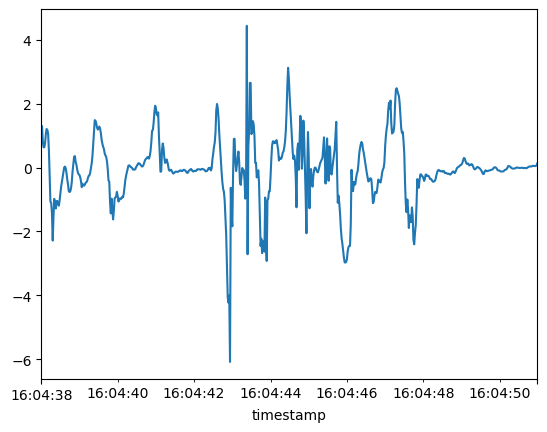

In [97]:
a1 = a[a.asset_id == 'e927c440-3128-4087-8bc5-4ca80662ef63']
a1['indicator_1a'].plot()

In [98]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(6, activation='relu', return_sequences=True, input_shape=input_shape))
    model.add(LSTM(3, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Assume that your data is already split into training and validation sets
model = build_lstm_model((num_timesteps, num_features))
history = model.fit(
    X_train, y_train, 
    epochs=100, 
    batch_size=1, 
    validation_data=(X_val, y_val), 
    shuffle=False
)

Epoch 1/10


2023-06-12 17:51:48.362376: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Concatenate

# Static input
num_static_features = 4
static_input = Input(shape=(num_static_features,))

# Combined input
combined_input = Concatenate()([model.output, static_input])

# Output layer
output = Dense(1)(combined_input)

# Final model
final_model = Model(inputs=[model.input, static_input], outputs=[output])

# Compile the model
final_model.compile(optimizer='adam', loss='mse')


### Generate Submission File

#### For this template we assume that our predictions or each asset in the test data is 0

In [8]:
submission_file=pd.DataFrame()
assets=pd.Series(test_df.asset_id.unique()).rename('asset_id')
predictions=pd.Series(np.zeros(len(assets))).rename('pediction')
submission_file=pd.concat([assets,predictions],axis=1)
submission_file

asset_id  pediction
0   625efa066c0c4b0db60fdde37ee69dd1        0.0
1   8fba0fc071f64b2dac04ce94af1ac507        0.0
2   403ba72ed9814fa39c263b9f8cc2f279        0.0
3   cc1e29749214485994e9b2648e104ac9        0.0
4   d5a55a3493f144b8a6439e472c181168        0.0
5   3c44a918aa9c47d58bafc7782c42ce55        0.0
6   e02635828ef94bfe9fab2b2a30a554ab        0.0
7   c20b841896944149b80dcb61f8f4570c        0.0
8   bb948833a1a646b9a4eddff5d0874d31        0.0
9   5ac890118e7e4c86a2b84ceaeedef699        0.0
10  6d90810b7a2b4e4dacb6d55ddd30308f        0.0
11  b4e6a453789d4eba879f9a75e00c97bf        0.0
12  4185906e4c0c4a1583ed5580ab9d1fc7        0.0
13  e93cc1b091f84851bfbe2486c7d0a47f        0.0
14  689137aaeb324c0d91608d3a092210d8        0.0
15  1927c71a2e3c4c6ebc45e89fde7a61be        0.0
16  49a9889da58a4c3d865b20e4a286e8a8        0.0
17  30ea196bf60f46a392889b601b2d077d        0.0
18  cccc93b8f07b41538abd54127be94571        0.0
19  3a8f6841fb714acca73a8970de0f7b67        0.0
20  49d384bac2a949ae902f6c1677b0f4ec        0.0
21  5b5d16911009405b8a907e2e53eaa0d9        0.0
22  da0c19c1a2cb42eaaea9b52a5c3ee6ac        0.0
23  e7a23c54981d40a5aa121bf7425e0cbe        0.0
24  c5fcc8c3bf1243afbcfda8a21c797ea1        0.0

In [ ]:
# submission_file.to_csv('solutions_Sai.csv')